In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder # ML to allow LabelEncoder model
from sklearn.cluster import KMeans # ML to allow KMeans Clustering
from sklearn.preprocessing import StandardScaler # ML to allow Scaling values

In [2]:
import pandas as pd

df = pd.read_csv("../Dataset/raw/healthcare_dataset.csv")
df.head()


Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306          328         Urgent     2024-02-02  Paracetamol   
1    33643.327287          265      Emergency     2019-08-26    Ibuprofen   
2    27955.096079          205      Emergency     2022-10-07      Aspirin   
3    37909.782410          450       Elective     2020-12-18    Ibuprofen   
4    14238.317814          458         Urgent     2022-10-09   Penicillin   

   Test Results  
0        Normal  
1  Inconclusive  
2        Normal  
3      Abnormal  
4      Abnormal

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [4]:
df[df.isnull().any(axis=1)]

Empty DataFrame
Columns: [Name, Age, Gender, Blood Type, Medical Condition, Date of Admission, Doctor, Hospital, Insurance Provider, Billing Amount, Room Number, Admission Type, Discharge Date, Medication, Test Results]
Index: []

In [5]:
df[df.duplicated()]

Name  Age  Gender Blood Type Medical Condition  \
50023        Samuel joYCe   56    Male         O+         Arthritis   
50040    KIMBErly vasqueZ   26    Male         A-           Obesity   
50055      SCoTT tHOrNton   55  Female         B-           Obesity   
50070         wiLliam LEe   27  Female         O+         Arthritis   
50078  chRistOPheR NoRrIs   38    Male        AB-         Arthritis   
...                   ...  ...     ...        ...               ...   
55461      connOR coMPTon   63    Male         A+            Asthma   
55462       alYSsA mIlLER   35  Female         A-          Diabetes   
55464        ChRIs huGHeS   35  Female        AB-           Obesity   
55484     keNNEtH alvarez   80    Male         O+            Cancer   
55491       lInDA grIFfin   47  Female         O+           Obesity   

      Date of Admission             Doctor                    Hospital  \
50023        2022-11-03     Krista Hartman              Thomas-Ballard   
50040        2023-10-23   Jennifer Bennett                   Cowan Inc   
50055        2021-04-08      Joshua Ingram                  Keller LLC   
50070        2020-01-31  Lauren Montgomery               Winters-Simon   
50078        2023-01-14       Denise Blair                 Inc Morales   
...                 ...                ...                         ...   
55461        2021-08-21     Jonathan Allen  and Willis Mullins, Bowers   
55462        2022-06-30         Ryan Price           Shelton-Gallagher   
55464        2024-02-28      Katelyn Perry                Lyons-Hansen   
55484        2022-05-05      Andrew Conner               Sons Mayo and   
55491        2020-06-21     Danielle Davis    and King Jordan Johnson,   

      Insurance Provider  Billing Amount  Room Number Admission Type  \
50023   UnitedHealthcare    15654.830587          157         Urgent   
50040   UnitedHealthcare    38142.109678          313         Urgent   
50055           Medicare    30894.904511          455         Urgent   
50070              Cigna    46229.434901          153       Elective   
50078           Medicare     9072.127142          452      Emergency   
...                  ...             ...          ...            ...   
55461           Medicare     1936.702824          375      Emergency   
55462   UnitedHealthcare     2210.460898          289       Elective   
55464         Blue Cross    11889.154513          128      Emergency   
55484              Cigna    45653.802310          114       Elective   
55491              Aetna    15715.551079          310      Emergency   

      Discharge Date   Medication  Test Results  
50023     2022-11-22      Aspirin  Inconclusive  
50040     2023-11-18   Penicillin      Abnormal  
50055     2021-04-15      Aspirin      Abnormal  
50070     2020-02-13      Lipitor        Normal  
50078     2023-02-12   Penicillin        Normal  
...              ...          ...           ...  
55461     2021-09-16  Paracetamol        Normal  
55462     2022-07-27   Penicillin        Normal  
55464     2024-03-14  Paracetamol      Abnormal  
55484     2022-05-17      Aspirin        Normal  
55491     2020-06-25      Lipitor      Abnormal  

[534 rows x 15 columns]

In [6]:
#df[df['Name'] == "keNNEtH alvarez"]
# Sampling duplicate entries to see if there are any differences


In [7]:
df = df.drop_duplicates()

In [8]:
df[df.duplicated()]

Empty DataFrame
Columns: [Name, Age, Gender, Blood Type, Medical Condition, Date of Admission, Doctor, Hospital, Insurance Provider, Billing Amount, Room Number, Admission Type, Discharge Date, Medication, Test Results]
Index: []

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                54966 non-null  object 
 1   Age                 54966 non-null  int64  
 2   Gender              54966 non-null  object 
 3   Blood Type          54966 non-null  object 
 4   Medical Condition   54966 non-null  object 
 5   Date of Admission   54966 non-null  object 
 6   Doctor              54966 non-null  object 
 7   Hospital            54966 non-null  object 
 8   Insurance Provider  54966 non-null  object 
 9   Billing Amount      54966 non-null  float64
 10  Room Number         54966 non-null  int64  
 11  Admission Type      54966 non-null  object 
 12  Discharge Date      54966 non-null  object 
 13  Medication          54966 non-null  object 
 14  Test Results        54966 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.7+ MB


In [10]:
df['Name'] = df['Name'].str.title()

In [11]:
df['Billing Amount'] = df['Billing Amount'].round(2)

In [12]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [13]:
df['patient_id'] = np.arange(1, len(df) + 1)

In [14]:
df['doctor_id'] = df.groupby('Doctor').ngroup()+1

In [15]:
df.head()

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby Jackson   30    Male         B-            Cancer        2024-01-31   
1   Leslie Terry   62    Male         A+           Obesity        2019-08-20   
2    Danny Smith   76  Female         A-           Obesity        2022-09-22   
3   Andrew Watts   28  Female         O+          Diabetes        2020-11-18   
4  Adrienne Bell   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0        18856.28          328         Urgent     2024-02-02  Paracetamol   
1        33643.33          265      Emergency     2019-08-26    Ibuprofen   
2        27955.10          205      Emergency     2022-10-07      Aspirin   
3        37909.78          450       Elective     2020-12-18    Ibuprofen   
4        14238.32          458         Urgent     2022-10-09   Penicillin   

   Test Results  patient_id  doctor_id  
0        Normal           1      26613  
1  Inconclusive           2      33649  
2        Normal           3      37829  
3      Abnormal           4      22512  
4      Abnormal           5      21260

In [16]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])

In [17]:
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [18]:
df['treatment_days'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
df['treatment_days'] = np.maximum(1, df['treatment_days'])

In [19]:
df['Billing Amount'].describe() # look back at this for later to see what to do with bills less than 0

count    54966.000000
mean     25544.306260
std      14208.409715
min      -2008.490000
25%      13243.722500
50%      25542.750000
75%      37819.857500
max      52764.280000
Name: Billing Amount, dtype: float64

In [20]:
df[df['Billing Amount'] < 0]

Name  Age  Gender Blood Type Medical Condition  \
132             Ashley Erickson   32  Female        AB-            Cancer   
799           Christopher Weiss   49  Female        AB-            Asthma   
1018              Ashley Warner   60    Male         A+      Hypertension   
1421               Jay Galloway   74  Female         O+            Asthma   
2103          Joshua Williamson   72  Female         B-          Diabetes   
...                         ...  ...     ...        ...               ...   
52213  Mr. Christopher Alvarado   74    Male        AB+           Obesity   
52629          Gabrielle Decker   66    Male        AB-         Arthritis   
53204             Ashley Warner   55    Male         A+      Hypertension   
53232              Daniel Drake   68  Female         B+      Hypertension   
54136         Dr. Michael Mckay   64    Male         O+            Cancer   

      Date of Admission               Doctor                   Hospital  \
132          2019-11-05        Gerald Hooper  and Johnson Moore, Branch   
799          2023-02-16       Kelly Thompson              Hunter-Hughes   
1018         2021-12-21       Andrea Bentley      and Wagner, Lee Klein   
1421         2021-01-20        Debra Everett               Group Peters   
2103         2021-03-21          Wendy Ramos    and Huff Reeves, Dennis   
...                 ...                  ...                        ...   
52213        2022-06-03  Mr. Dean Guzman DDS                Johnson Inc   
52629        2022-11-07       William Krause                Diaz-Bishop   
53204        2021-12-21       Andrea Bentley      and Wagner, Lee Klein   
53232        2020-04-24            Brett Ray                   Carr Ltd   
54136        2019-05-31         Dawn Navarro  Mcconnell and Rios, Clark   

      Insurance Provider  Billing Amount  Room Number Admission Type  \
132                Aetna         -502.51          376         Urgent   
799                Aetna        -1018.25          204       Elective   
1018               Aetna         -306.36          426       Elective   
1421          Blue Cross         -109.10          381      Emergency   
2103          Blue Cross         -576.73          369         Urgent   
...                  ...             ...          ...            ...   
52213         Blue Cross        -1310.27          257       Elective   
52629              Cigna         -676.85          354         Urgent   
53204              Aetna         -306.36          426       Elective   
53232              Aetna         -591.92          426       Elective   
54136   UnitedHealthcare         -199.66          122         Urgent   

      Discharge Date   Medication  Test Results  patient_id  doctor_id  \
132       2019-11-23   Penicillin        Normal         133      14057   
799       2023-03-09   Penicillin  Inconclusive         800      21995   
1018      2022-01-11    Ibuprofen        Normal        1019       1927   
1421      2021-02-09    Ibuprofen      Abnormal        1422      10545   
2103      2021-04-17      Aspirin      Abnormal        2104      39678   
...              ...          ...           ...         ...        ...   
52213     2022-06-13  Paracetamol  Inconclusive       51995      28838   
52629     2022-11-30   Penicillin        Normal       52377      39939   
53204     2022-01-11    Ibuprofen        Normal       52897       1927   
53232     2020-04-26      Lipitor      Abnormal       52924       4954   
54136     2019-06-12    Ibuprofen      Abnormal       53748      10292   

       treatment_days  
132                18  
799                21  
1018               21  
1421               20  
2103               27  
...               ...  
52213              10  
52629              23  
53204              21  
53232               2  
54136              12  

[106 rows x 18 columns]

In [21]:
df_neg_bill = df.copy() # copy the dataframe

In [22]:
df = df[df['Billing Amount'] >= 0]

In [23]:
df[df['Billing Amount'] < 0] # negative billings dropped.

Empty DataFrame
Columns: [Name, Age, Gender, Blood Type, Medical Condition, Date of Admission, Doctor, Hospital, Insurance Provider, Billing Amount, Room Number, Admission Type, Discharge Date, Medication, Test Results, patient_id, doctor_id, treatment_days]
Index: []

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54860 entries, 0 to 55499
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                54860 non-null  object        
 1   Age                 54860 non-null  int64         
 2   Gender              54860 non-null  object        
 3   Blood Type          54860 non-null  object        
 4   Medical Condition   54860 non-null  object        
 5   Date of Admission   54860 non-null  datetime64[ns]
 6   Doctor              54860 non-null  object        
 7   Hospital            54860 non-null  object        
 8   Insurance Provider  54860 non-null  object        
 9   Billing Amount      54860 non-null  float64       
 10  Room Number         54860 non-null  int64         
 11  Admission Type      54860 non-null  object        
 12  Discharge Date      54860 non-null  datetime64[ns]
 13  Medication          54860 non-null  object        


In [25]:
df.head()

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby Jackson   30    Male         B-            Cancer        2024-01-31   
1   Leslie Terry   62    Male         A+           Obesity        2019-08-20   
2    Danny Smith   76  Female         A-           Obesity        2022-09-22   
3   Andrew Watts   28  Female         O+          Diabetes        2020-11-18   
4  Adrienne Bell   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0        18856.28          328         Urgent     2024-02-02  Paracetamol   
1        33643.33          265      Emergency     2019-08-26    Ibuprofen   
2        27955.10          205      Emergency     2022-10-07      Aspirin   
3        37909.78          450       Elective     2020-12-18    Ibuprofen   
4        14238.32          458         Urgent     2022-10-09   Penicillin   

   Test Results  patient_id  doctor_id  treatment_days  
0        Normal           1      26613               2  
1  Inconclusive           2      33649               6  
2        Normal           3      37829              15  
3      Abnormal           4      22512              30  
4      Abnormal           5      21260              20

In [26]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'patient_id', 'doctor_id',
       'treatment_days'],
      dtype='object')

In [27]:
df = df.rename(columns={
    'Name': 'patient_name',
    'Age': 'age',
    'Gender': 'gender',
    'Blood Type': 'blood_type',
    'Medical Condition': 'medical_condition',
    'Date of Admission': 'admission_date',
    'Doctor': 'doctor_name',
    'Hospital': 'hospital_name',
    'Insurance Provider': 'insurance_provider',
    'Billing Amount': 'billing_amount',
    'Room Number': 'room_number',
    'Admission Type': 'admission_type',
    'Discharge Date': 'discharge_date',
    'Medication': 'medication',
    'Test Results': 'test_results'
})

In [28]:
df = df[[
    'patient_id', 'doctor_id',
    'patient_name', 'age', 'gender', 'blood_type', 'medical_condition',
    'admission_date', 'discharge_date', 'treatment_days', 'admission_type', 'room_number',
    'doctor_name', 'hospital_name', 'insurance_provider', 'medication', 'test_results',
    'billing_amount'
]]
   

In [29]:
df.head()

patient_id  doctor_id   patient_name  age  gender blood_type  \
0           1      26613  Bobby Jackson   30    Male         B-   
1           2      33649   Leslie Terry   62    Male         A+   
2           3      37829    Danny Smith   76  Female         A-   
3           4      22512   Andrew Watts   28  Female         O+   
4           5      21260  Adrienne Bell   43  Female        AB+   

  medical_condition admission_date discharge_date  treatment_days  \
0            Cancer     2024-01-31     2024-02-02               2   
1           Obesity     2019-08-20     2019-08-26               6   
2           Obesity     2022-09-22     2022-10-07              15   
3          Diabetes     2020-11-18     2020-12-18              30   
4            Cancer     2022-09-19     2022-10-09              20   

  admission_type  room_number       doctor_name               hospital_name  \
0         Urgent          328     Matthew Smith             Sons and Miller   
1      Emergency          265   Samantha Davies                     Kim Inc   
2      Emergency          205  Tiffany Mitchell                    Cook PLC   
3       Elective          450       Kevin Wells  Hernandez Rogers and Vang,   
4         Urgent          458    Kathleen Hanna                 White-White   

  insurance_provider   medication  test_results  billing_amount  
0         Blue Cross  Paracetamol        Normal        18856.28  
1           Medicare    Ibuprofen  Inconclusive        33643.33  
2              Aetna      Aspirin        Normal        27955.10  
3           Medicare    Ibuprofen      Abnormal        37909.78  
4              Aetna   Penicillin      Abnormal        14238.32

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54860 entries, 0 to 55499
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   patient_id          54860 non-null  int64         
 1   doctor_id           54860 non-null  int64         
 2   patient_name        54860 non-null  object        
 3   age                 54860 non-null  int64         
 4   gender              54860 non-null  object        
 5   blood_type          54860 non-null  object        
 6   medical_condition   54860 non-null  object        
 7   admission_date      54860 non-null  datetime64[ns]
 8   discharge_date      54860 non-null  datetime64[ns]
 9   treatment_days      54860 non-null  int64         
 10  admission_type      54860 non-null  object        
 11  room_number         54860 non-null  int64         
 12  doctor_name         54860 non-null  object        
 13  hospital_name       54860 non-null  object        


In [31]:
df = df.astype({
    "patient_id": "int",
    "doctor_id": "int",
    "patient_name": "string",
    "age": "int",
    "gender": "category",
    "blood_type": "category",
    "medical_condition": "string",
    "admission_date": "datetime64[ns]",
    "discharge_date": "datetime64[ns]",
    "treatment_days": "int",
    "admission_type": "category",
    "room_number": "int",
    "doctor_name": "string",
    "hospital_name": "string",
    "insurance_provider": "string",
    "medication": "string",
    "test_results": "category",
    "billing_amount": "float"
})

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54860 entries, 0 to 55499
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   patient_id          54860 non-null  int64         
 1   doctor_id           54860 non-null  int64         
 2   patient_name        54860 non-null  string        
 3   age                 54860 non-null  int64         
 4   gender              54860 non-null  category      
 5   blood_type          54860 non-null  category      
 6   medical_condition   54860 non-null  string        
 7   admission_date      54860 non-null  datetime64[ns]
 8   discharge_date      54860 non-null  datetime64[ns]
 9   treatment_days      54860 non-null  int64         
 10  admission_type      54860 non-null  category      
 11  room_number         54860 non-null  int64         
 12  doctor_name         54860 non-null  string        
 13  hospital_name       54860 non-null  string        


In [33]:
df.to_csv("healthcare_cleaned.csv", index=False) # to save as new csv file to upload on github and sql

In [34]:
df = pd.read_csv("https://raw.githubusercontent.com/sali-31/healthcare-data-analysis/refs/heads/main/Dataset/cleaned/healthcare_cleaned.csv") # new dataframe to make it easier
     

In [35]:
df.head()

name  age  gender blood_type medical_condition date_of_admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             doctor                    hospital insurance_provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   billing_amount  room_number admission_type discharge_date   medication  \
0    18856.281306          328         Urgent     2024-02-02  Paracetamol   
1    33643.327287          265      Emergency     2019-08-26    Ibuprofen   
2    27955.096079          205      Emergency     2022-10-07      Aspirin   
3    37909.782410          450       Elective     2020-12-18    Ibuprofen   
4    14238.317814          458         Urgent     2022-10-09   Penicillin   

   test_results  length_of_stay_days  
0        Normal                    2  
1  Inconclusive                    6  
2        Normal                   15  
3      Abnormal                   30  
4      Abnormal                   20

In [36]:
plt.figure(figsize=(10, 6))
num_cols = ["age", "treatment_days", "billing_amount"]
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Numeric Columns")

KeyError: "['treatment_days'] not in index"

<Figure size 1000x600 with 0 Axes>

In [37]:
print(df.columns.tolist())


['name', 'age', 'gender', 'blood_type', 'medical_condition', 'date_of_admission', 'doctor', 'hospital', 'insurance_provider', 'billing_amount', 'room_number', 'admission_type', 'discharge_date', 'medication', 'test_results', 'length_of_stay_days']


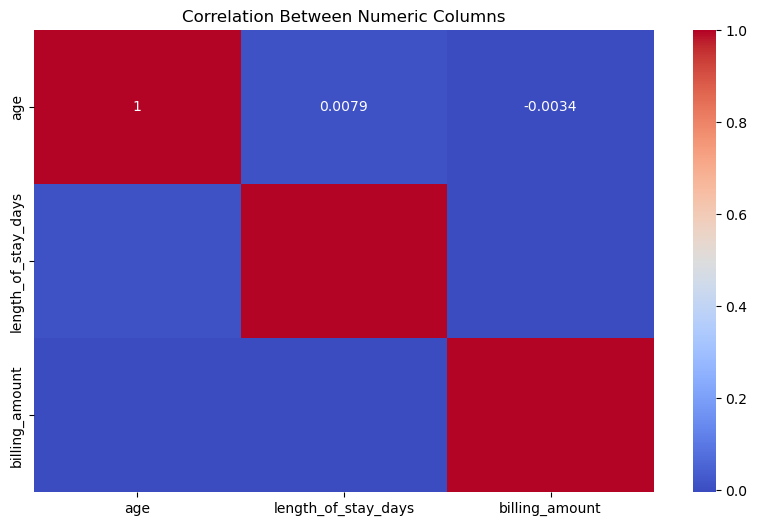

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

num_cols = ["age", "length_of_stay_days", "billing_amount"]

sns.heatmap(df[num_cols].corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Between Numeric Columns")
plt.show()


In [39]:
df["treatment_days"] = df["length_of_stay_days"]


Text(0.5, 1.0, 'Correlation Between Numeric Columns')

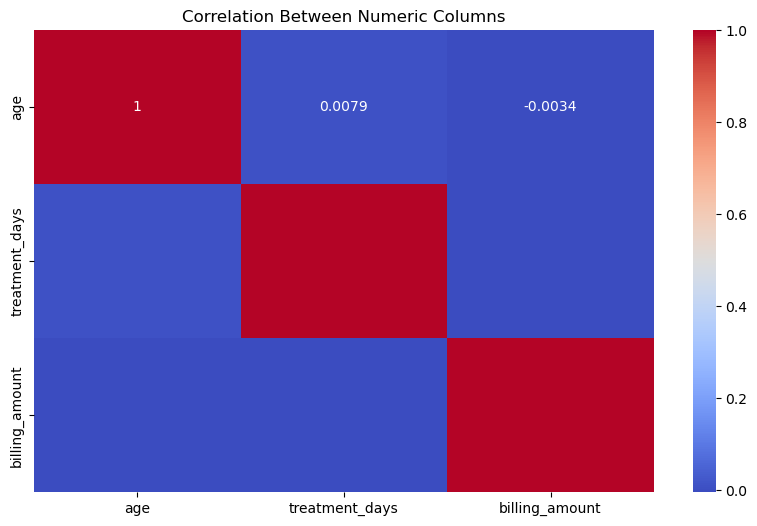

In [40]:
plt.figure(figsize=(10, 6))
num_cols = ["age", "treatment_days", "billing_amount"]
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Numeric Columns")

In [41]:
# Copy only categoricals
df_cat = df[["gender", "blood_type", "admission_type", "test_results"]].copy()

# One-hot encode blood_type
df_cat = pd.get_dummies(df_cat, columns=["blood_type"], drop_first=True)

# Label encode the others
encoder = LabelEncoder()
for col in ["gender", "admission_type", "test_results"]:
    df_cat[col] = encoder.fit_transform(df_cat[col])

Text(0.5, 1.0, 'Categorical Variables Correlation Heatmap')

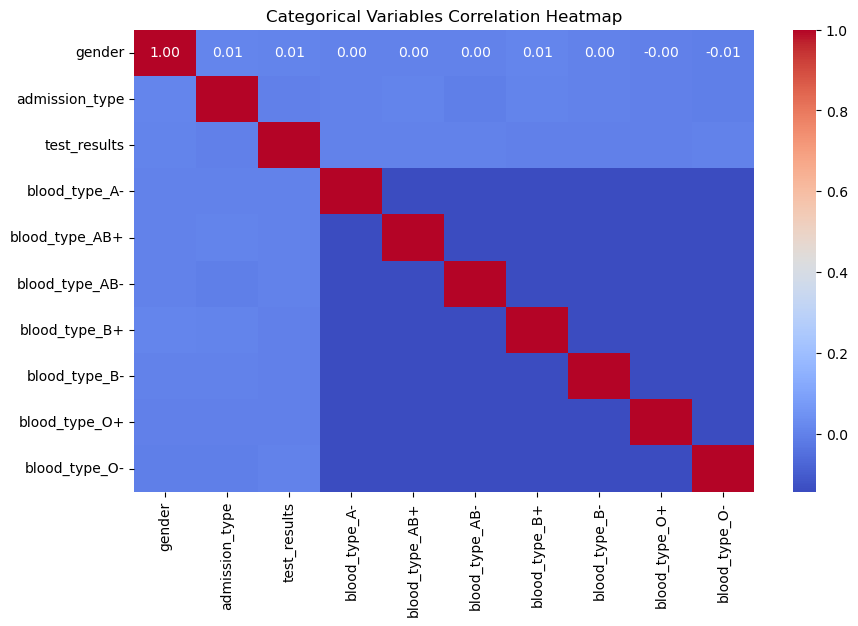

In [42]:
corr_matrix = df_cat.corr()

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Categorical Variables Correlation Heatmap")

In [43]:
num_cols = ["age", "length_of_stay_days", "billing_amount"]


In [44]:
print(df[num_cols].dtypes)
corr = df[num_cols].corr()
print(corr)
print("\nNaNs in correlation table:")
print(corr.isna())

age                      int64
length_of_stay_days      int64
billing_amount         float64
dtype: object
                          age  length_of_stay_days  billing_amount
age                  1.000000             0.007890       -0.003427
length_of_stay_days  0.007890             1.000000       -0.004891
billing_amount      -0.003427            -0.004891        1.000000

NaNs in correlation table:
                       age  length_of_stay_days  billing_amount
age                  False                False           False
length_of_stay_days  False                False           False
billing_amount       False                False           False


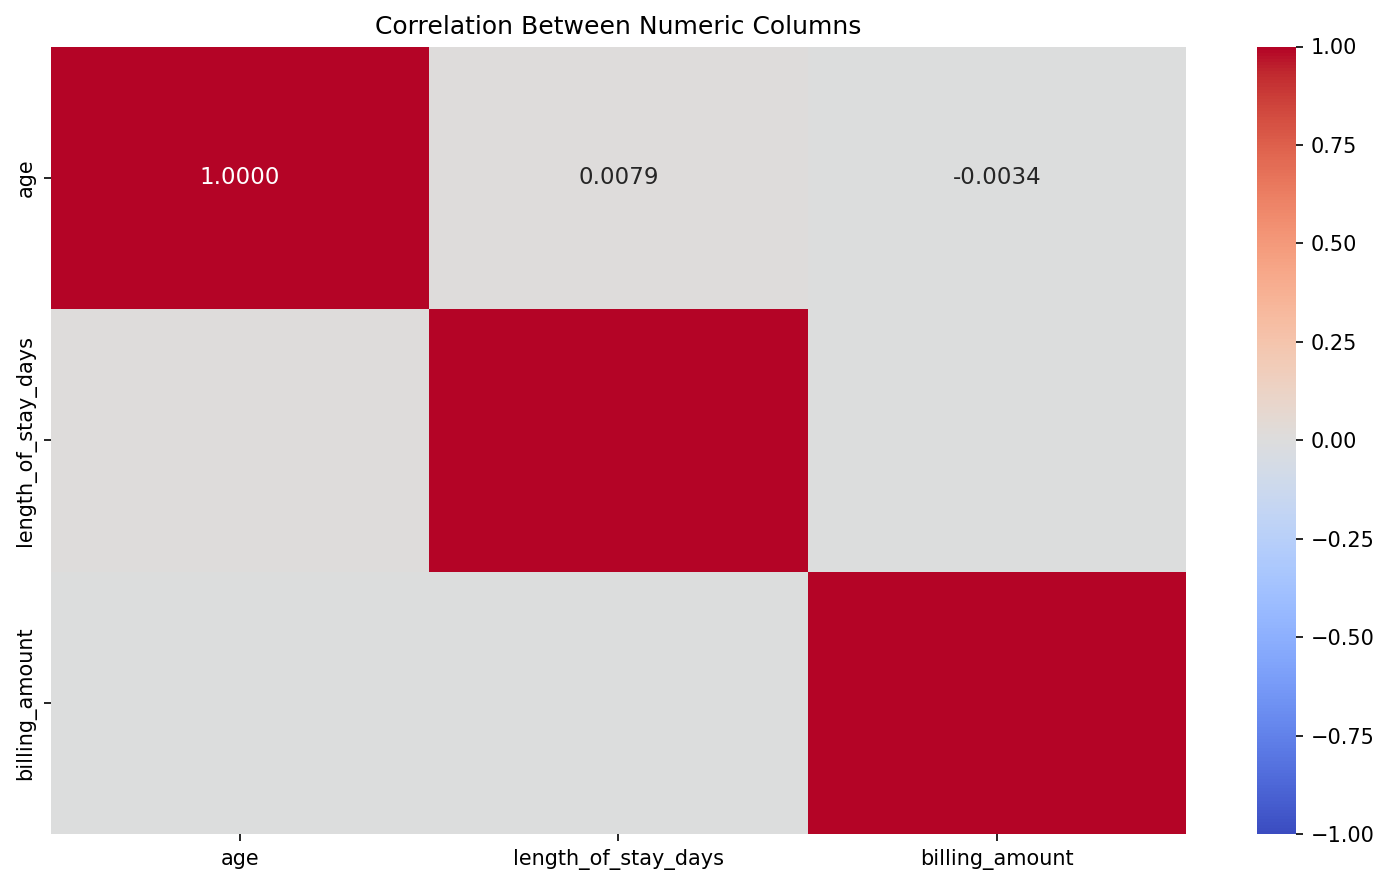

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ["age", "length_of_stay_days", "billing_amount"]

corr = df[num_cols].corr()

plt.figure(figsize=(10, 6), dpi=150)
ax = sns.heatmap(
    corr,
    annot=True,
    fmt=".4f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    annot_kws={"size": 11}
)

plt.title("Correlation Between Numeric Columns")
plt.tight_layout()
plt.show()


In [46]:
print(df[num_cols].dtypes)
print(df[num_cols].isna().sum())
print(df[num_cols].corr())


age                      int64
length_of_stay_days      int64
billing_amount         float64
dtype: object
age                    0
length_of_stay_days    0
billing_amount         0
dtype: int64
                          age  length_of_stay_days  billing_amount
age                  1.000000             0.007890       -0.003427
length_of_stay_days  0.007890             1.000000       -0.004891
billing_amount      -0.003427            -0.004891        1.000000


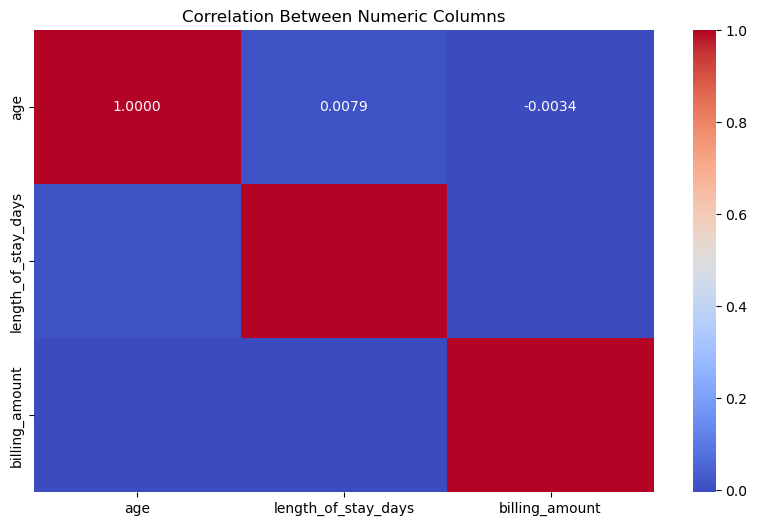

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ["age", "length_of_stay_days", "billing_amount"]
corr = df[num_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".4f", cmap="coolwarm")
plt.title("Correlation Between Numeric Columns")
plt.show()


In [48]:
corr


age  length_of_stay_days  billing_amount
age                  1.000000             0.007890       -0.003427
length_of_stay_days  0.007890             1.000000       -0.004891
billing_amount      -0.003427            -0.004891        1.000000

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


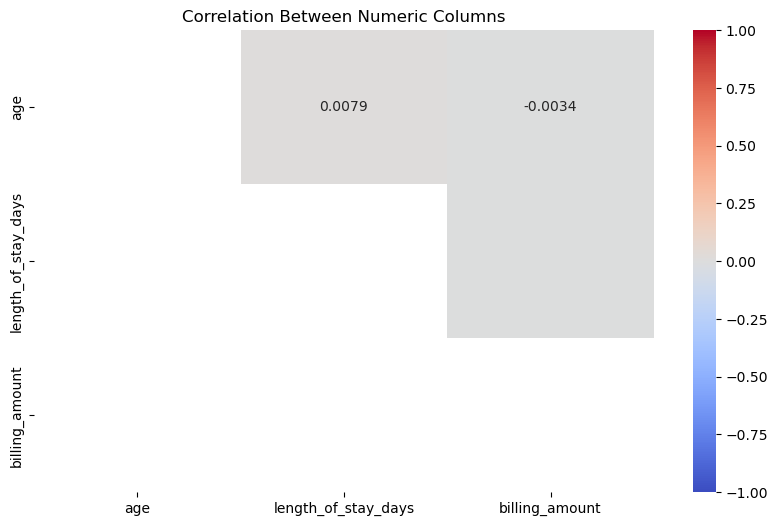

In [49]:
mask = np.tril(np.ones_like(corr, dtype=bool))  # hide lower triangle

plt.figure(figsize=(10, 6))
sns.heatmap(corr, mask=mask, annot=True, fmt=".4f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Between Numeric Columns")
plt.show()


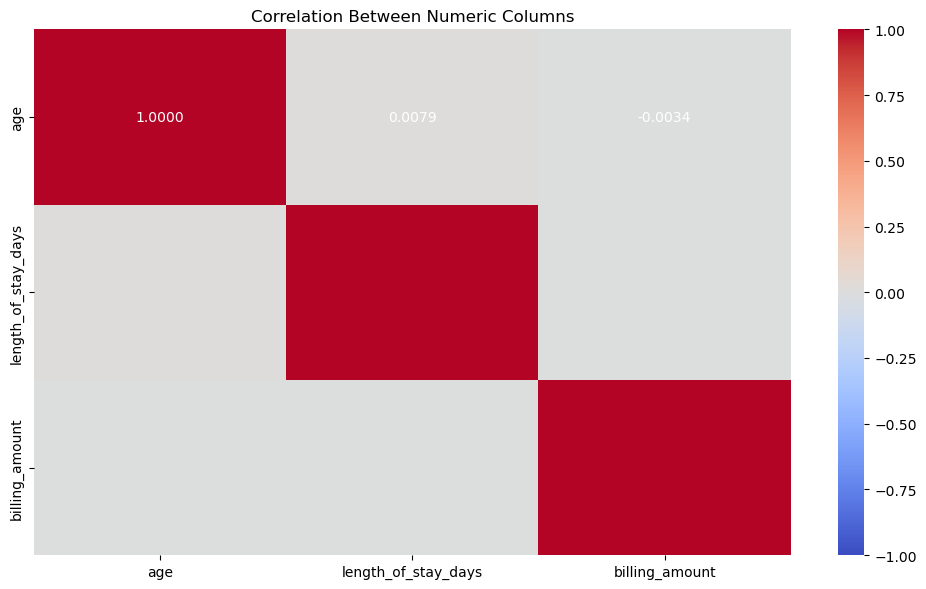

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ["age", "length_of_stay_days", "billing_amount"]

# Make sure they're numeric
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

corr = df[num_cols].corr().round(4)

plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    corr.values,                 # force numeric matrix
    annot=corr.values,           # force ALL annotations
    fmt=".4f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    xticklabels=corr.columns,
    yticklabels=corr.index,
    annot_kws={"color": "white"} # ensures visibility
)

plt.title("Correlation Between Numeric Columns")
plt.tight_layout()
plt.show()


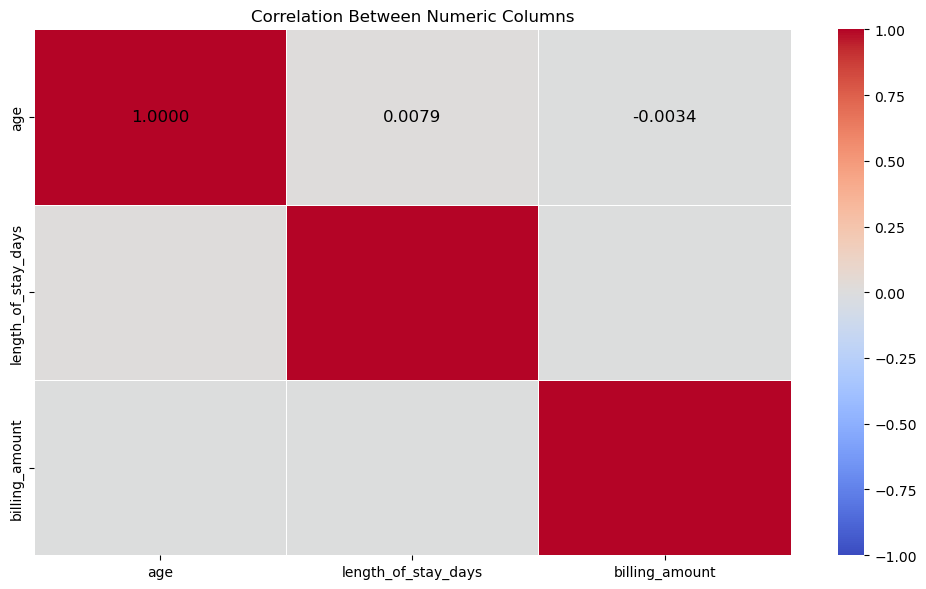

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

corr = df[["age", "length_of_stay_days", "billing_amount"]].corr()

plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    corr,
    annot=True,
    fmt=".4f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    linewidths=0.5,
    annot_kws={"size": 12, "color": "black"}  # force visible text
)

plt.title("Correlation Between Numeric Columns")
plt.tight_layout()
plt.show()


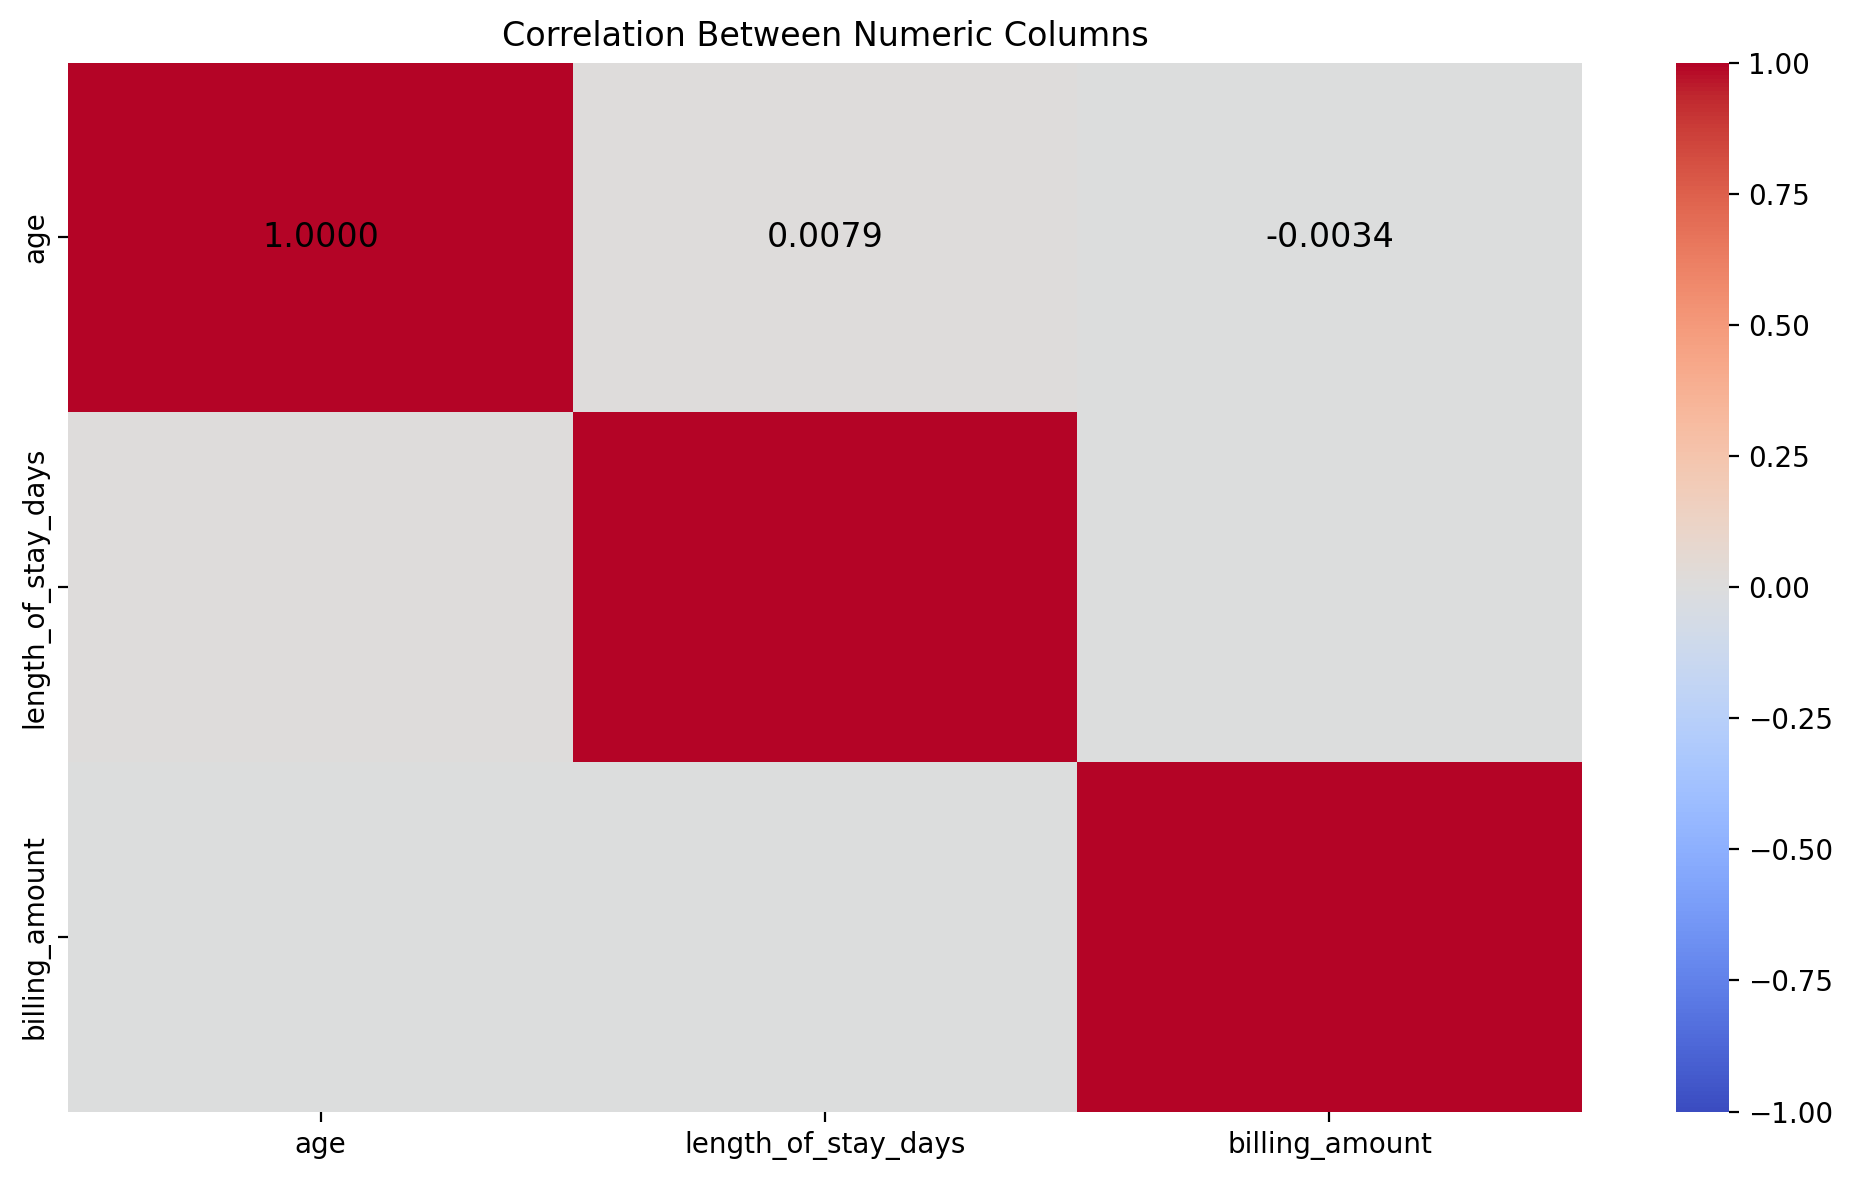

In [52]:
plt.figure(figsize=(10, 6), dpi=200)
ax = sns.heatmap(corr, annot=True, fmt=".4f", cmap="coolwarm", vmin=-1, vmax=1,
                 annot_kws={"size": 12, "color": "black"})
plt.title("Correlation Between Numeric Columns")
plt.tight_layout()
plt.show()


In [53]:
import matplotlib
matplotlib.get_backend()


'module://matplotlib_inline.backend_inline'

In [54]:
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats("retina")


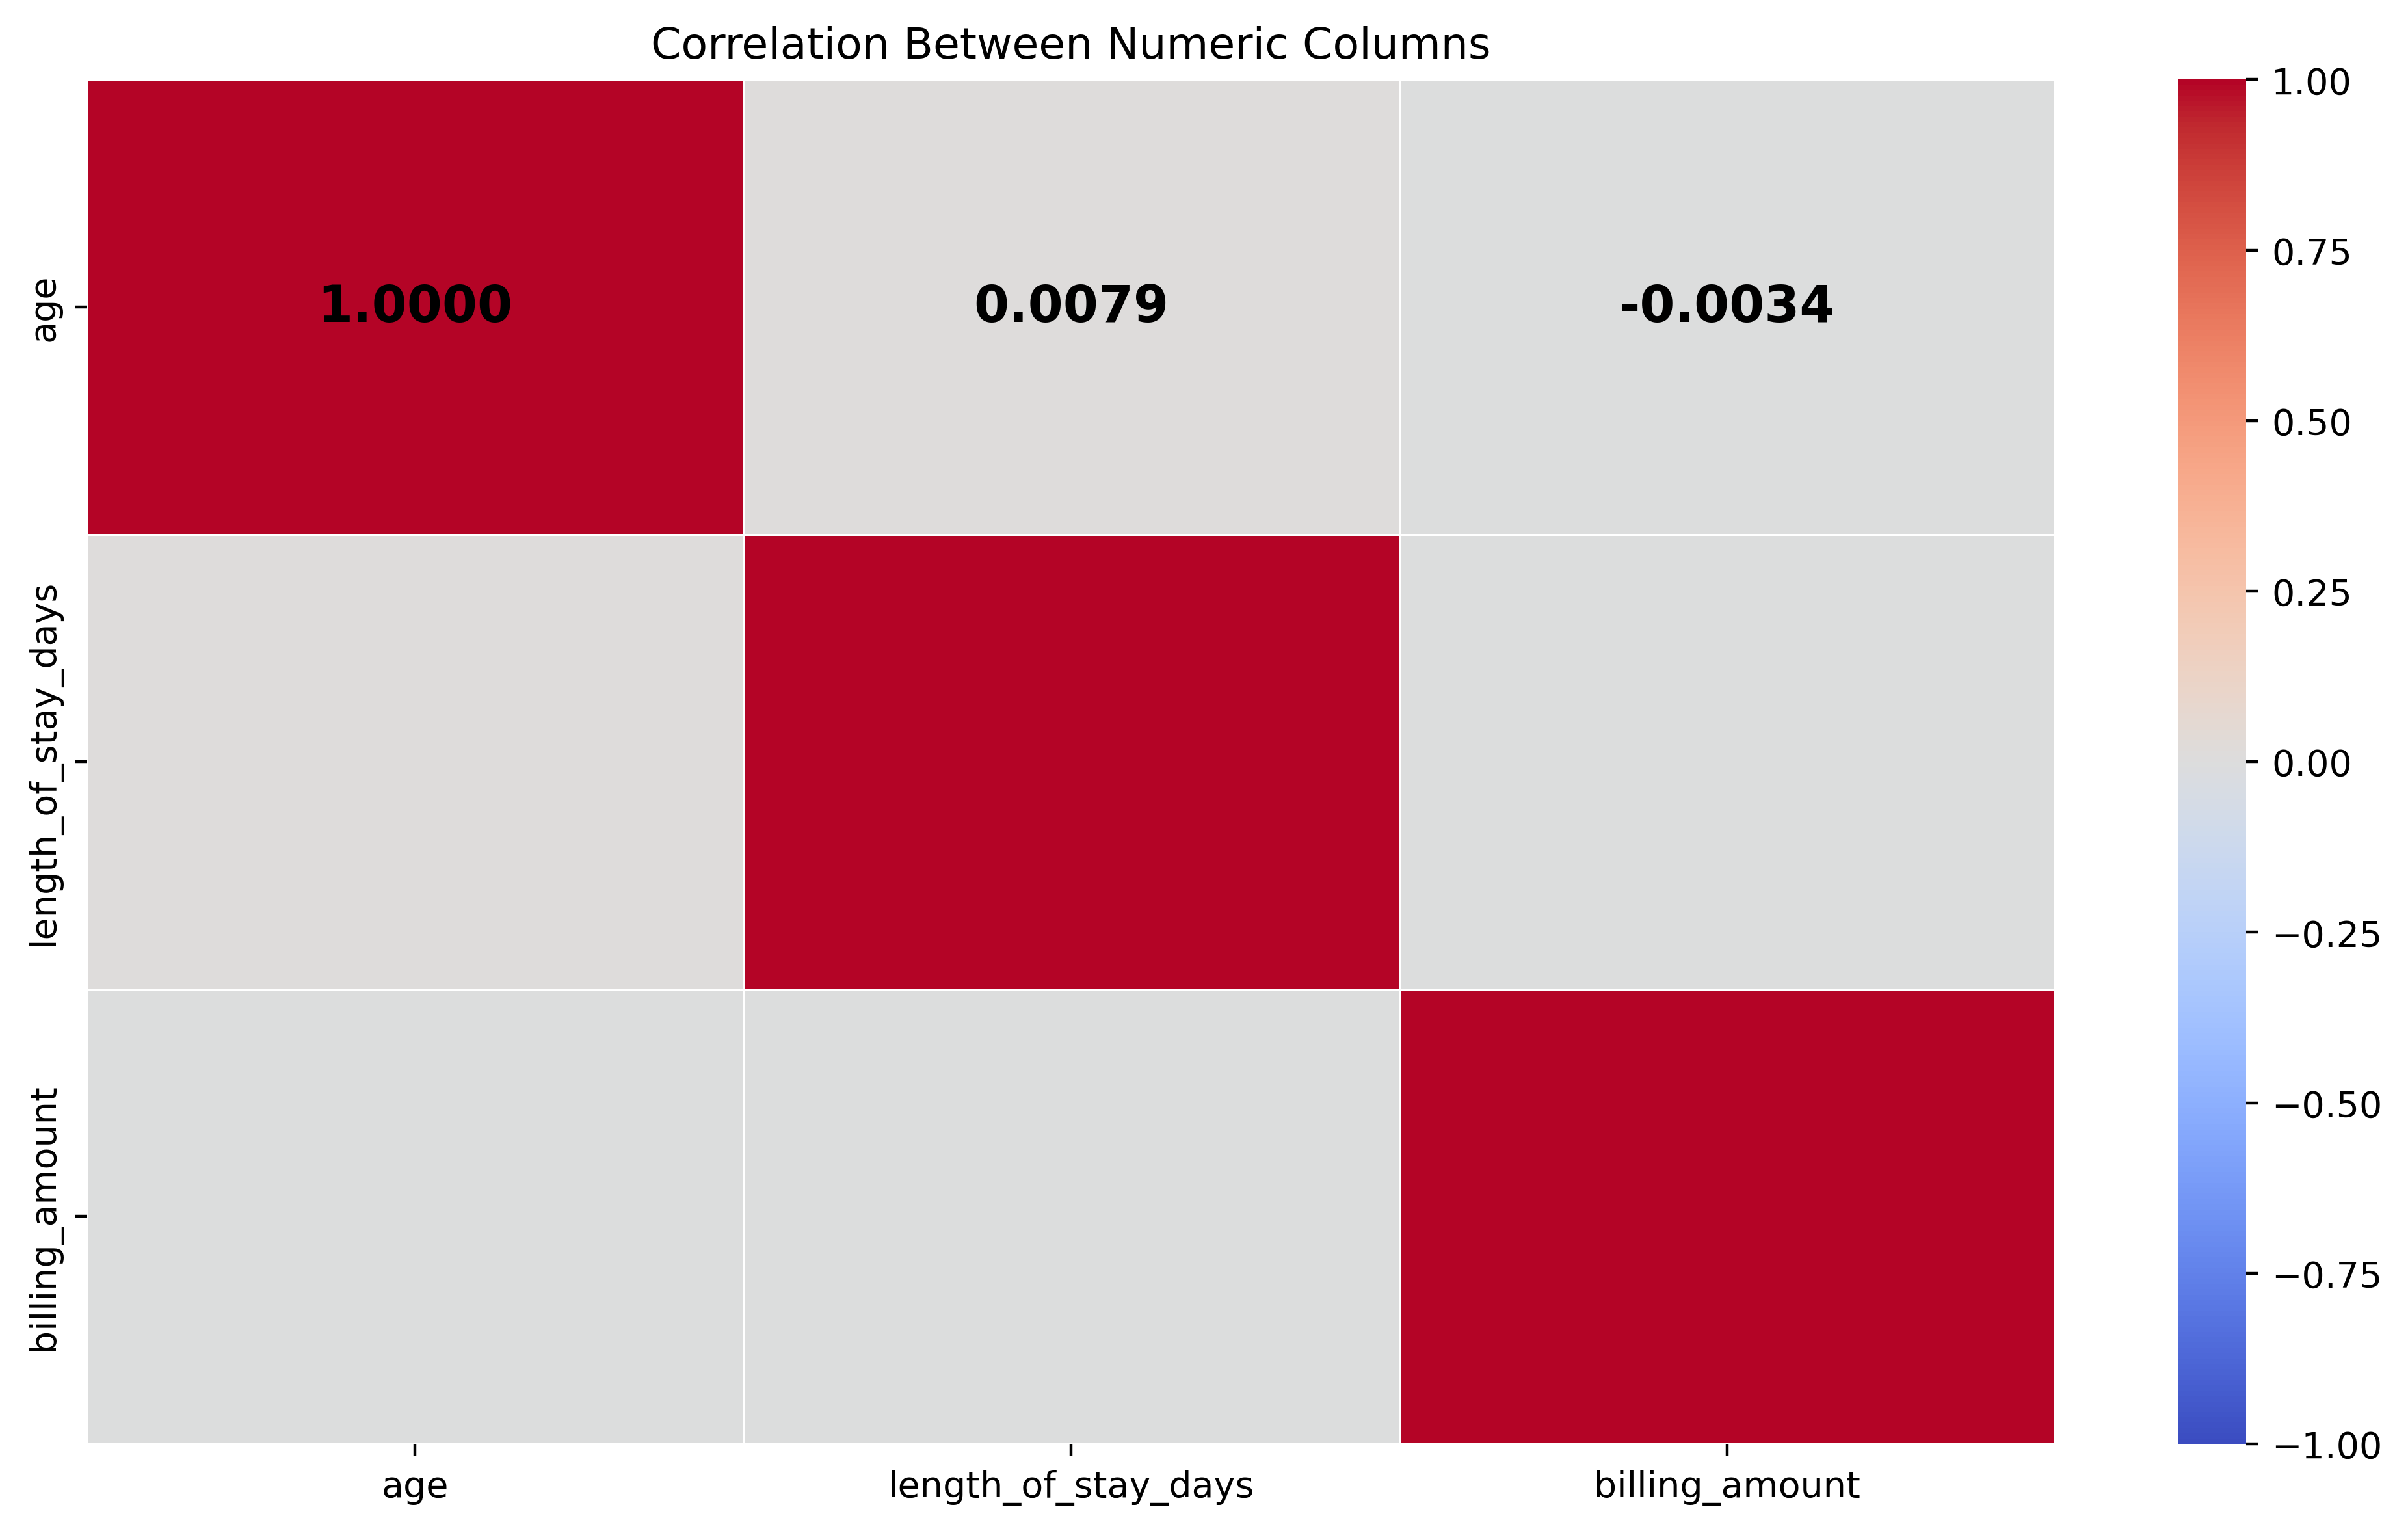

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df[["age", "length_of_stay_days", "billing_amount"]].corr()

plt.figure(figsize=(10, 6), dpi=200)
ax = sns.heatmap(
    corr, cmap="coolwarm",
    annot=True, fmt=".4f",
    annot_kws={"fontsize": 14, "color": "black", "fontweight": "bold"},
    vmin=-1, vmax=1, linewidths=0.5
)
plt.title("Correlation Between Numeric Columns")
plt.tight_layout()
plt.show()


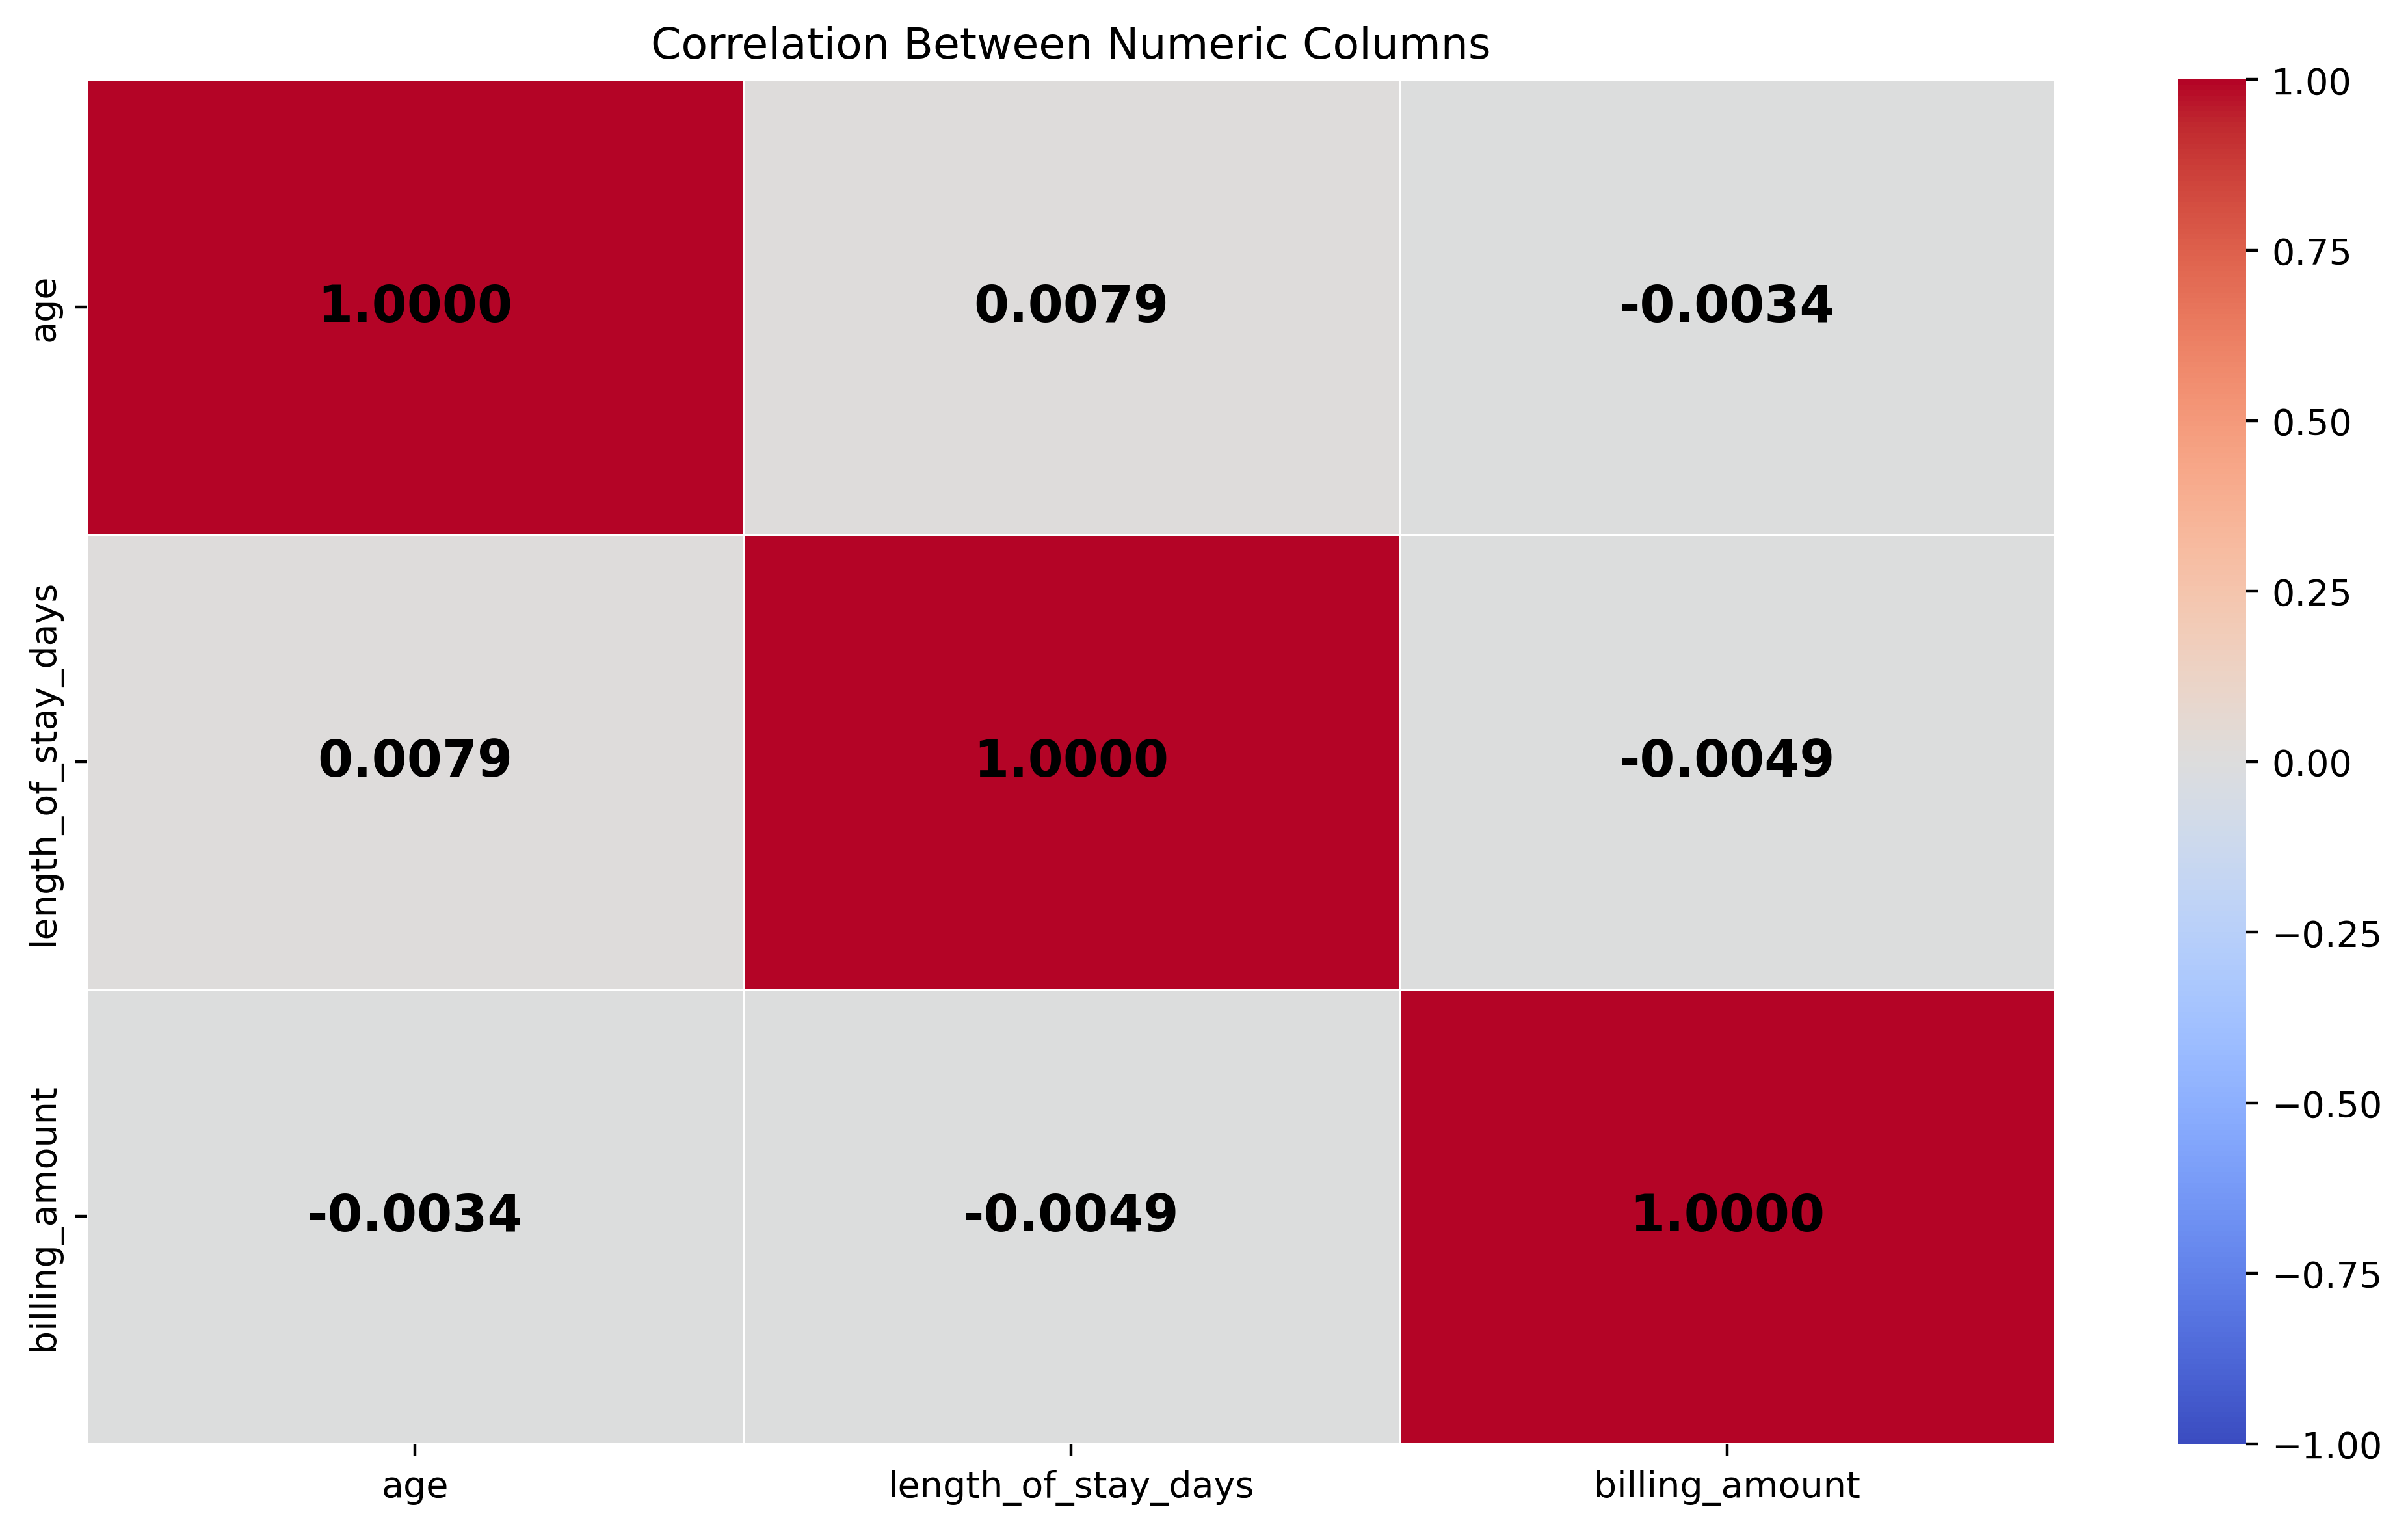

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df[["age", "length_of_stay_days", "billing_amount"]].corr()

plt.figure(figsize=(10, 6), dpi=200)
ax = sns.heatmap(corr, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)

# manual annotations (guaranteed)
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        ax.text(j + 0.5, i + 0.5, f"{corr.iloc[i, j]:.4f}",
                ha="center", va="center",
                color="black", fontsize=14, fontweight="bold")

plt.title("Correlation Between Numeric Columns")
plt.tight_layout()
plt.show()


In [57]:
# Copy only categoricals
df_cat = df[["gender", "blood_type", "admission_type", "test_results"]].copy()

# One-hot encode blood_type
df_cat = pd.get_dummies(df_cat, columns=["blood_type"], drop_first=True)

# Label encode the others
encoder = LabelEncoder()
for col in ["gender", "admission_type", "test_results"]:
    df_cat[col] = encoder.fit_transform(df_cat[col])

Text(0.5, 1.0, 'Categorical Variables Correlation Heatmap')

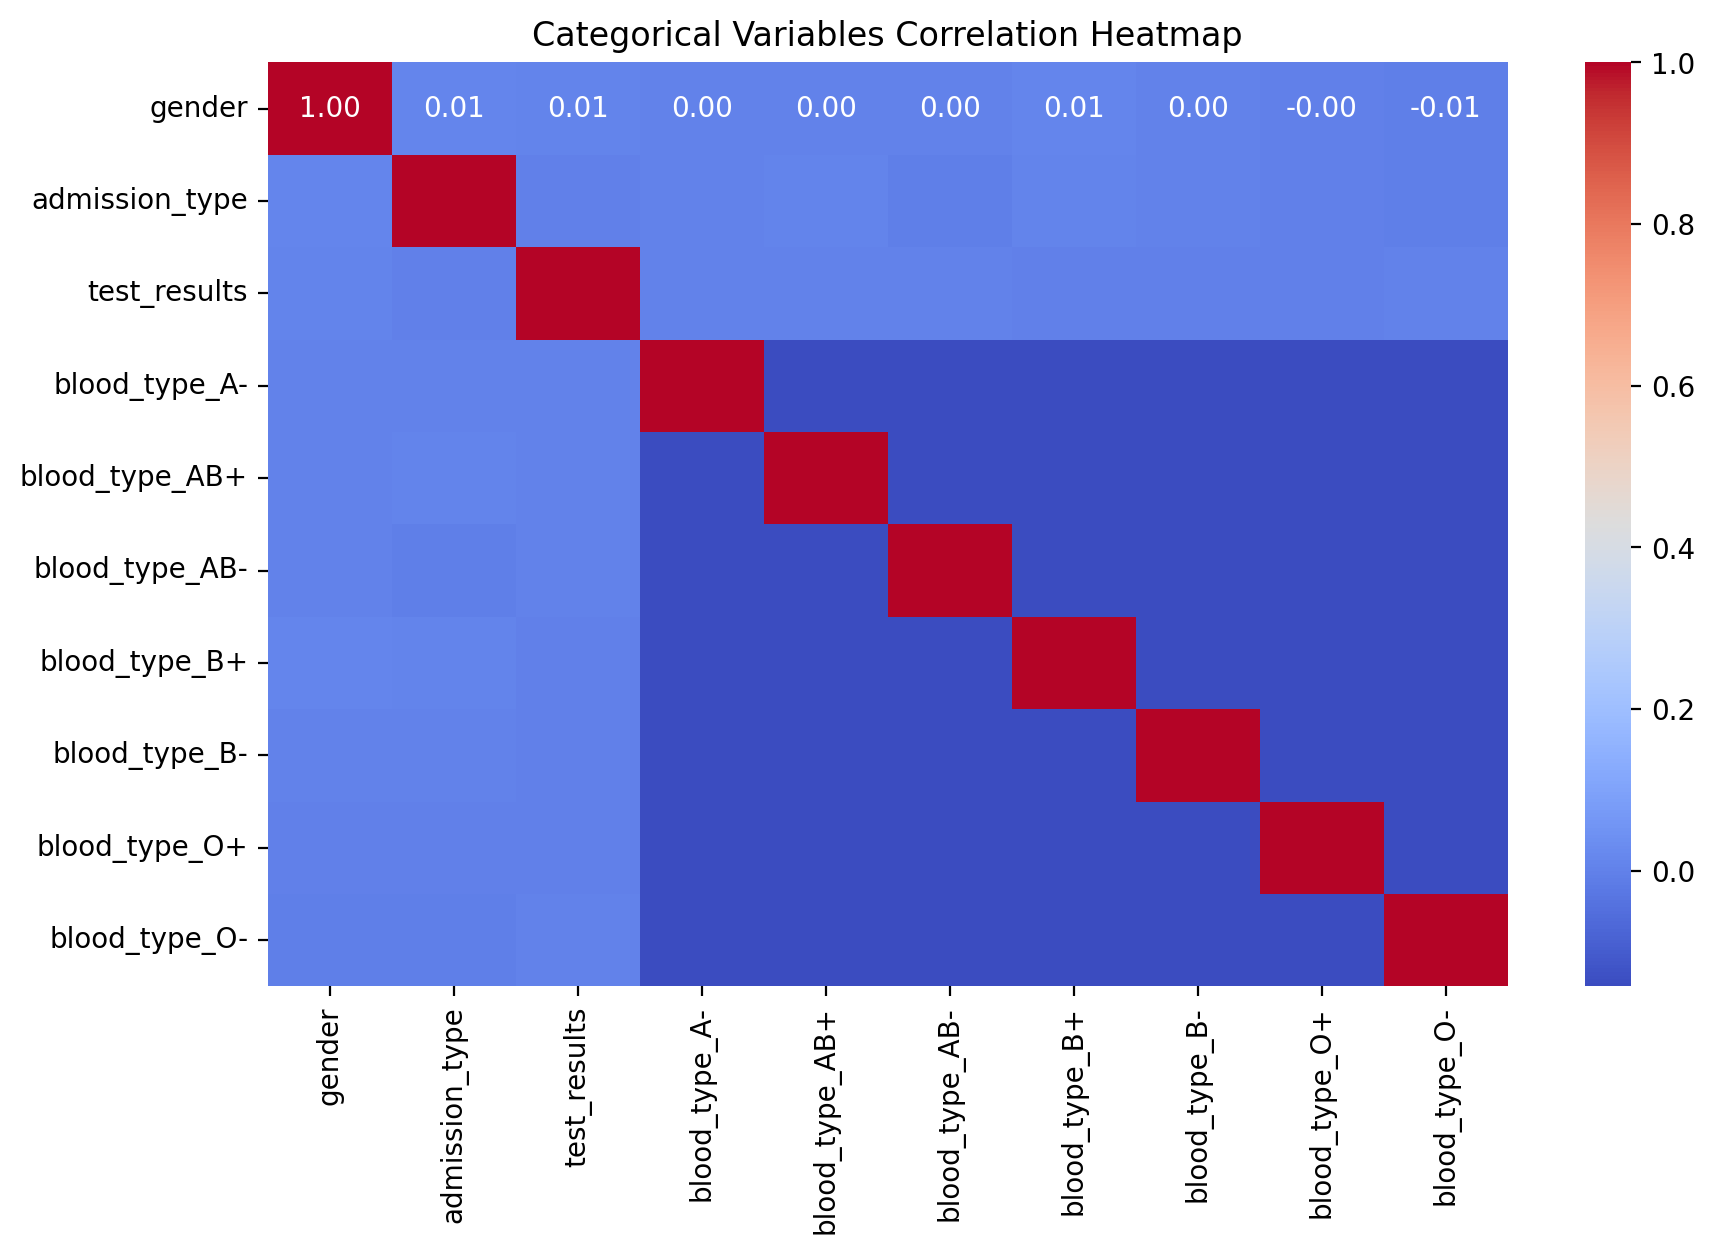

In [58]:
corr_matrix = df_cat.corr()

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Categorical Variables Correlation Heatmap")

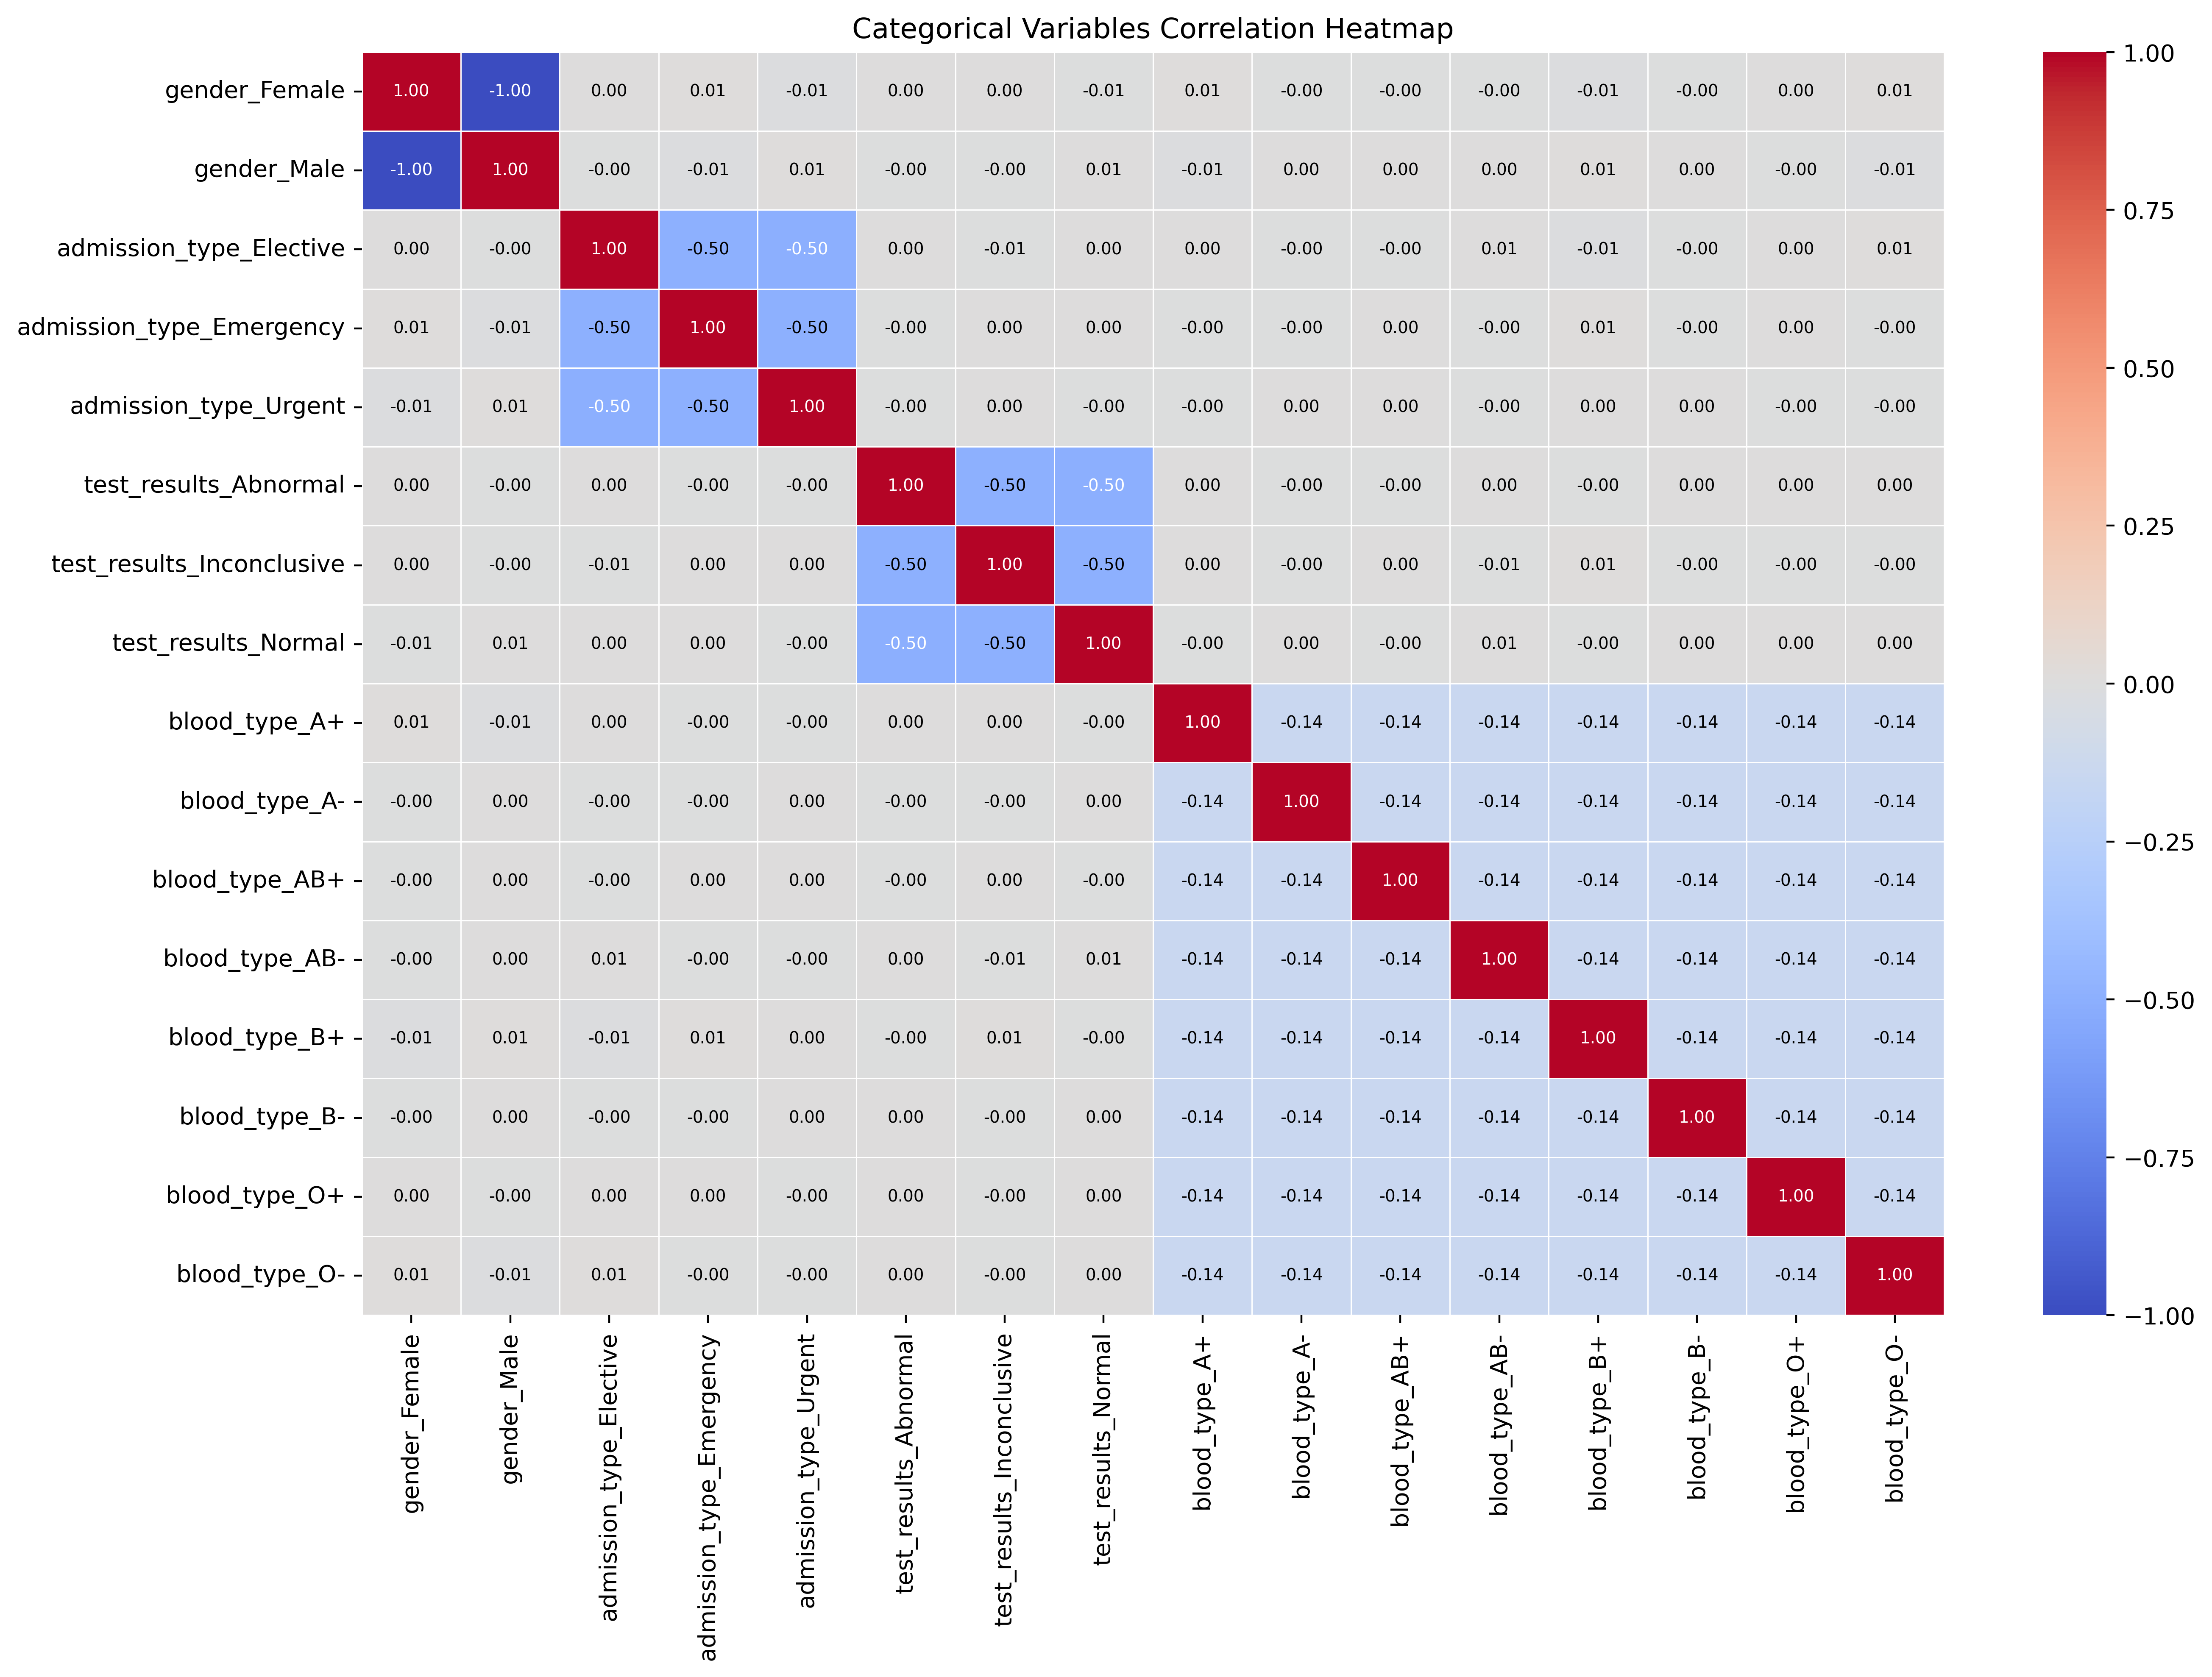

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Pick categorical columns (adjust to whatever you're using)
cat_cols = ["gender", "admission_type", "test_results", "blood_type"]

# 2) One-hot encode categorical columns
cat_dummies = pd.get_dummies(df[cat_cols], drop_first=False)

# 3) Correlation matrix
corr_cat = cat_dummies.corr()

# 4) Plot heatmap
plt.figure(figsize=(14, 10), dpi=200)
ax = sns.heatmap(
    corr_cat,
    cmap="coolwarm",
    vmin=-1, vmax=1,
    linewidths=0.5
)

# 5) Manual annotations (guaranteed)
for i in range(corr_cat.shape[0]):
    for j in range(corr_cat.shape[1]):
        val = corr_cat.iloc[i, j]
        # choose readable text color based on magnitude
        txt_color = "white" if abs(val) > 0.5 else "black"
        ax.text(
            j + 0.5, i + 0.5,
            f"{val:.2f}",
            ha="center", va="center",
            color=txt_color,
            fontsize=7
        )

plt.title("Categorical Variables Correlation Heatmap")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [60]:
# --- Combine numeric + categorical ---
df_comb = pd.concat([df[num_cols], df_cat], axis=1)

# --- Correlation matrix ---
corr_matrix = df_comb.corr()
     

Text(0.5, 1.0, 'Combined Correlation Heatmap (Numeric + Categorical Encoded)')

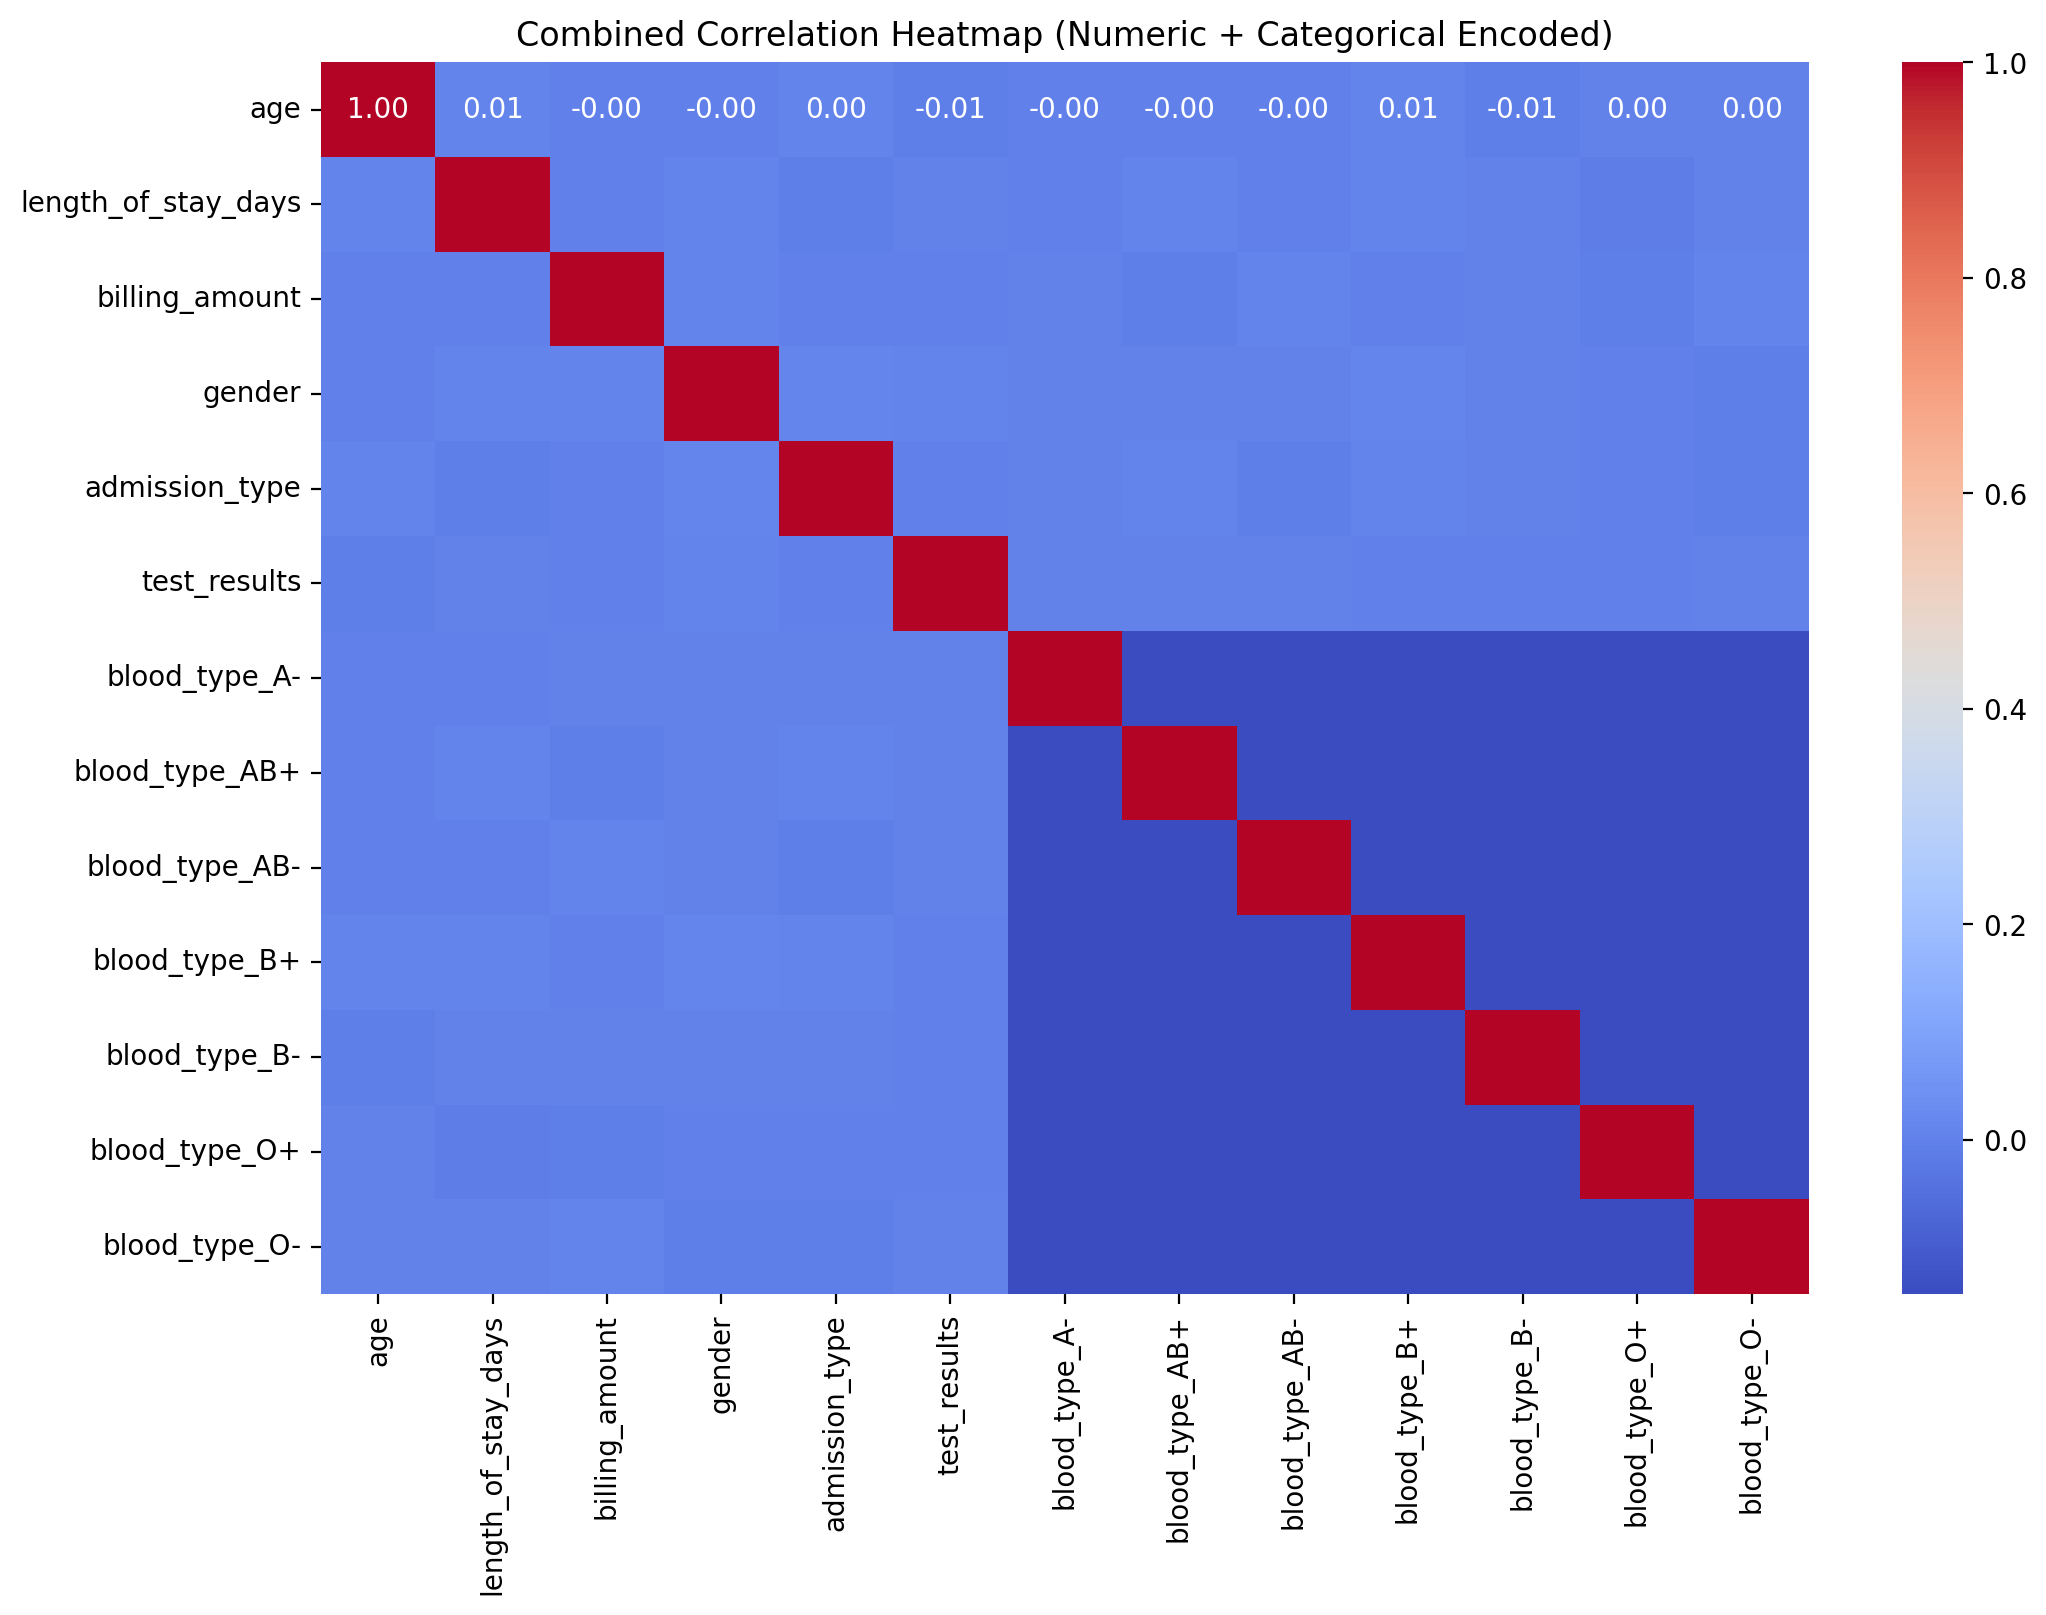

In [61]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Combined Correlation Heatmap (Numeric + Categorical Encoded)")

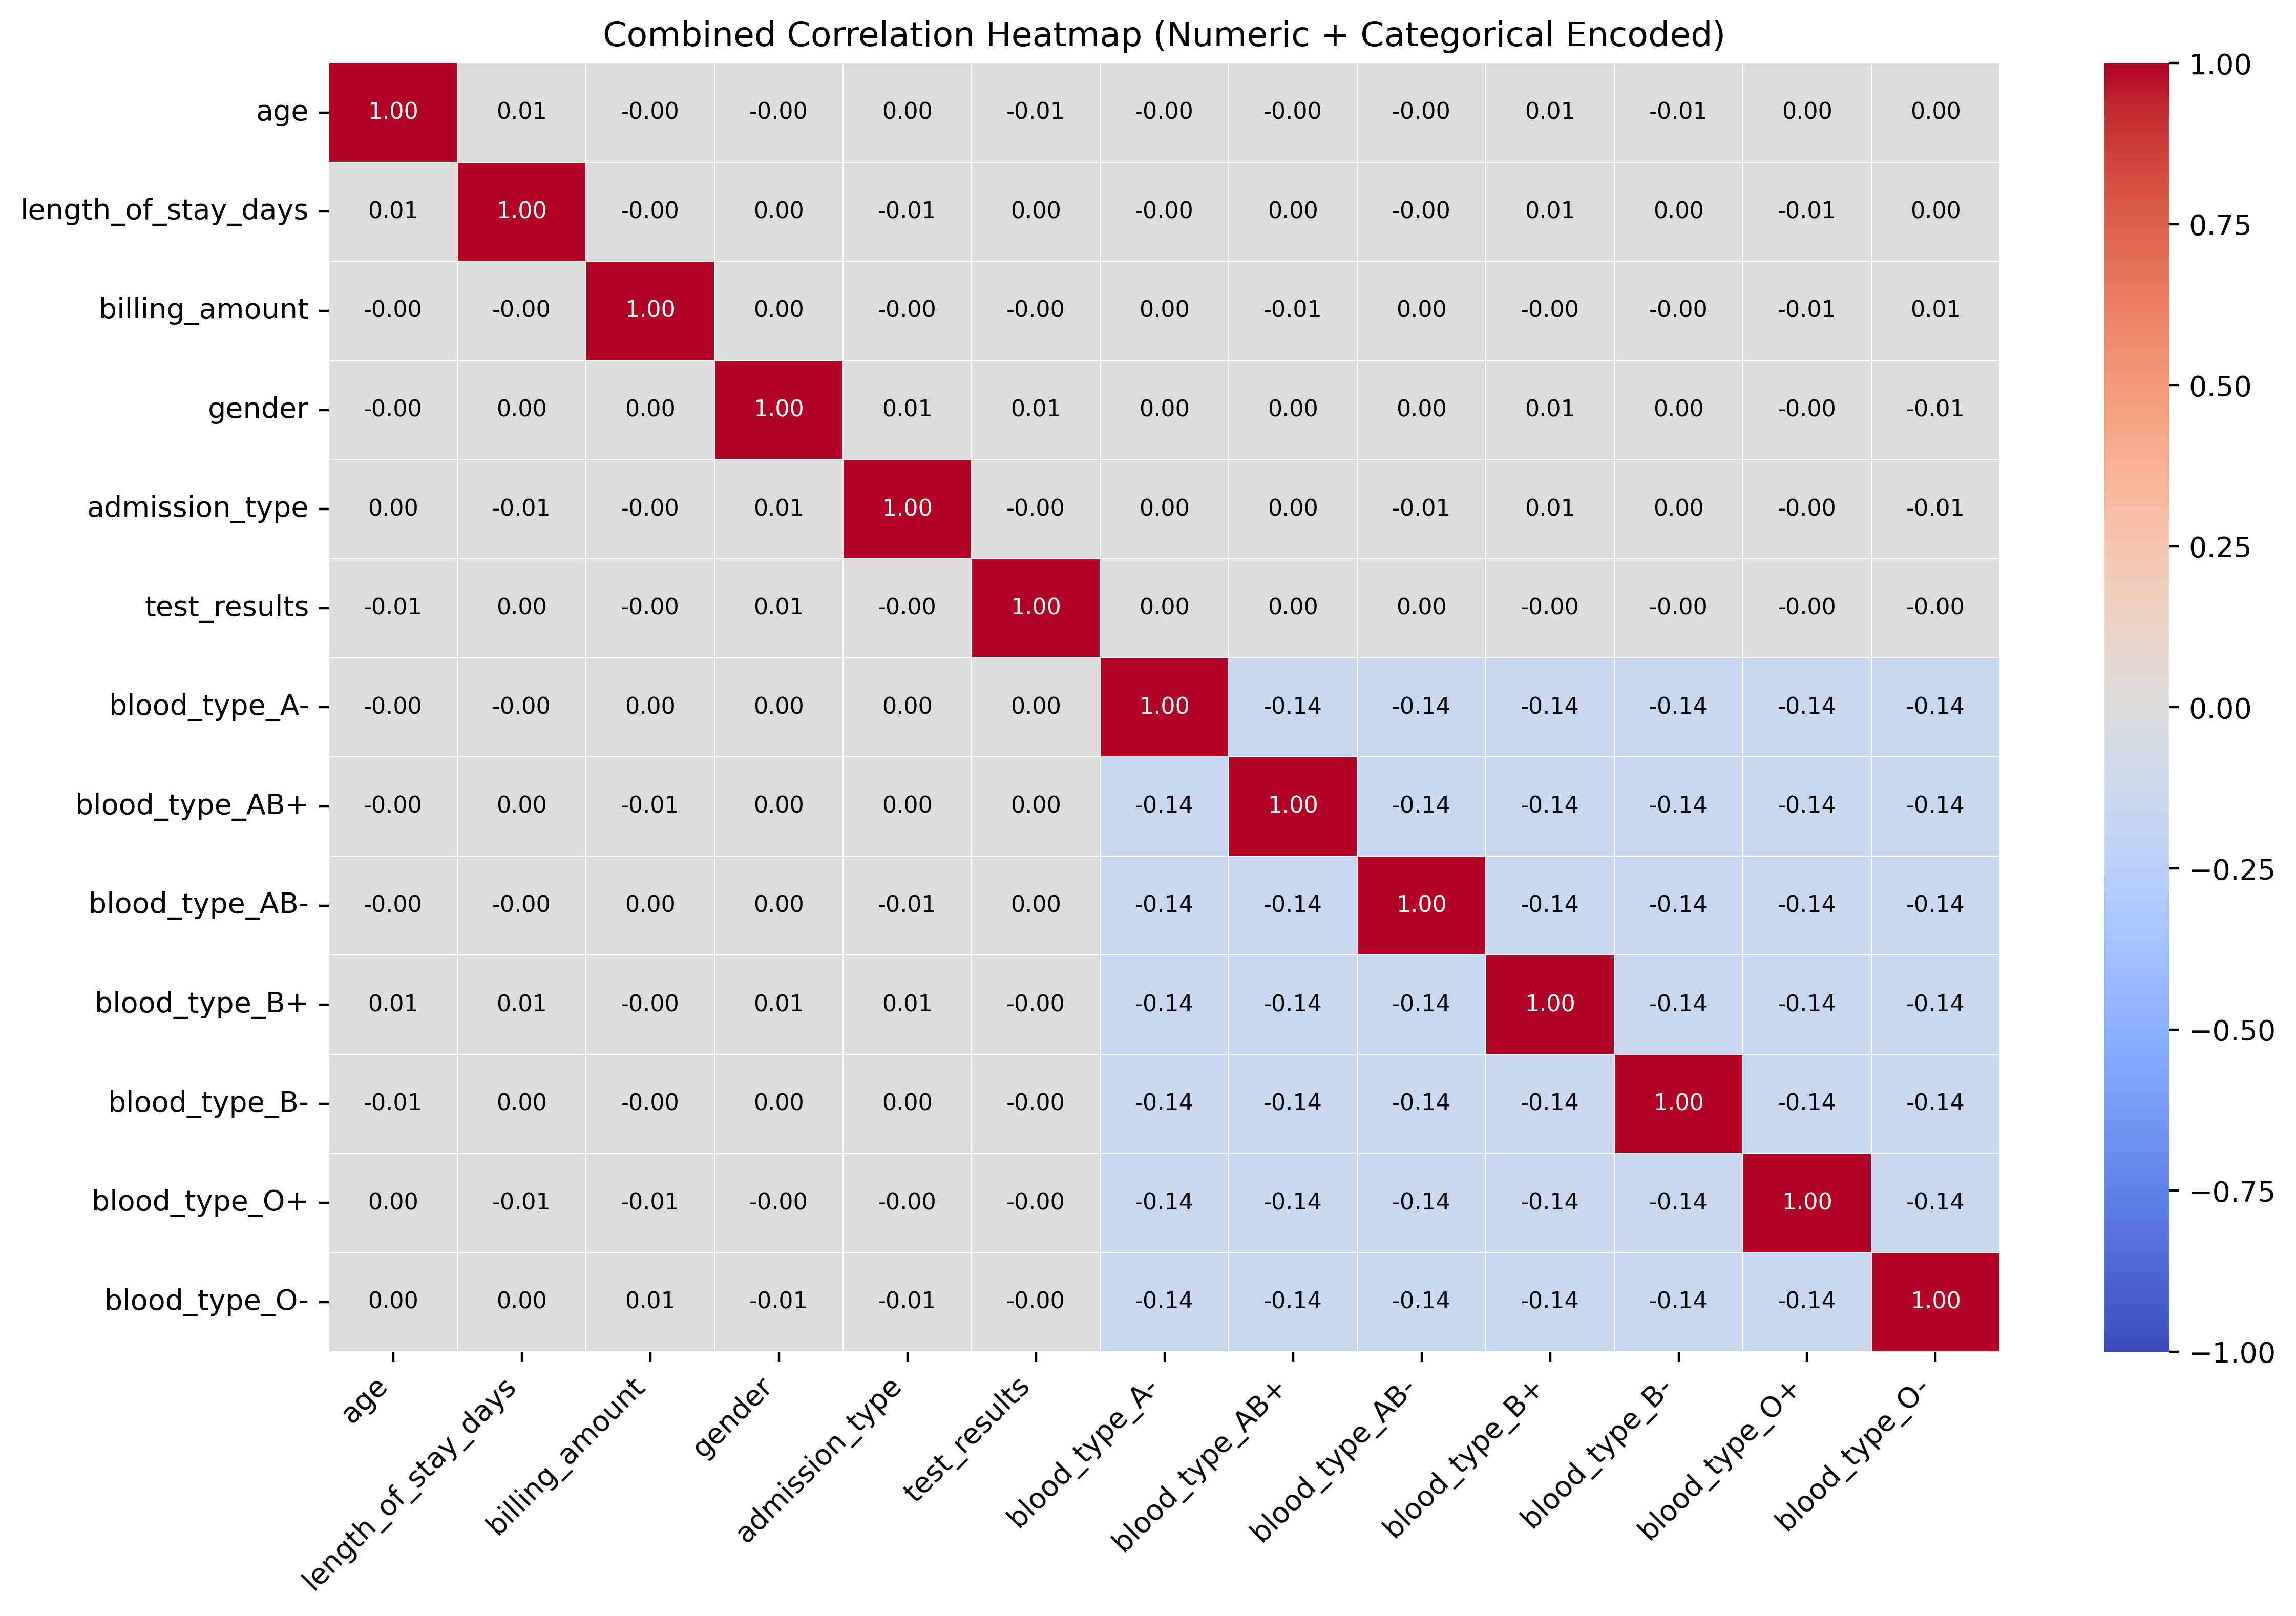

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8), dpi=200)
ax = sns.heatmap(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.3)

# manual annotations
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        val = corr_matrix.iloc[i, j]
        color = "white" if abs(val) > 0.5 else "black"
        ax.text(j + 0.5, i + 0.5, f"{val:.2f}", ha="center", va="center", color=color, fontsize=8)

plt.title("Combined Correlation Heatmap (Numeric + Categorical Encoded)")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


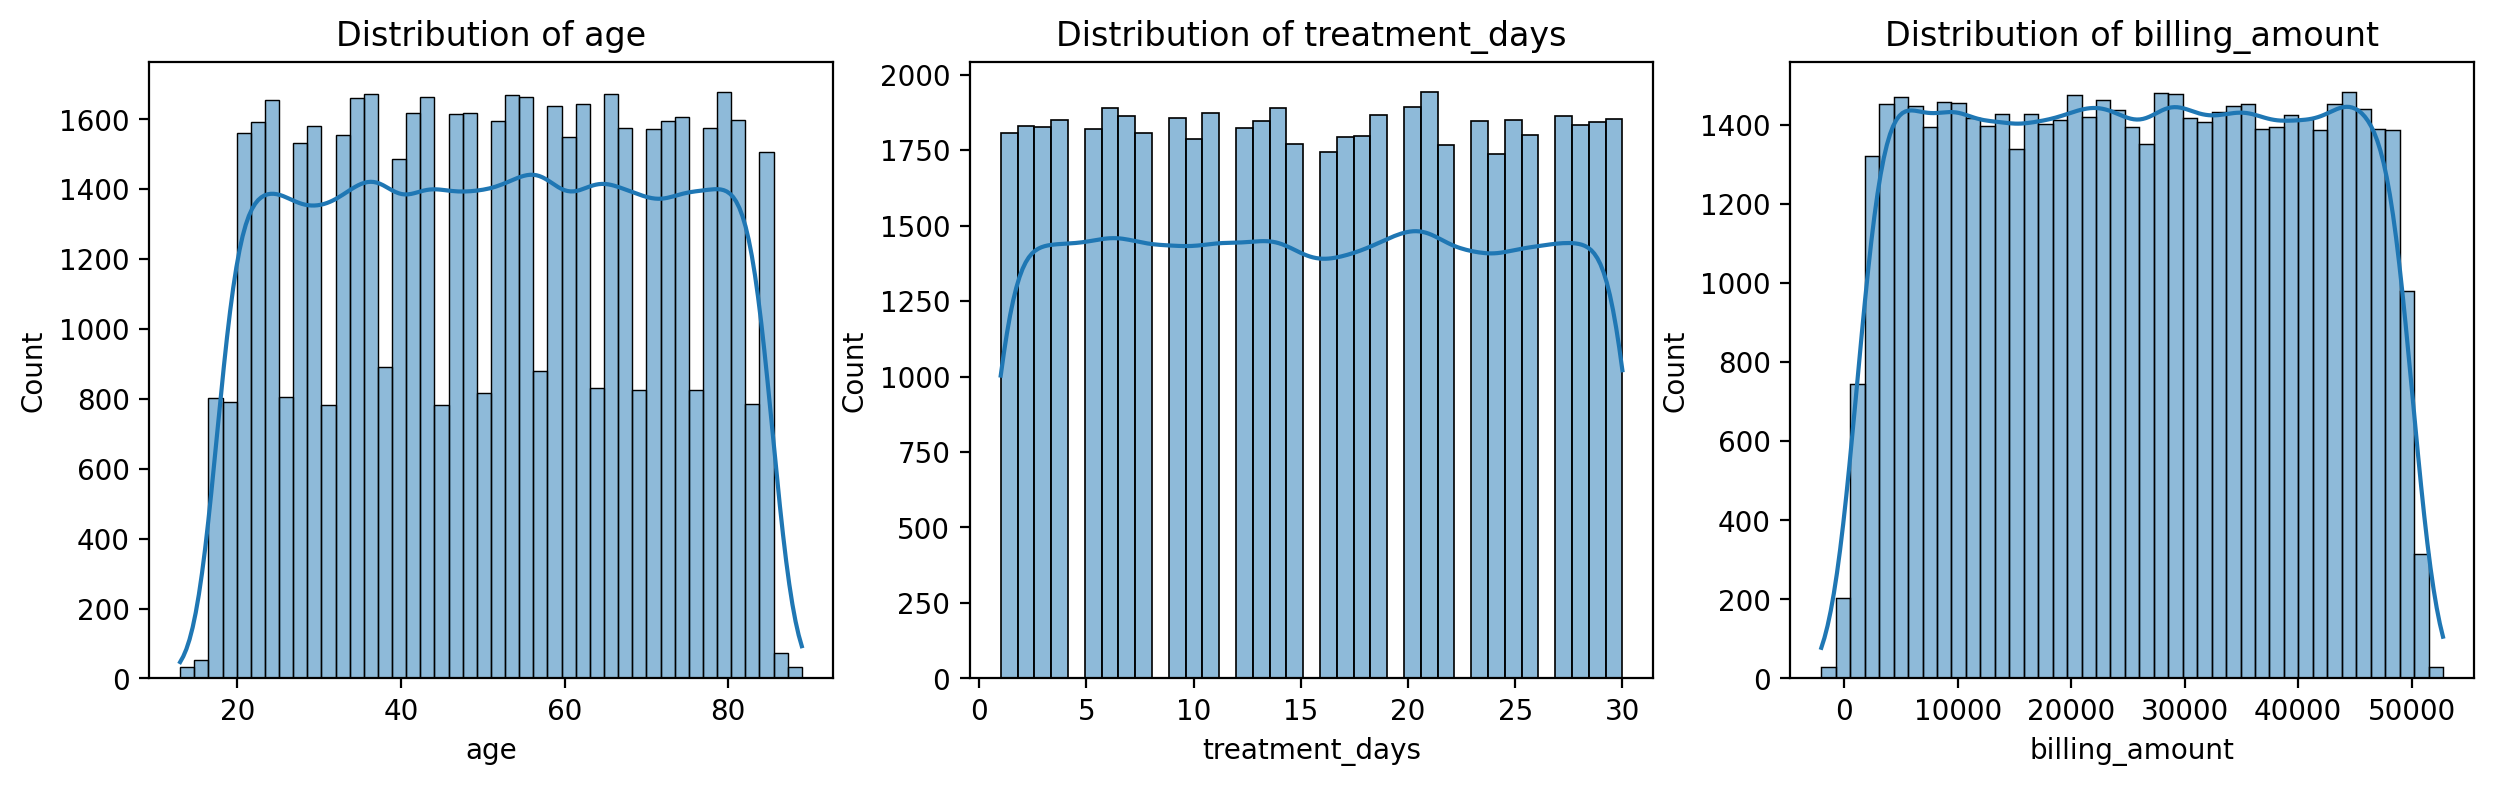

In [63]:
numeric_cols = ["age", "treatment_days", "billing_amount"]

plt.figure(figsize=(15, 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")

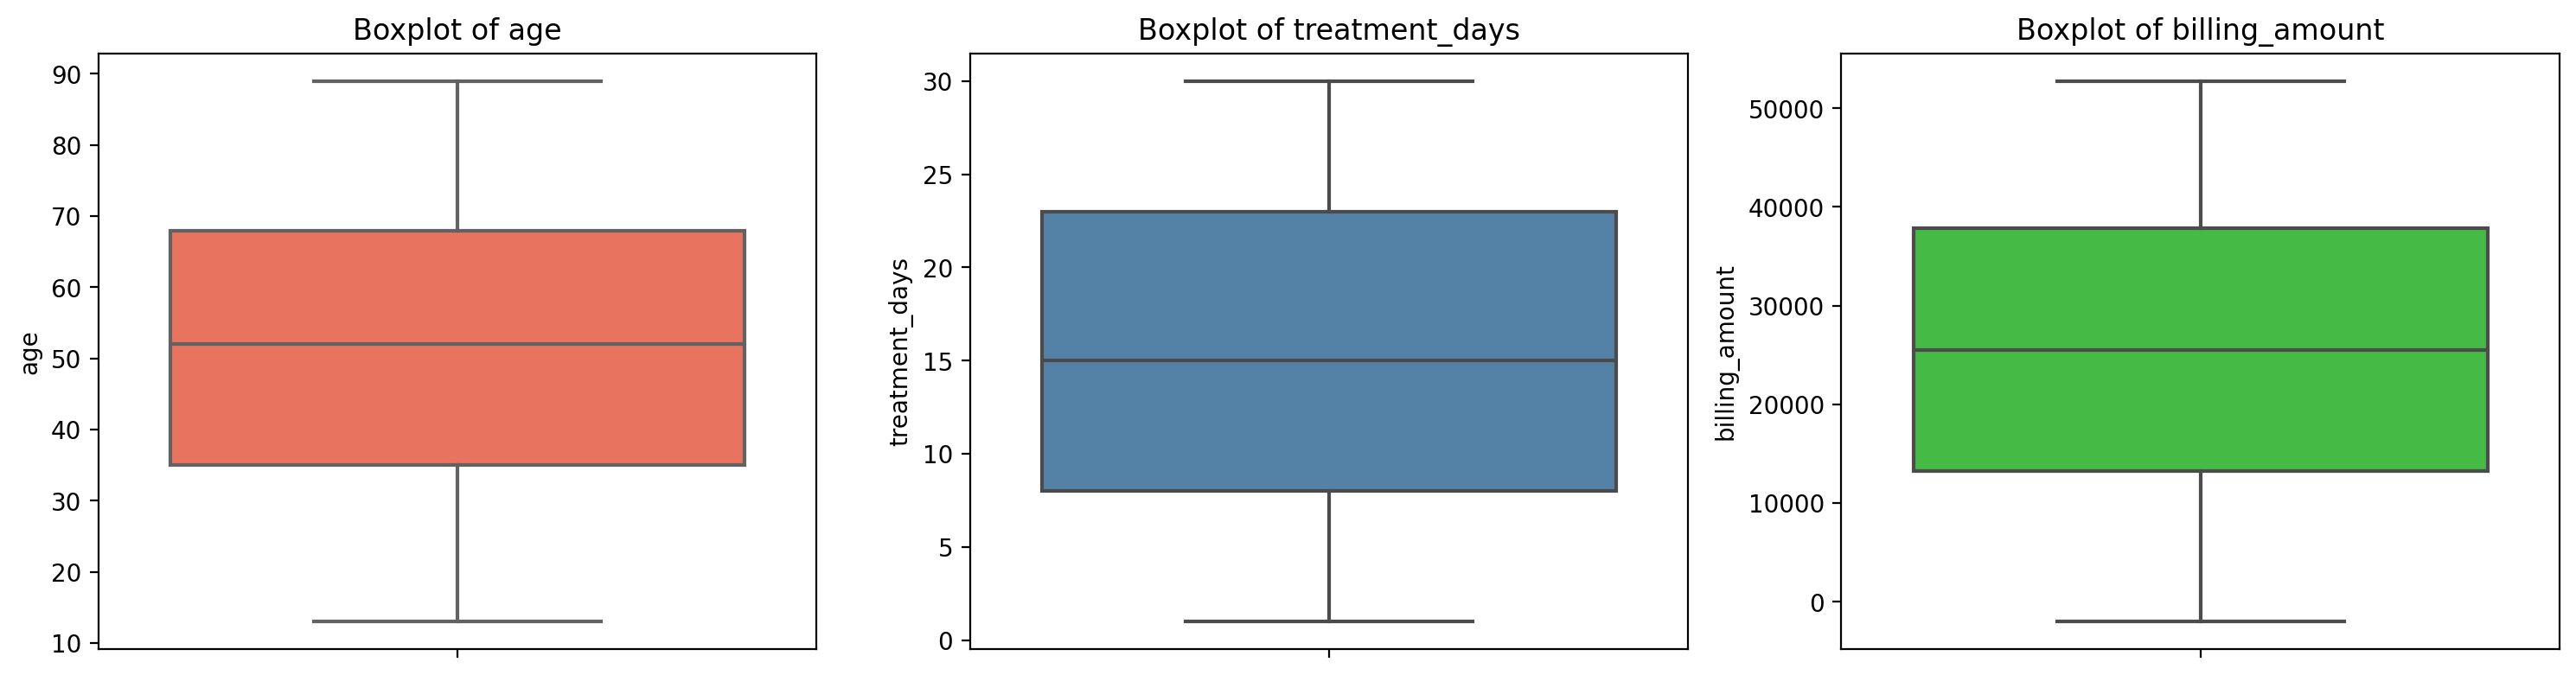

In [64]:
numeric_cols = ["age", "treatment_days", "billing_amount"]

box_colors = ['#FF6347', '#4682B4', '#32CD32']

plt.figure(figsize=(15, 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color=box_colors[i-1])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()

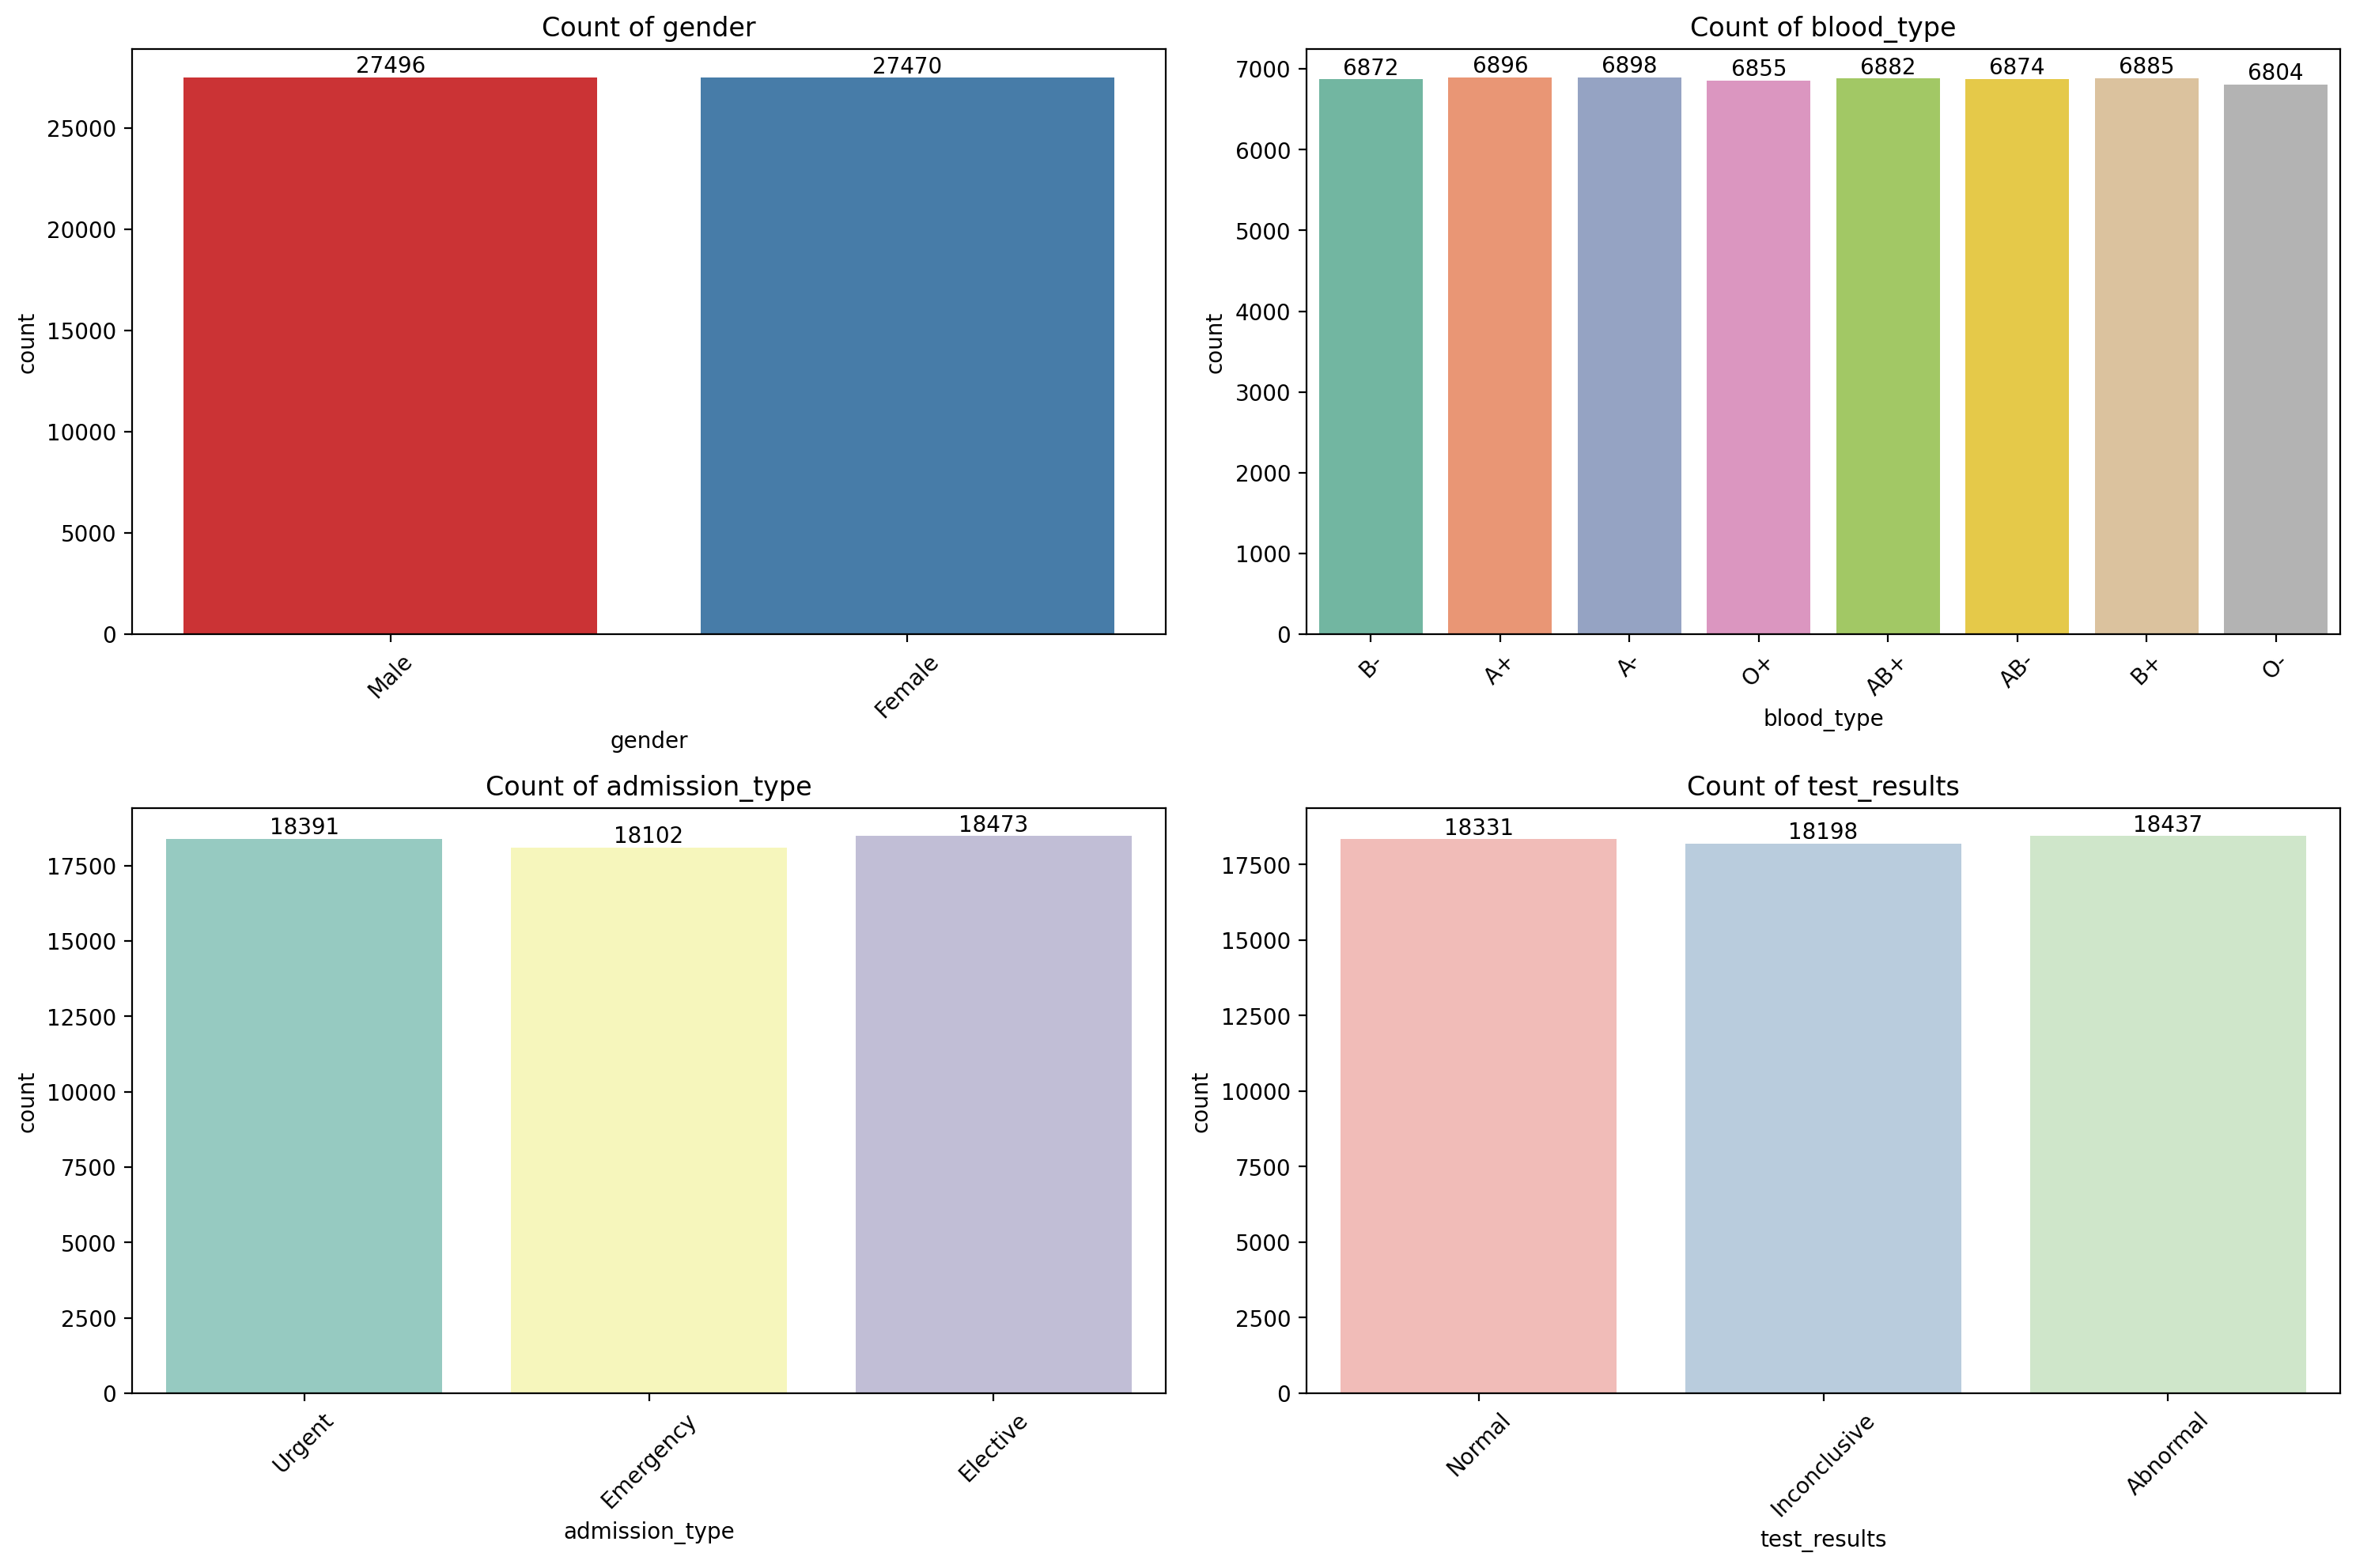

In [65]:
categorical_cols = ["gender", "blood_type", "admission_type", "test_results"]

# Define a list of color palettes for each plot
palettes = ["Set1", "Set2", "Set3", "Pastel1"]

plt.figure(figsize=(15, 10))

for i, (col, palette) in enumerate(zip(categorical_cols, palettes), 1):
    plt.subplot(2, 2, i)
    ax = sns.countplot(x=df[col], palette=palette)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)

    # Add count labels on top of bars
    for p in ax.patches:
        count = int(p.get_height())
        ax.annotate(count, (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()

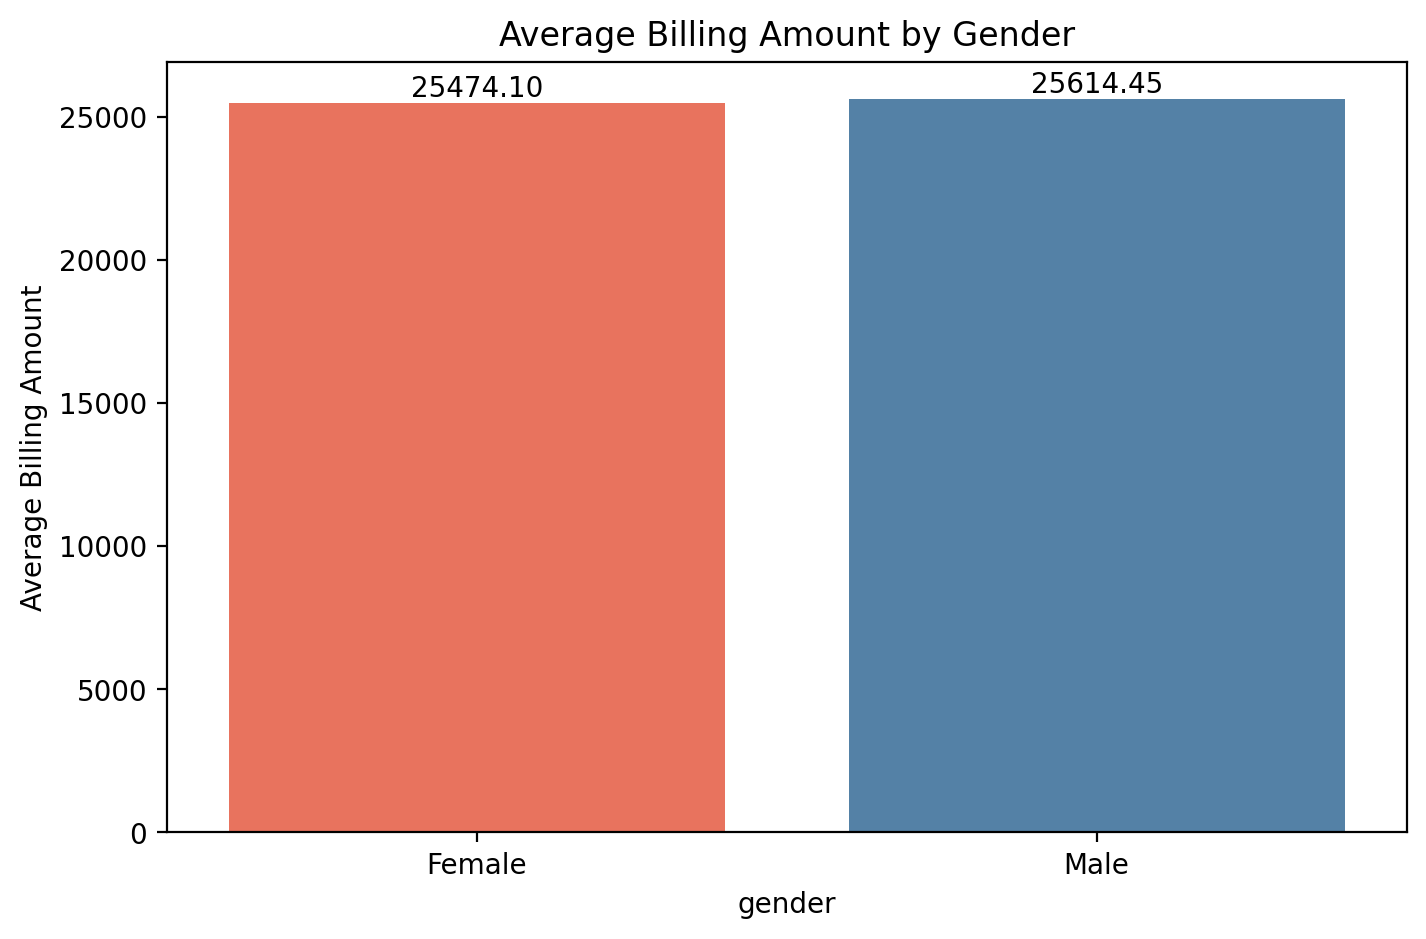

In [66]:
avg_billing_gender = df.groupby("gender")["billing_amount"].mean().reset_index()

# Define colors for each gender (match order of categories)
colors = ["#FF6347", "#4682B4"]

plt.figure(figsize=(8,5))
ax = sns.barplot(data=avg_billing_gender, x="gender", y="billing_amount", palette=colors)
plt.title("Average Billing Amount by Gender")
plt.ylabel("Average Billing Amount")

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

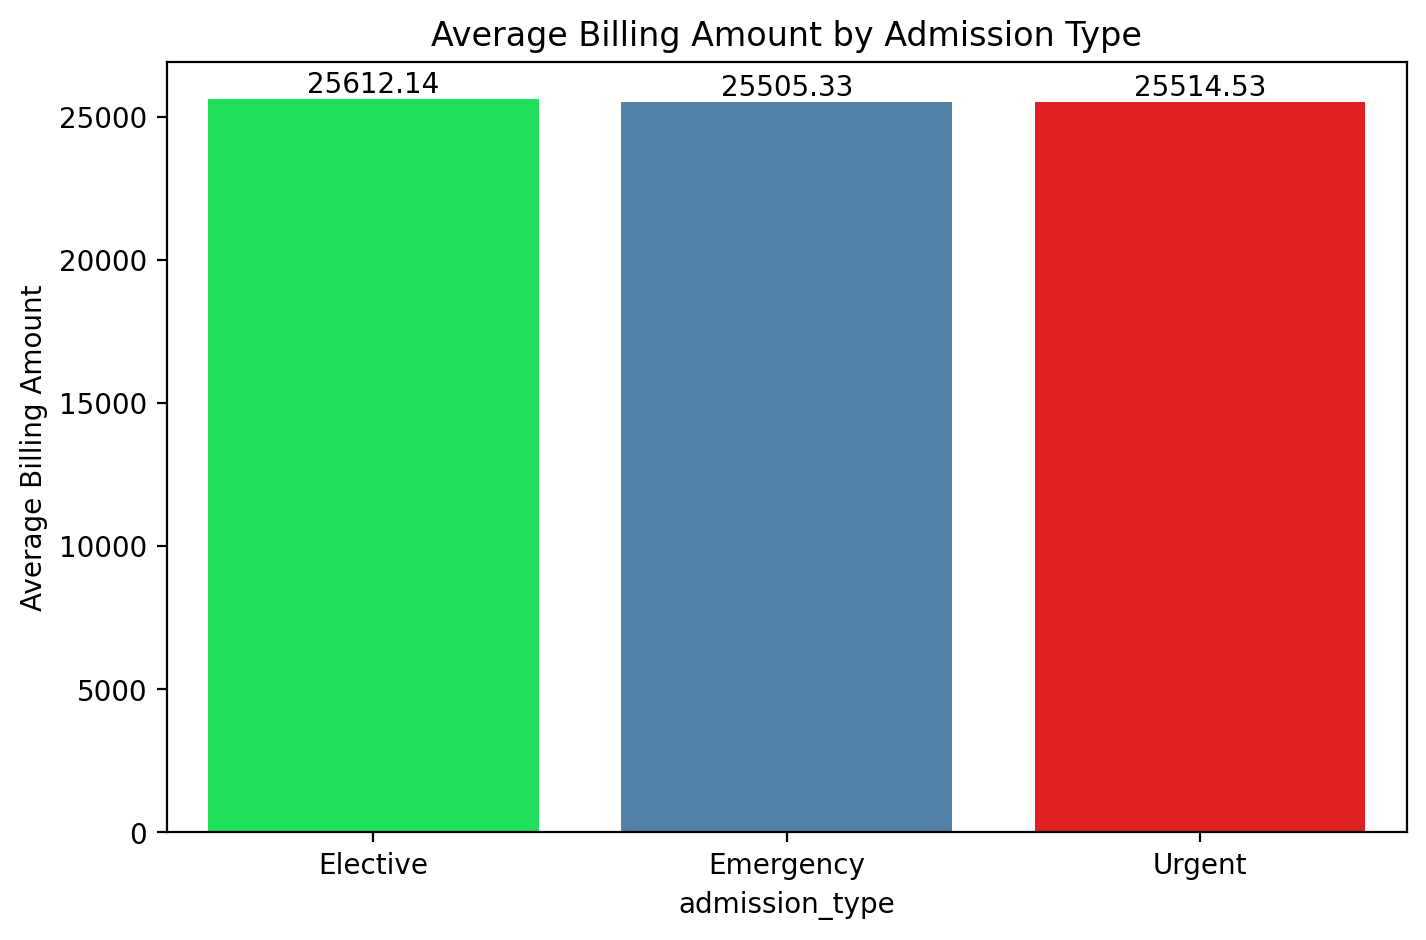

In [67]:
colors = ["#00FF51", "#4682B4", "#FF0000"]

avg_billing_admission = df.groupby("admission_type")["billing_amount"].mean().reset_index()

plt.figure(figsize=(8,5))
ax = sns.barplot(data=avg_billing_admission, x="admission_type", y="billing_amount", palette=colors)
plt.title("Average Billing Amount by Admission Type")
plt.ylabel("Average Billing Amount")

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

In [68]:
# Question: Is there a relationship between age and treatment_days?
#
# Null Hypothesis (H0): There is no correlation between age and treatment duration.
# Alternative Hypothesis (H1): There is a significant correlation between age and treatment duration.

stats.pearsonr(df['age'], df['treatment_days'])

PearsonRResult(statistic=0.007889629487784133, pvalue=0.0643572547685278)

In [69]:
# Question: Is there a relationship between billing_amount and treatment_days?
#
# Null Hypothesis (H0): There is no correlation between billing amount and treatment duration.
# Alternative Hypothesis (H1): There is a significant correlation between billing amount and treatment duration.

stats.pearsonr(df['billing_amount'], df['treatment_days'])
     

PearsonRResult(statistic=-0.004891344039521444, pvalue=0.2514857784115641)

In [70]:
# Question: Does billing amount differ significantly between genders?
#
# Null Hypothesis (H0): There is no difference in average billing amount between Male and Female patients.
# Alternative Hypothesis (H1): There is a significant difference in average billing amount between genders.

male_billing = df[df['gender'] == 'Male']['billing_amount']
female_billing = df[df['gender'] == 'Female']['billing_amount']

result = stats.ttest_ind(male_billing, female_billing, equal_var=False)  # Welch's T-Test for more credible results

print("Male mean:", male_billing.mean())
print("Female mean:", female_billing.mean())
print("T-statistic:", result.statistic)
print("P-value:", result.pvalue)
print("df:", result.df)

Male mean: 25614.447914601406
Female mean: 25474.098266019966
T-statistic: 1.1579356468394306
P-value: 0.24689533061423297
df: 54963.99998973179


In [71]:
# Question: Does billing amount differ across different admission types?
#
# Null Hypothesis (H0): The mean billing amount is the same across all admission types.
# Alternative Hypothesis (H1): At least one group has a different mean.

# Separate the billing amounts by each admission type
emergency = df[df['admission_type'] == 'Emergency']['billing_amount']
urgent = df[df['admission_type'] == 'Urgent']['billing_amount']
elective = df[df['admission_type'] == 'Elective']['billing_amount']

# Perform one-way ANOVA
result = stats.f_oneway(emergency, urgent, elective)

print("Emergency mean:", emergency.mean())
print("Urgent mean:", urgent.mean())
print("Elective mean:", elective.mean())
print("F-statistic:", result.statistic)
print("P-value:", result.pvalue)

Emergency mean: 25505.332239513686
Urgent mean: 25514.532045302
Elective mean: 25612.139673178317
F-statistic: 0.31899845136079313
P-value: 0.7268780207253354


In [72]:
# Chi-Squared Test:
# Null hypothesis: There is no relationship between the categorical variables
# Alternative Hypothesis: There is a relationship between the categorical variables

contingency_1 = pd.crosstab(df['gender'], df['medical_condition'])
result_1 = stats.chi2_contingency(contingency_1)

print("Chi-Square Statistic:", result_1.statistic)
print("P-value:", result_1.pvalue)
print("Degrees of Freedom:", result_1.dof)
print("Expected Frequencies:\n", result_1.expected_freq)

Chi-Square Statistic: 1.0720859034675596
P-value: 0.956544546171692
Degrees of Freedom: 5
Expected Frequencies:
 [[4606.81985227 4545.34894298 4567.83830004 4605.82032529 4573.33569843
  4570.83688098]
 [4611.18014773 4549.65105702 4572.16169996 4610.17967471 4577.66430157
  4575.16311902]]


In [73]:
contingency_1

medical_condition  Arthritis  Asthma  Cancer  Diabetes  Hypertension  Obesity
gender                                                                       
Female                  4642    4511    4566      4609          4569     4573
Male                    4576    4584    4574      4607          4582     4573

Text(0.5, 1.0, 'Gender vs Medical Condition (Observed - Expected)')

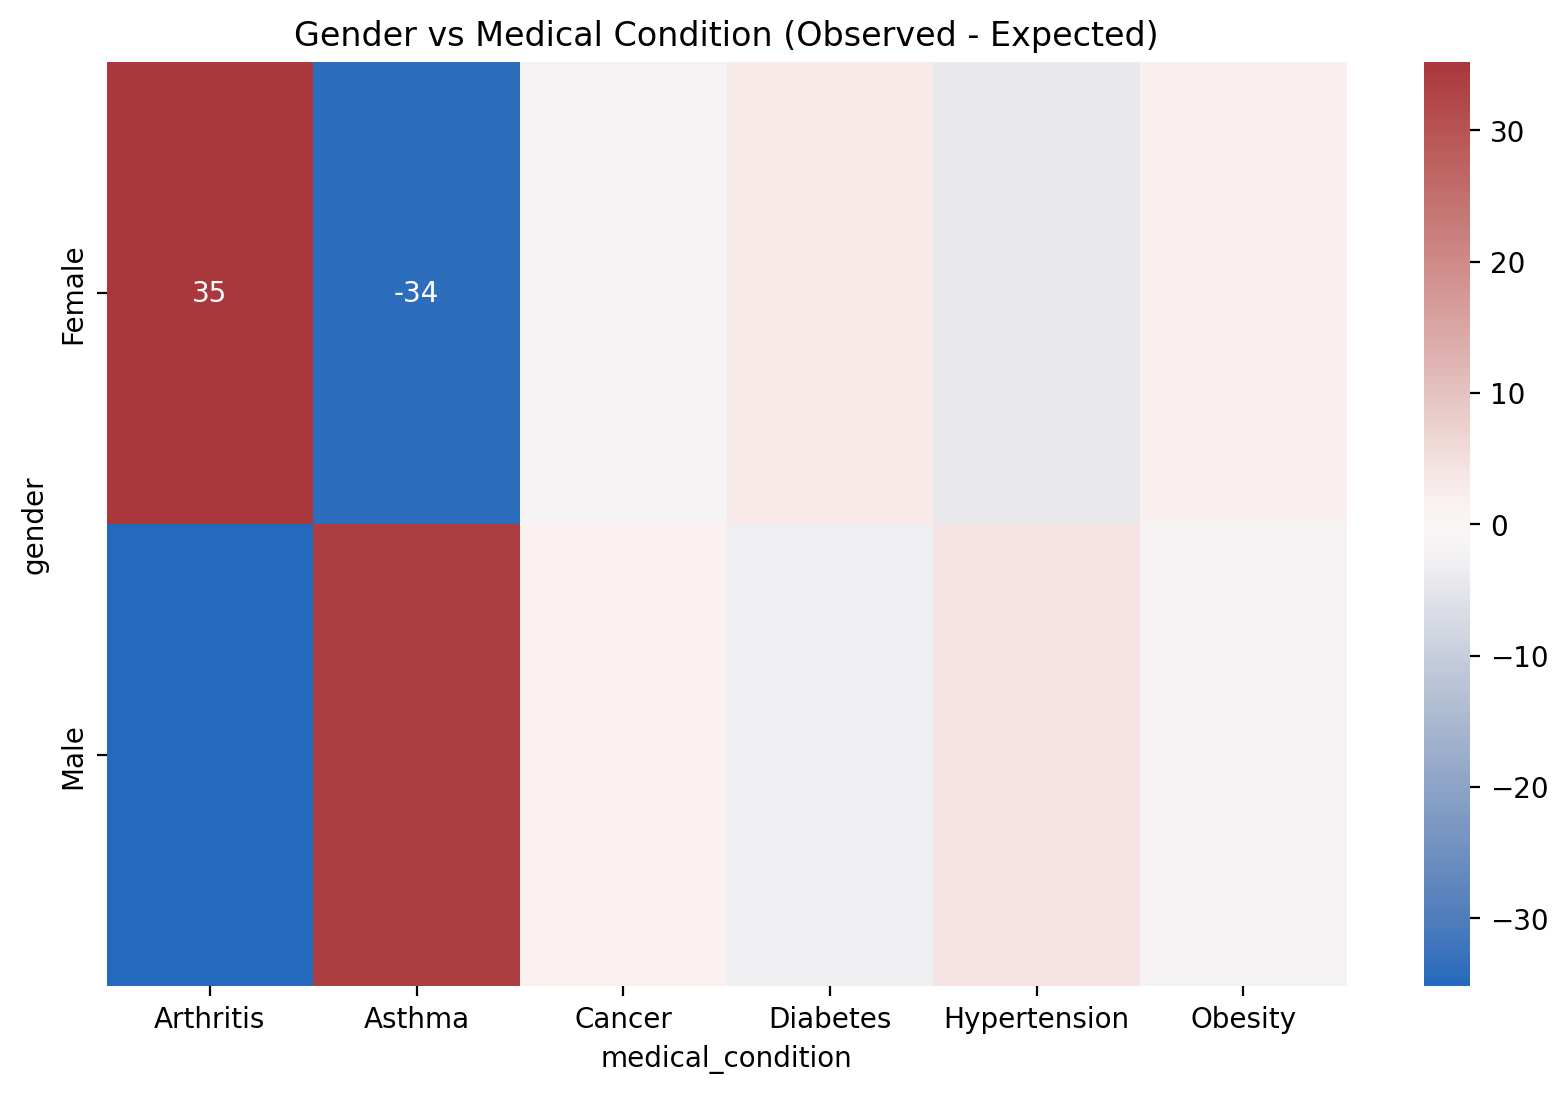

In [74]:
# Heatmap of Observed - Expected
plt.figure(figsize=(10,6))
sns.heatmap(contingency_1 - result_1.expected_freq, annot=True, cmap='vlag')
plt.title("Gender vs Medical Condition (Observed - Expected)")
     

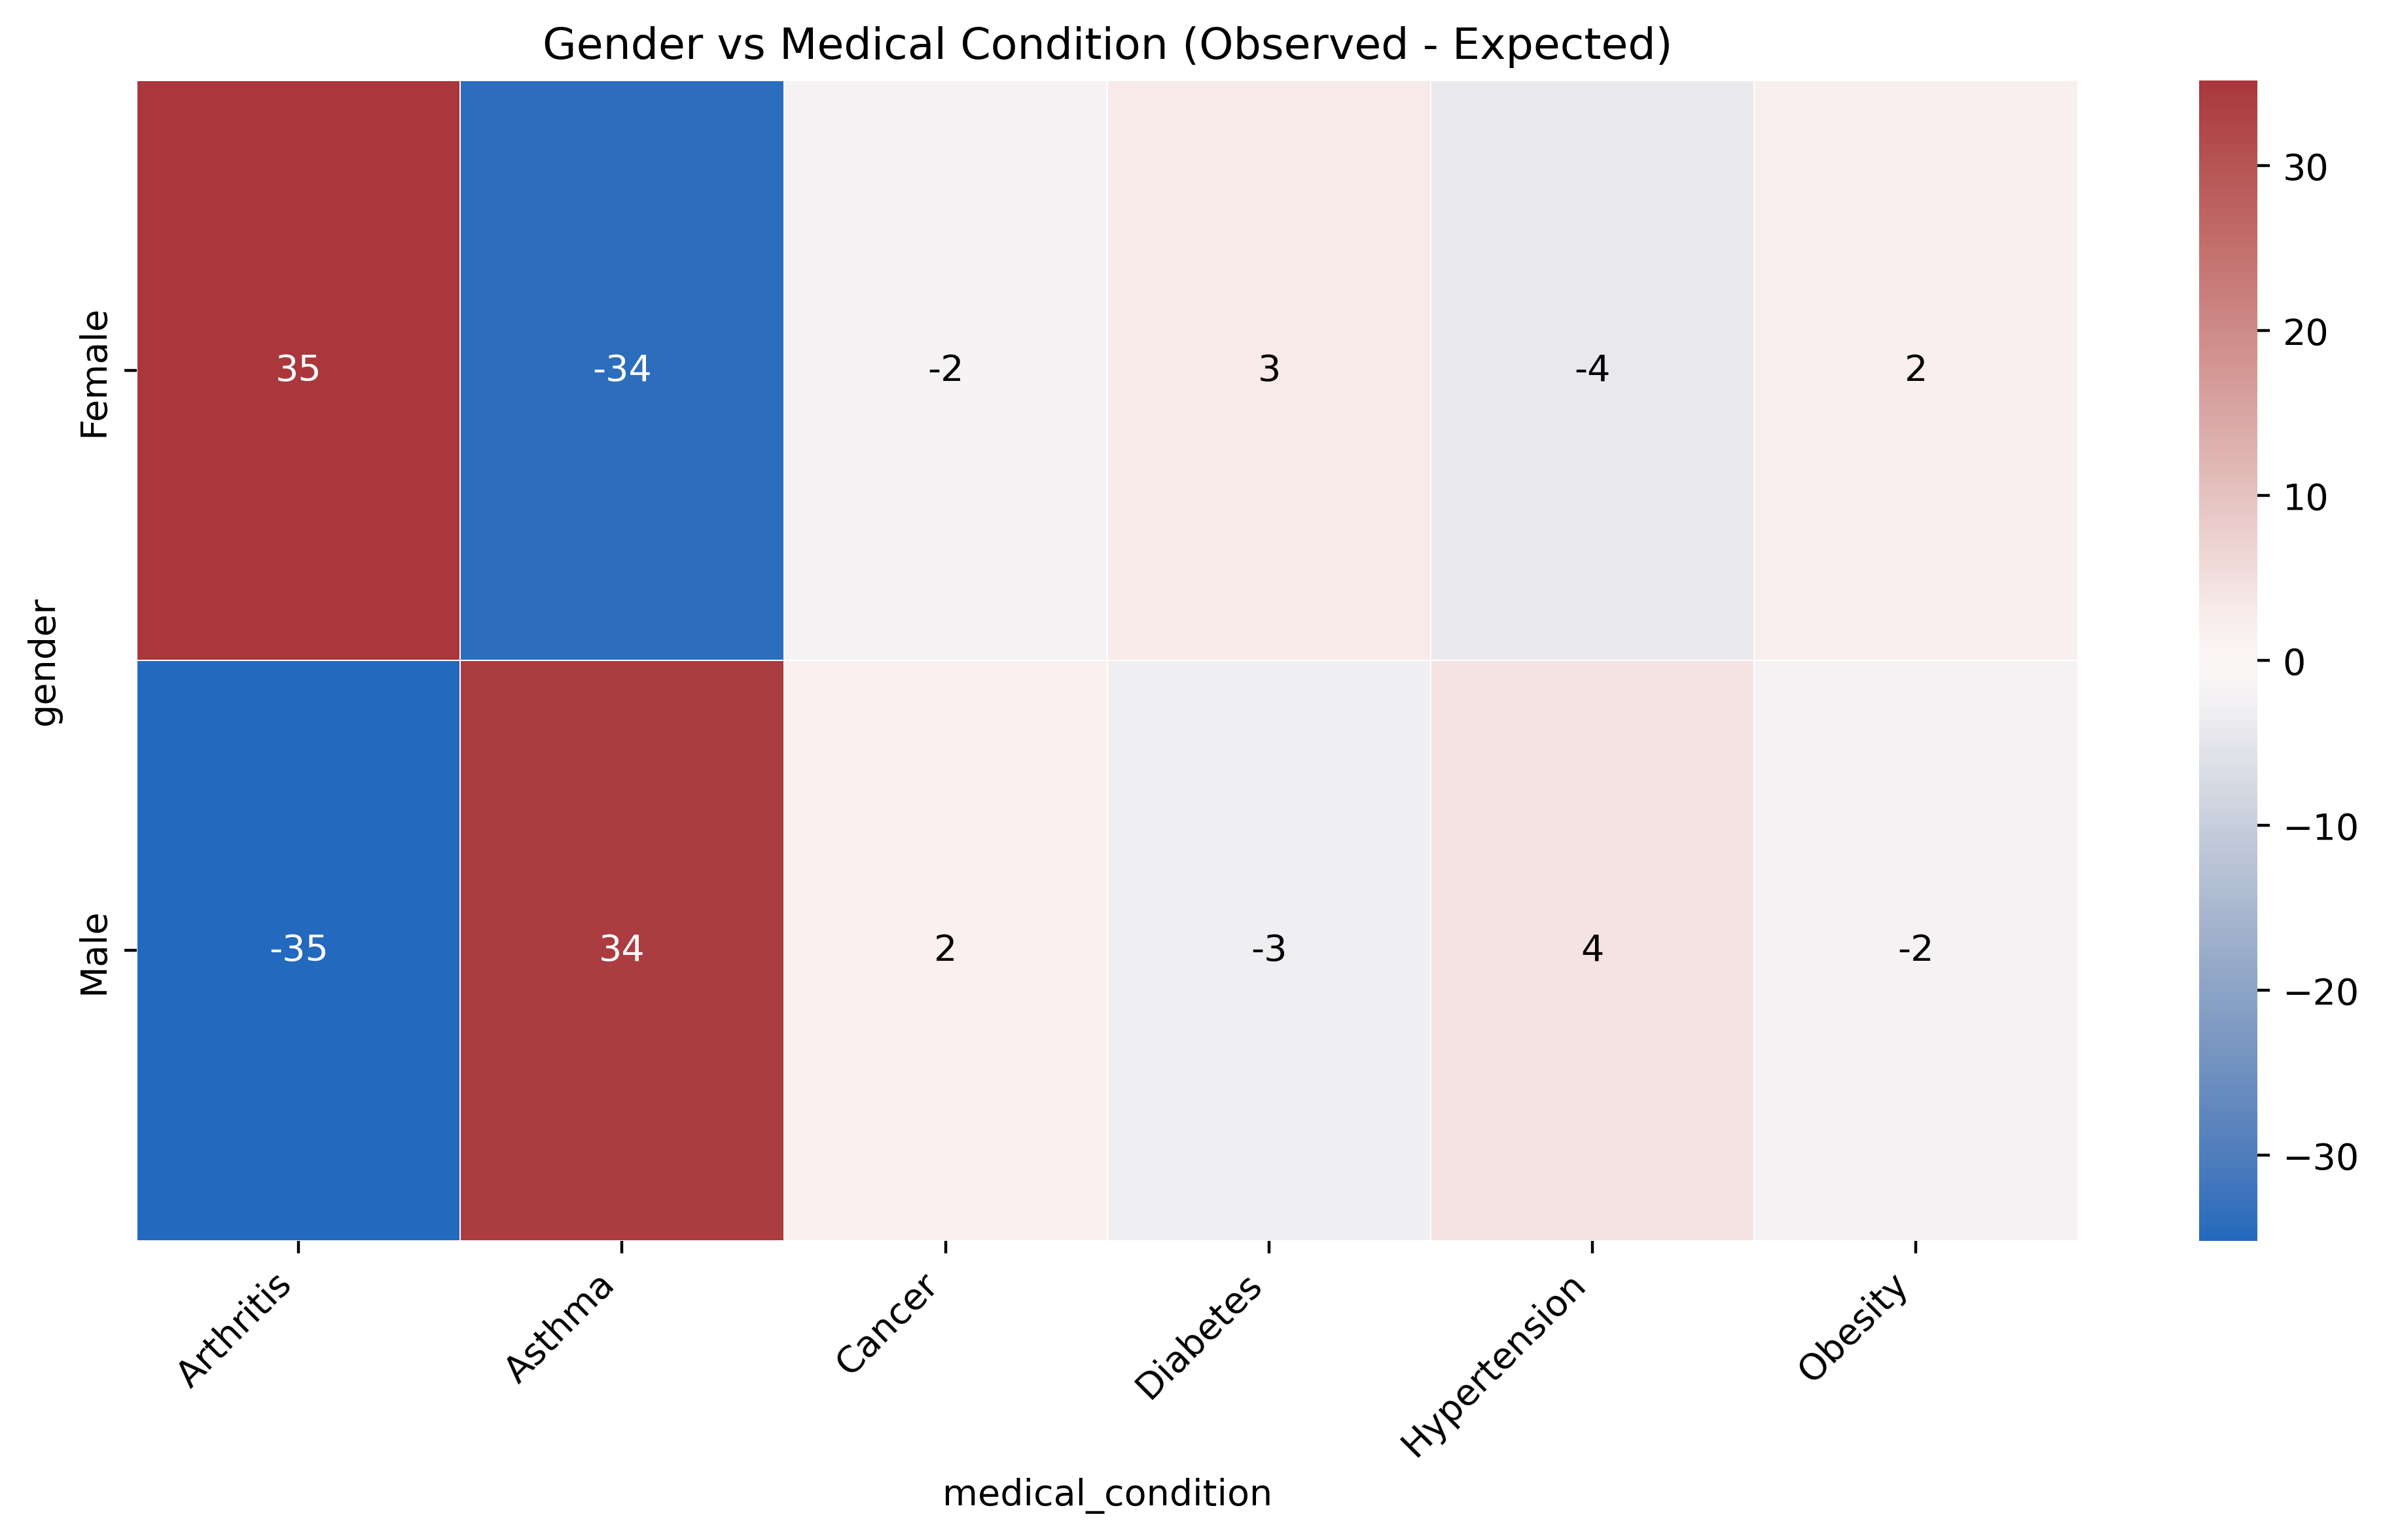

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

diff = contingency_1 - pd.DataFrame(
    result_1.expected_freq,
    index=contingency_1.index,
    columns=contingency_1.columns
)

# symmetric color range helps for diverging maps like vlag
absmax = abs(diff.to_numpy()).max()

plt.figure(figsize=(10,6), dpi=200)
ax = sns.heatmap(diff, cmap="vlag", center=0, vmin=-absmax, vmax=absmax, linewidths=0.3)

# manual annotations with dynamic color
for i in range(diff.shape[0]):
    for j in range(diff.shape[1]):
        val = diff.iloc[i, j]
        color = "white" if abs(val) > absmax * 0.35 else "black"
        ax.text(j + 0.5, i + 0.5, f"{val:.0f}", ha="center", va="center",
                color=color, fontsize=10)

plt.title("Gender vs Medical Condition (Observed - Expected)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [76]:
# Chi-Squared Test:
# Null hypothesis: There is no relationship between the categorical variables
# Alternative Hypothesis: There is a relationship between the categorical variables

contingency_2 = pd.crosstab(df['insurance_provider'], df['test_results'])
result_2 = stats.chi2_contingency(contingency_2)

print("Chi-Square Statistic:", result_2.statistic)
print("P-value:", result_2.pvalue)
print("Degrees of Freedom:", result_2.dof)
print("Expected Frequencies:\n", result_2.expected_freq)

Chi-Square Statistic: 9.034619302093173
P-value: 0.33938393873314565
Degrees of Freedom: 8
Expected Frequencies:
 [[3629.97514827 3582.91955027 3609.10530146]
 [3673.58046793 3625.9596114  3652.45992068]
 [3736.30504312 3687.87108394 3714.82387294]
 [3702.76248954 3654.76334461 3681.47416585]
 [3694.37685114 3646.48640978 3673.13673908]]


In [77]:
contingency_2

test_results        Abnormal  Inconclusive  Normal
insurance_provider                                
Aetna                   3604          3629    3589
Blue Cross              3591          3703    3658
Cigna                   3767          3689    3683
Medicare                3742          3621    3676
UnitedHealthcare        3733          3556    3725

Text(0.5, 1.0, 'Insurance Provider vs Test Results (Observed - Expected)')

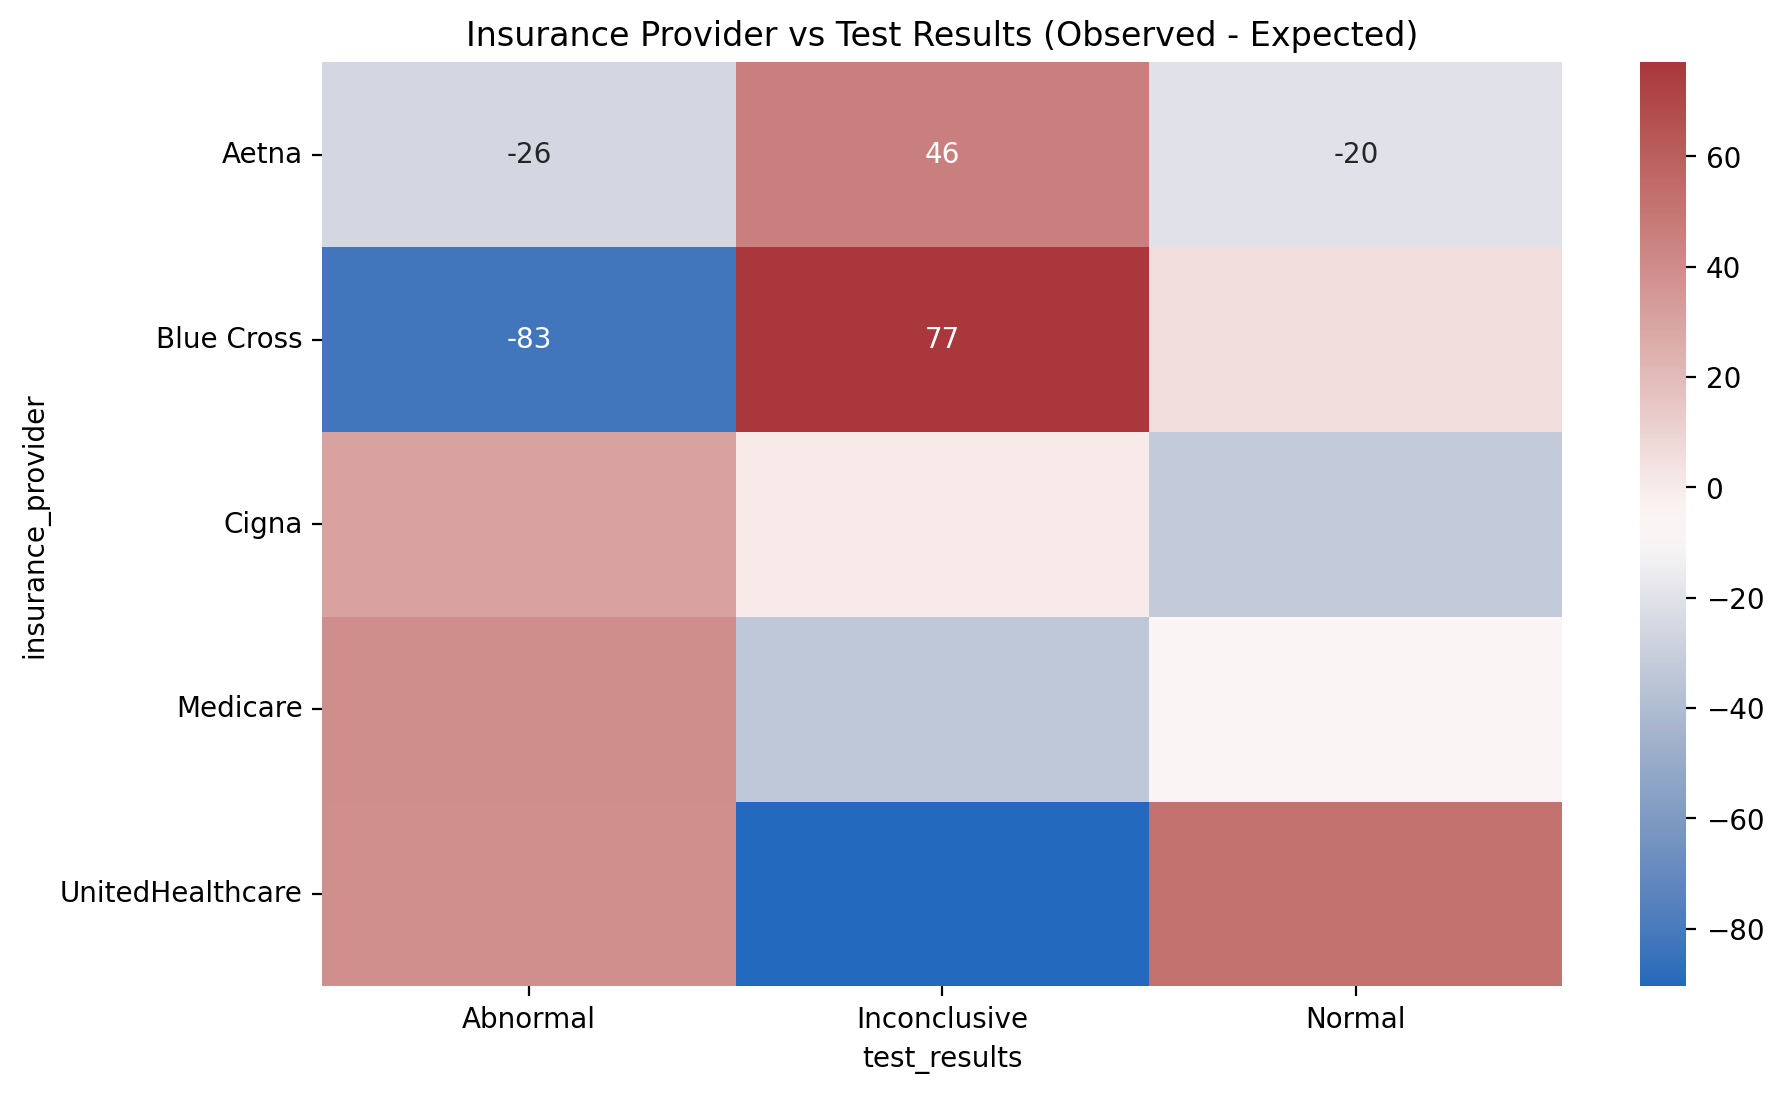

In [78]:
plt.figure(figsize=(10,6))
sns.heatmap(contingency_2 - result_2.expected_freq, annot=True, cmap='vlag')
plt.title("Insurance Provider vs Test Results (Observed - Expected)")

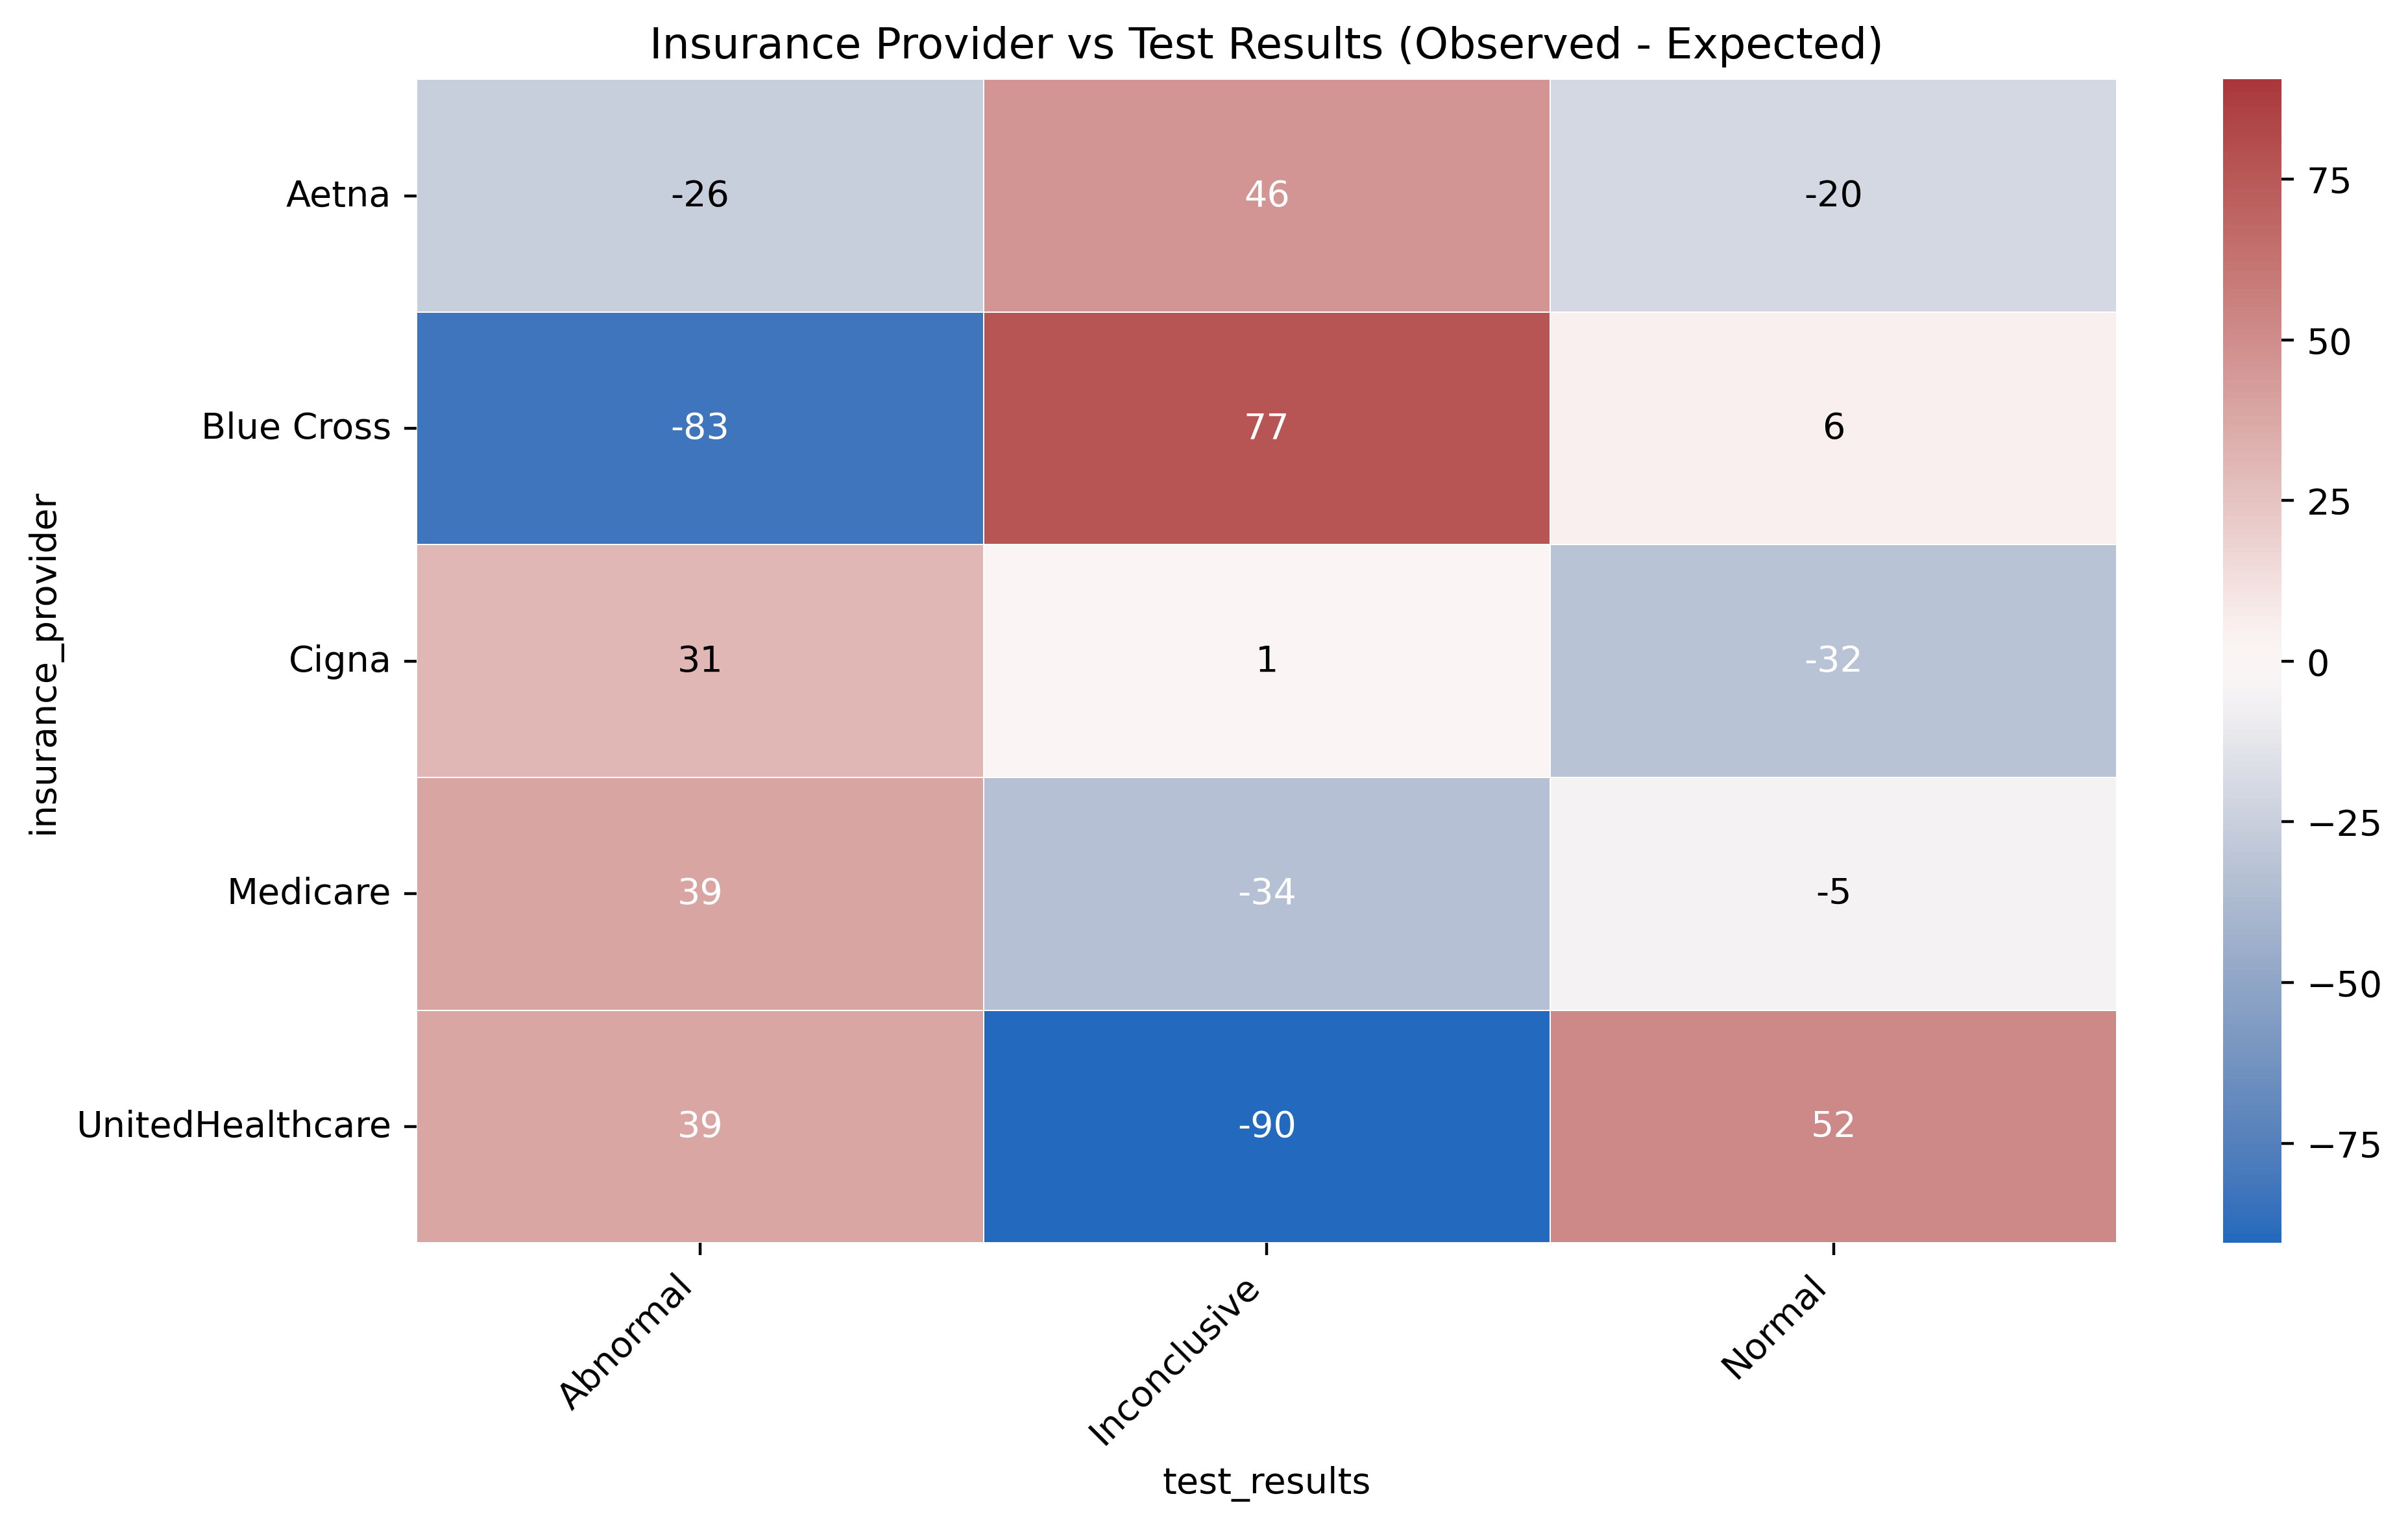

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1) Make expected_freq a DataFrame with matching labels
expected_2 = pd.DataFrame(
    result_2.expected_freq,
    index=contingency_2.index,
    columns=contingency_2.columns
)

# 2) Observed - Expected
diff_2 = contingency_2 - expected_2

# (optional) ensure numeric
diff_2 = diff_2.astype(float)

# 3) Symmetric color range around 0 (best for diverging cmap like 'vlag')
absmax = np.abs(diff_2.to_numpy()).max()

plt.figure(figsize=(10, 6), dpi=200)
ax = sns.heatmap(
    diff_2,
    cmap="vlag",
    center=0,
    vmin=-absmax, vmax=absmax,
    linewidths=0.3
)

# 4) Manual annotations with auto text color (so values don't "disappear")
for i in range(diff_2.shape[0]):
    for j in range(diff_2.shape[1]):
        val = diff_2.iat[i, j]
        txt_color = "white" if abs(val) > absmax * 0.35 else "black"
        ax.text(j + 0.5, i + 0.5, f"{val:.0f}",
                ha="center", va="center", color=txt_color, fontsize=10)

plt.title("Insurance Provider vs Test Results (Observed - Expected)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [80]:
# Chi-Squared Test:
# Null hypothesis: There is no relationship between the categorical variables
# Alternative Hypothesis: There is a relationship between the categorical variables

contingency_3 = pd.crosstab(df['blood_type'], df['test_results'])
result_3 = stats.chi2_contingency(contingency_3)

print("Chi-Square Statistic:", result_3.statistic)
print("P-value:", result_3.pvalue)
print("Degrees of Freedom:", result_3.dof)
print("Expected Frequencies:\n", result_3.expected_freq)

Chi-Square Statistic: 8.001800404507538
P-value: 0.8892322033448401
Degrees of Freedom: 14
Expected Frequencies:
 [[2313.09449478 2283.10970418 2299.79580104]
 [2313.76534585 2283.77185897 2300.46279518]
 [2308.39853728 2278.47462067 2295.12684205]
 [2305.71513299 2275.82600153 2292.45886548]
 [2309.40481388 2279.46785285 2296.12733326]
 [2305.04428192 2275.16384674 2291.79187134]
 [2299.34204781 2269.53553106 2286.12242113]
 [2282.23534549 2252.650584   2269.11407052]]


In [81]:
contingency_3

test_results  Abnormal  Inconclusive  Normal
blood_type                                  
A+                2314          2308    2274
A-                2312          2279    2307
AB+               2281          2309    2292
AB-               2310          2224    2340
B+                2281          2349    2255
B-                2324          2247    2301
O+                2326          2242    2287
O-                2289          2240    2275

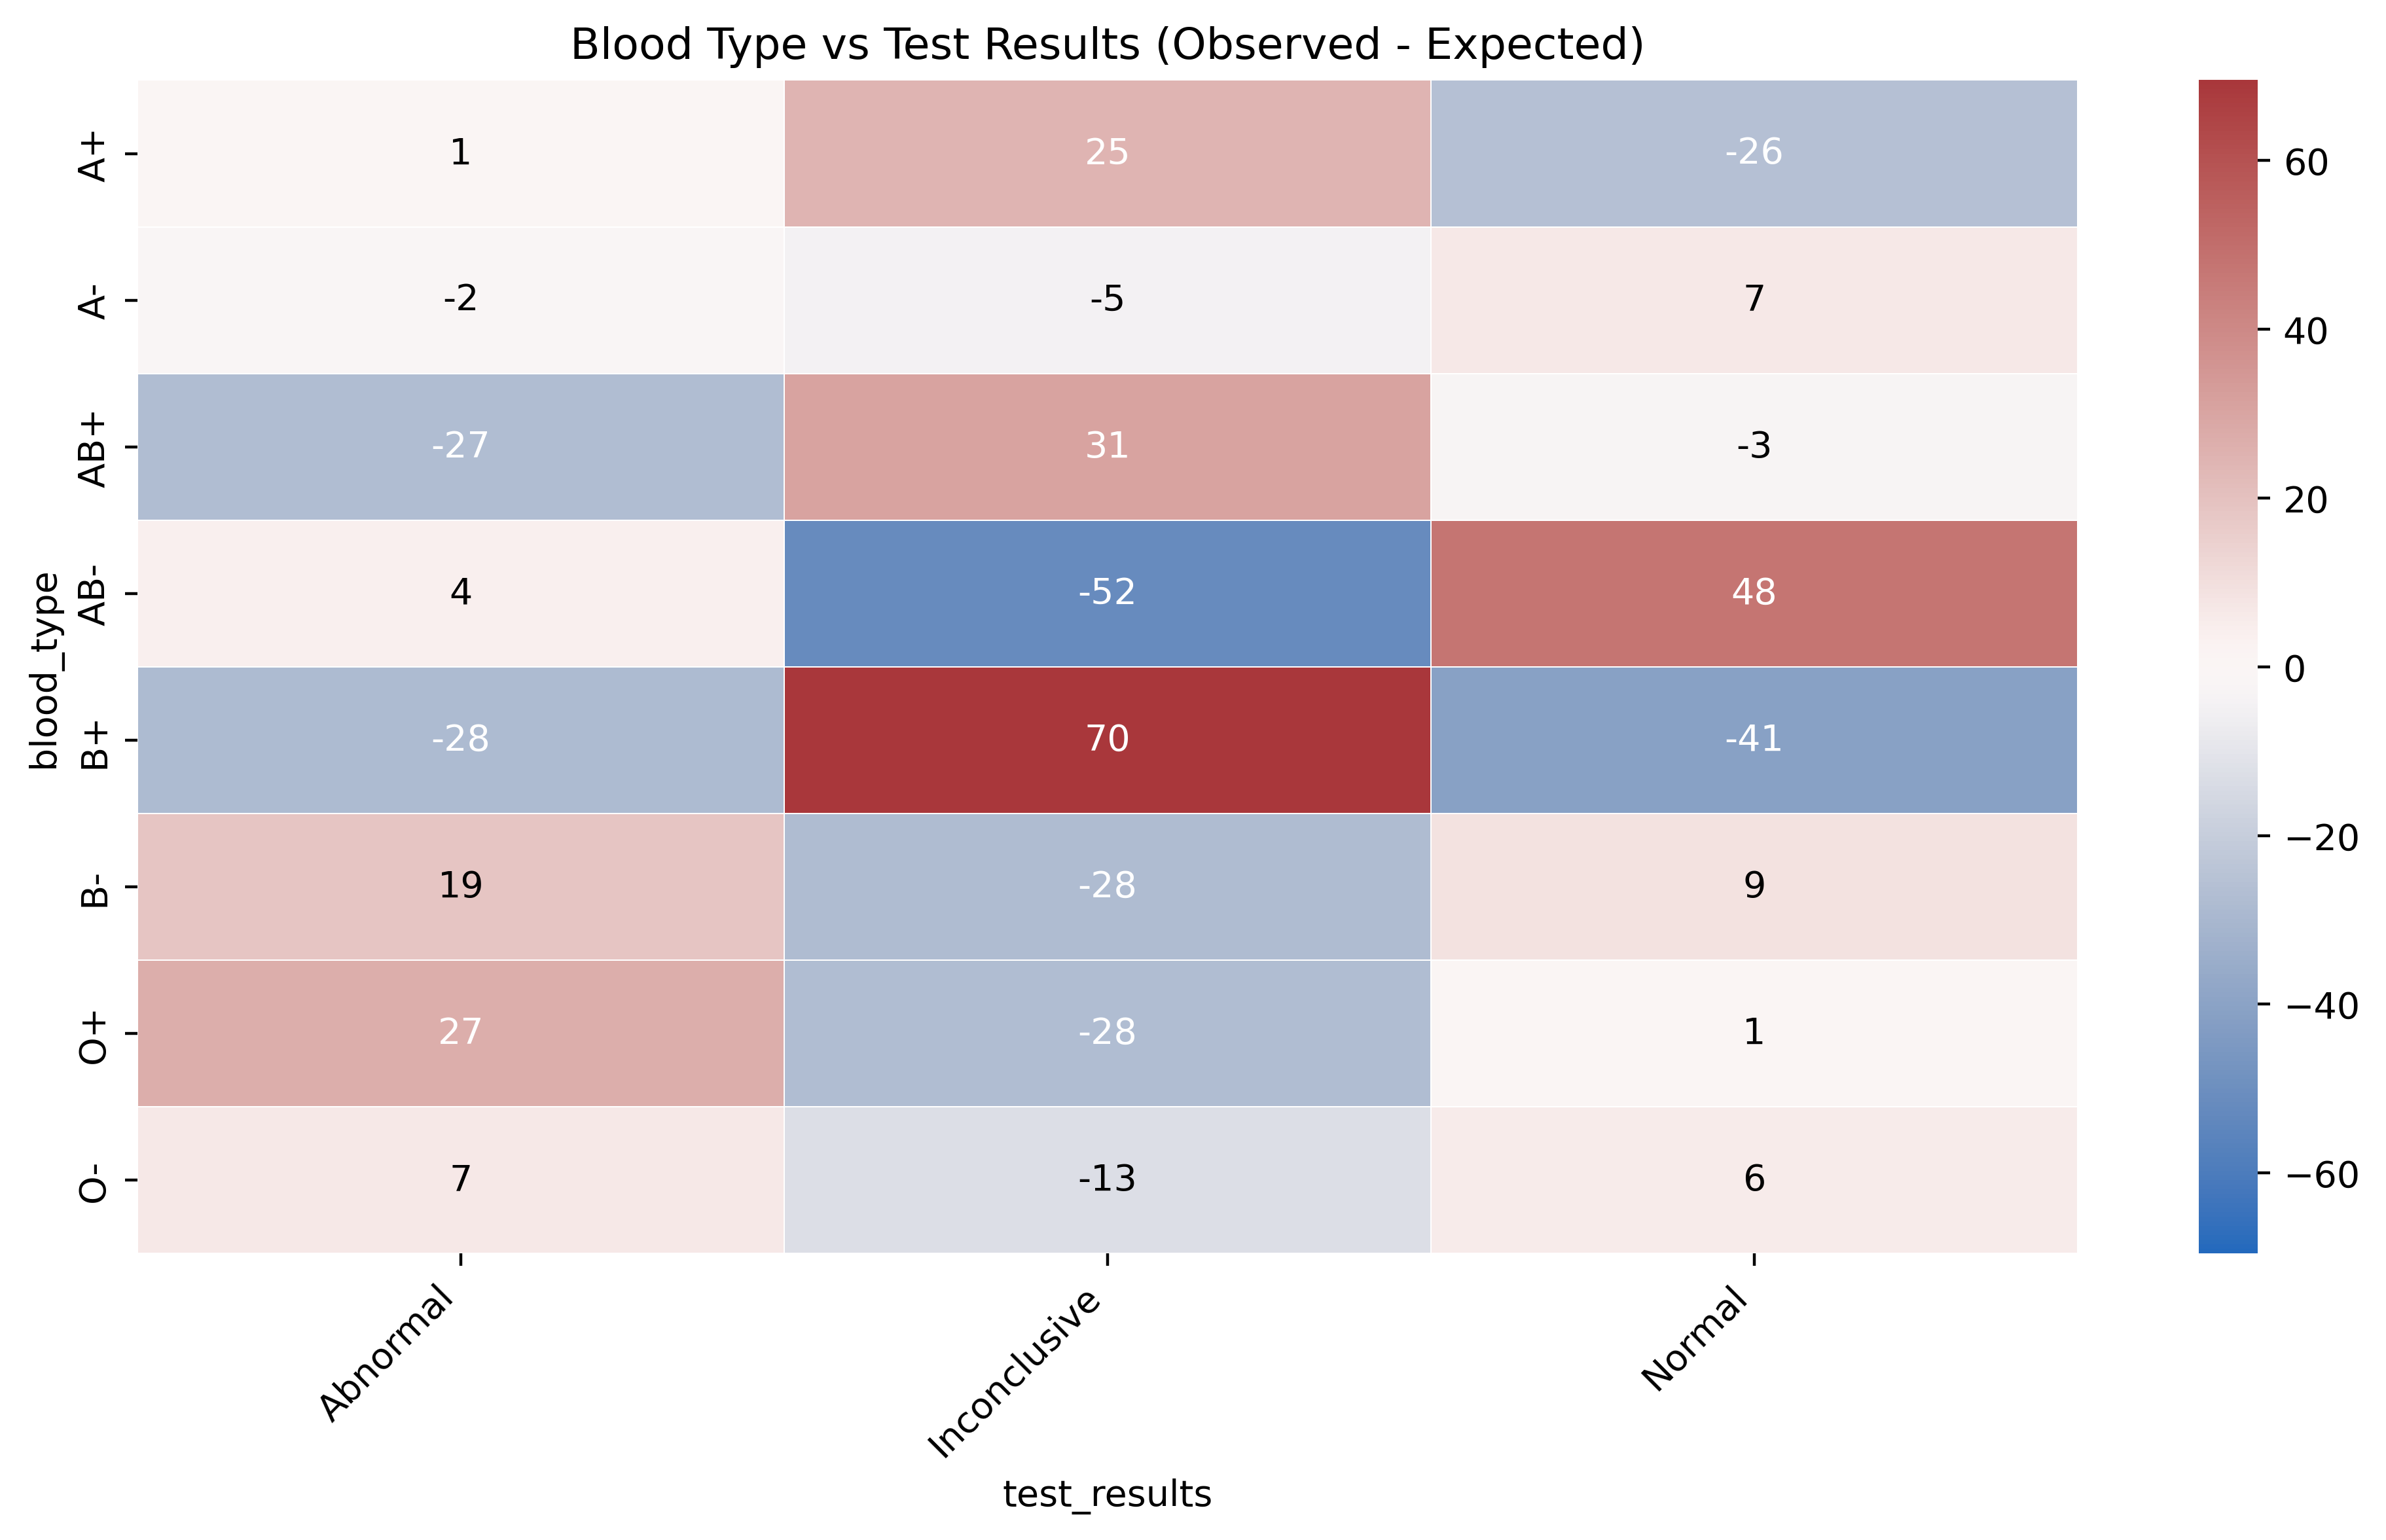

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Make expected_freq match contingency_3's labels
expected_3 = pd.DataFrame(
    result_3.expected_freq,
    index=contingency_3.index,
    columns=contingency_3.columns
)

# 2) Observed - Expected
diff_3 = (contingency_3 - expected_3).astype(float)

# 3) Symmetric color scale around 0
absmax = np.abs(diff_3.to_numpy()).max()

plt.figure(figsize=(10, 6), dpi=200)
ax = sns.heatmap(
    diff_3,
    cmap="vlag",
    center=0,
    vmin=-absmax, vmax=absmax,
    linewidths=0.3
)

# 4) Manual numbers with auto black/white text
for i in range(diff_3.shape[0]):
    for j in range(diff_3.shape[1]):
        val = diff_3.iat[i, j]
        txt_color = "white" if abs(val) > absmax * 0.35 else "black"
        ax.text(j + 0.5, i + 0.5, f"{val:.0f}",
                ha="center", va="center", color=txt_color, fontsize=10)

plt.title("Blood Type vs Test Results (Observed - Expected)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54966 entries, 0 to 54965
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 54966 non-null  object 
 1   age                  54966 non-null  int64  
 2   gender               54966 non-null  object 
 3   blood_type           54966 non-null  object 
 4   medical_condition    54966 non-null  object 
 5   date_of_admission    54966 non-null  object 
 6   doctor               54966 non-null  object 
 7   hospital             54966 non-null  object 
 8   insurance_provider   54966 non-null  object 
 9   billing_amount       54966 non-null  float64
 10  room_number          54966 non-null  int64  
 11  admission_type       54966 non-null  object 
 12  discharge_date       54966 non-null  object 
 13  medication           54966 non-null  object 
 14  test_results         54966 non-null  object 
 15  length_of_stay_days  54966 non-null 

In [84]:
# Preprocess the data:

df_k1 = df[[
    'billing_amount',
    'treatment_days',
    'age',
    'gender',
    'admission_type',
    'test_results'
]]

# Step 2: Encode categorical columns
df_binary = df_k1[['gender', 'admission_type', 'test_results']].copy()

# Convert to numeric encoding (0, 1, 2…)
df_binary['gender'] = df_binary['gender'].astype('category').cat.codes
df_binary['admission_type'] = df_binary['admission_type'].astype('category').cat.codes
df_binary['test_results'] = df_binary['test_results'].astype('category').cat.codes

# Step 3: Separate numeric features
df_numeric = df_k1[['billing_amount', 'treatment_days', 'age']]

# Step 4: Combine numeric + encoded categorical
df_preprocessed_k1 = pd.concat([
    df_numeric,
    df_binary,
], axis=1)

df_preprocessed_k1

billing_amount  treatment_days  age  gender  admission_type  \
0        18856.281306               2   30       1               2   
1        33643.327287               6   62       1               1   
2        27955.096079              15   76       0               1   
3        37909.782410              30   28       0               0   
4        14238.317814              20   43       0               2   
...               ...             ...  ...     ...             ...   
54961     2650.714952              30   42       0               0   
54962    31457.797307               9   61       0               0   
54963    27620.764717              28   38       0               2   
54964    32451.092358               6   43       1               0   
54965     4010.134172              27   53       0               2   

       test_results  
0                 2  
1                 1  
2                 2  
3                 0  
4                 0  
...             ...  
54961             0  
54962             2  
54963             0  
54964             0  
54965             0  

[54966 rows x 6 columns]

Text(0.5, 1.0, 'Elbow Method for Optimal k')

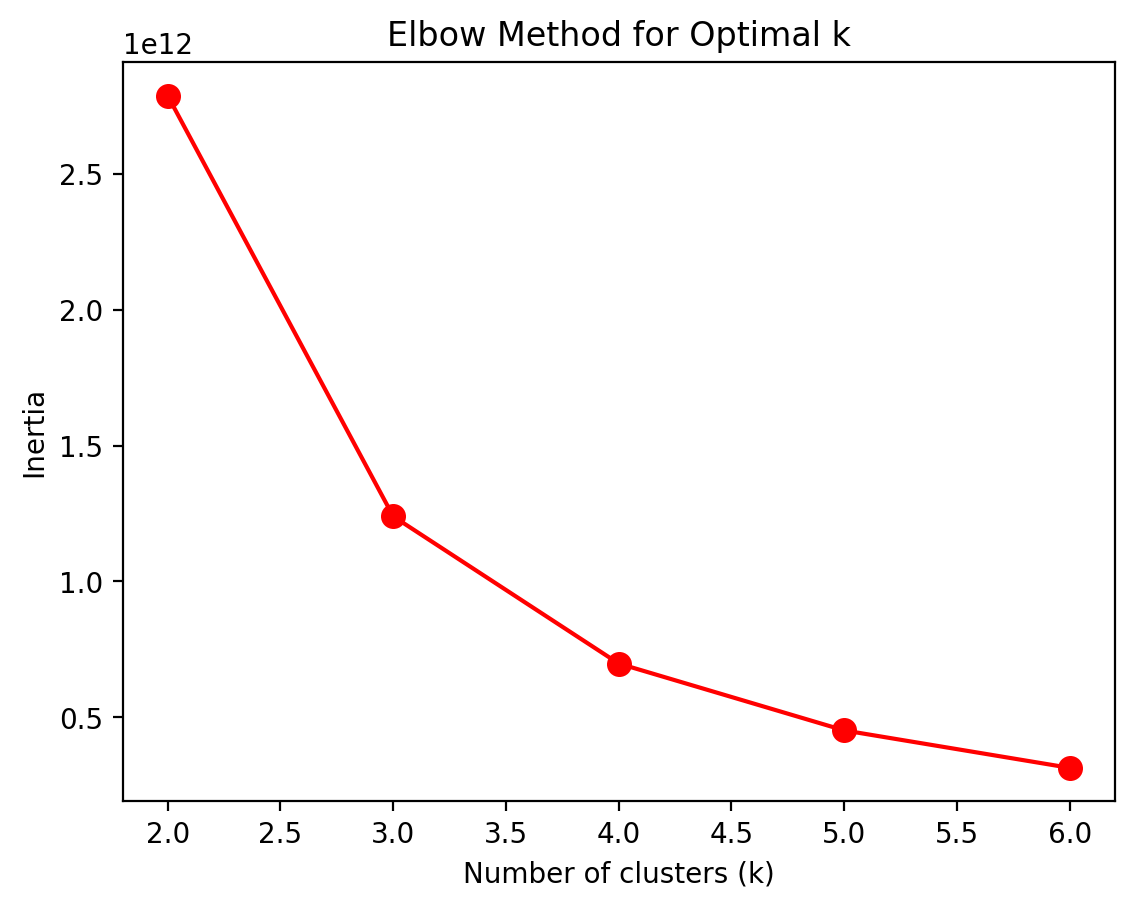

In [85]:
# Elbow Method for the number of clusters used:

inertias = []
K = range(2,7)

for k in K:
  kmeans = KMeans(n_clusters=k, n_init='auto')
  kmeans.fit(df_preprocessed_k1)
  inertias.append(kmeans.inertia_)

plt.plot(K, inertias, 'ro-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k') # 3 clusters

In [86]:
kmeans = KMeans(n_clusters=3, n_init='auto')
df_preprocessed_k1['cluster'] = kmeans.fit_predict(df_preprocessed_k1)
df_preprocessed_k1.groupby('cluster').mean().T

cluster                    0            1             2
billing_amount  25685.041901  9179.868379  42016.756668
treatment_days     15.518641    15.520682     15.457948
age                51.480870    51.615785     51.508433
gender              0.493804     0.501683      0.505291
admission_type      0.992554     1.004668      0.998291
test_results        0.993587     1.003691      0.996914

In [87]:
# Cluster 1: Patient Groups:

df_cluster1 = df[['age', 'treatment_days', 'billing_amount']] # relevant columns for cluster

#Standardize the values with StandardScaler:
scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df_cluster1), columns=df_cluster1.columns)

df_scaled

age  treatment_days  billing_amount
0     -1.098427       -1.558559       -0.470713
1      0.533770       -1.096739        0.570021
2      1.247856       -0.057646        0.169675
3     -1.200439        1.674178        0.870301
4     -0.435347        0.519629       -0.795732
...         ...             ...             ...
54961 -0.486353        1.674178       -1.611285
54962  0.482764       -0.750375        0.416200
54963 -0.690378        1.443268        0.146144
54964 -0.435347       -1.096739        0.486110
54965  0.074715        1.327813       -1.515607

[54966 rows x 3 columns]

Text(0.5, 1.0, 'Elbow Method for Optimal k')

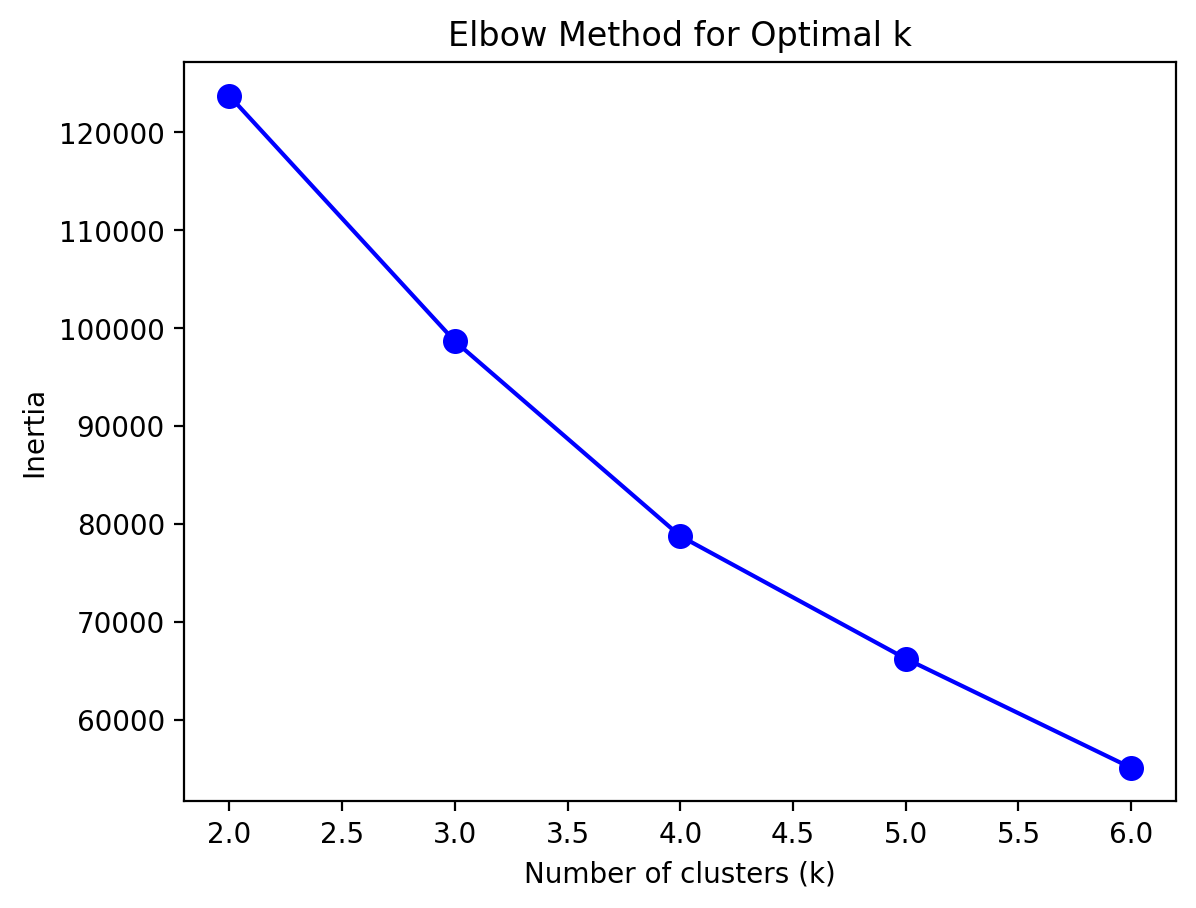

In [88]:
# Elbow Method for the number of clusters used:

inertias = []
K = range(2,7)

for k in K:
  kmeans = KMeans(n_clusters=k, n_init='auto')
  kmeans.fit(df_scaled)
  inertias.append(kmeans.inertia_)

plt.plot(K, inertias, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k') # 4 clusters

In [89]:
kmeans = KMeans(n_clusters=4, n_init='auto', random_state=42)
df_scaled['cluster'] = kmeans.fit_predict(df_scaled)

df_scaled.groupby('cluster').mean().T

cluster                0         1         2         3
age            -0.858903  0.910367 -0.447357  0.344520
treatment_days  0.826975  0.733306 -0.779099 -0.785138
billing_amount  0.394226 -0.427793 -0.887543  0.899989

In [90]:
# Cluster 2: Clinical Serverity Clusters:

# Columns to use:
df_cluster2 = df[['age', 'treatment_days', 'medical_condition', 'test_results', 'medication']]

# One hot encode categorical columns:
df_cluster2 = pd.get_dummies(
    df_cluster2,
    columns=['medical_condition', 'test_results', 'medication'],
    drop_first=True
)

# Standardize numeric columns so they do not skew the data
scaler = StandardScaler()
df_cluster2[['age', 'treatment_days']] = scaler.fit_transform(
    df_cluster2[['age', 'treatment_days']]
)

Text(0.5, 1.0, 'Elbow Method for Optimal k')

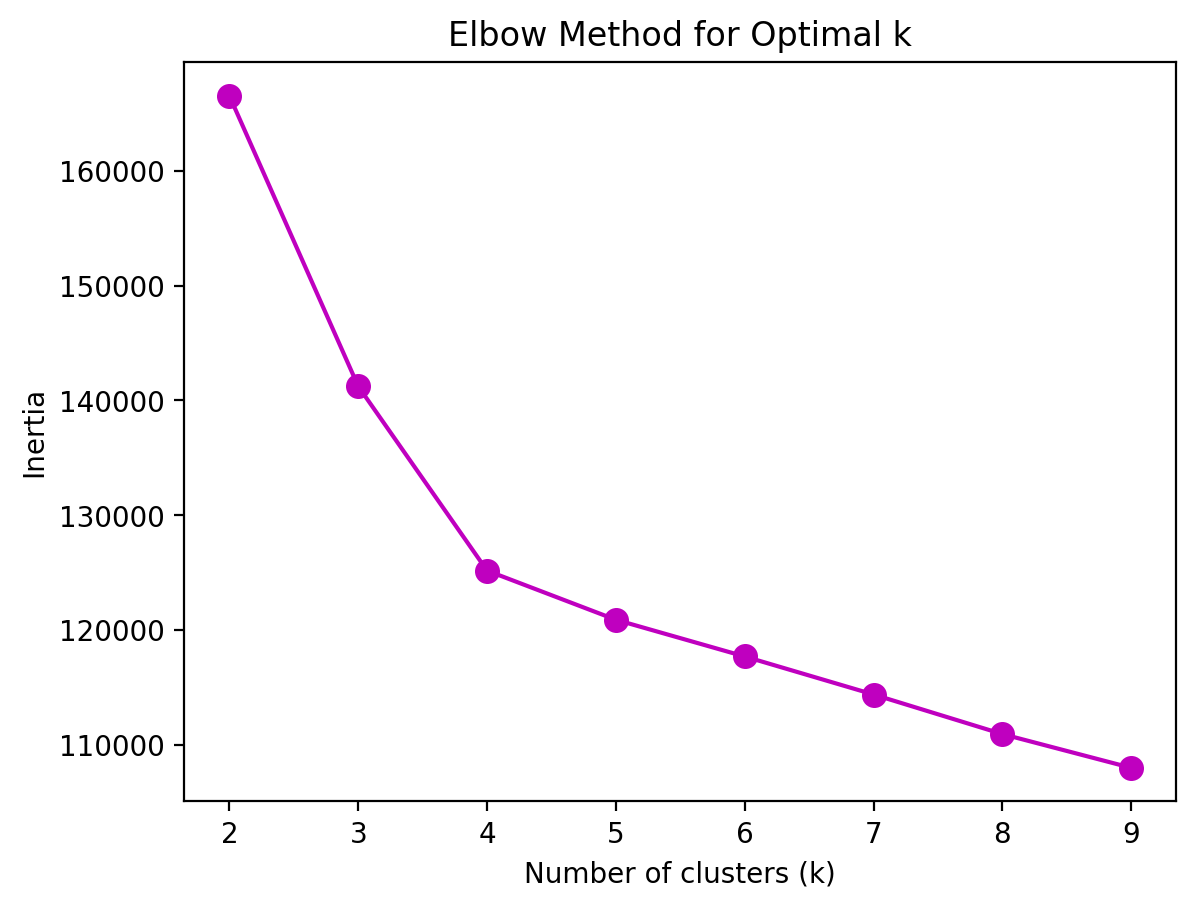

In [91]:
# Elbow Method for the number of clusters used:

inertias = []
K = range(2,10)

for k in K:
  kmeans = KMeans(n_clusters=k, n_init='auto')
  kmeans.fit(df_cluster2)
  inertias.append(kmeans.inertia_)

plt.plot(K, inertias, 'mo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k') # 4 clusters

In [92]:
kmeans = KMeans(n_clusters=4, n_init='auto', random_state=42)
df_cluster2['cluster'] = kmeans.fit_predict(df_cluster2)

df_cluster2.groupby('cluster').mean().T

cluster                                0         1         2         3
age                            -0.865144 -0.872072  0.856706  0.864926
treatment_days                  0.870273 -0.867373  0.867919 -0.864076
medical_condition_Asthma        0.171648  0.159081  0.168104  0.163137
medical_condition_Cancer        0.162918  0.168112  0.167313  0.166715
medical_condition_Diabetes      0.166913  0.166956  0.165804  0.171024
medical_condition_Hypertension  0.165582  0.164283  0.166523  0.169563
medical_condition_Obesity       0.164250  0.173096  0.166523  0.161604
test_results_Inconclusive       0.329387  0.331599  0.329812  0.333504
test_results_Normal             0.338340  0.337090  0.331321  0.327297
medication_Ibuprofen            0.196138  0.202427  0.200014  0.203520
medication_Lipitor              0.204054  0.200838  0.195415  0.203082
medication_Paracetamol          0.196064  0.200910  0.203320  0.197532
medication_Penicillin           0.204498  0.200549  0.197427  0.194903

In [93]:
# Cluster 3: Utilization and Cost:

# Columns to use:
df_cluster3 =  df[['treatment_days', 'billing_amount', 'room_number', 'admission_type']]

# One hot encode categorical column:
df_cluster3 = pd.get_dummies(df_cluster3, columns=['admission_type'], drop_first=True)

# Standardize numerical columns:
scaler = StandardScaler()
df_cluster3[['treatment_days', 'billing_amount', 'room_number']] = scaler.fit_transform(
    df_cluster3[['treatment_days', 'billing_amount', 'room_number']]
)

Text(0.5, 1.0, 'Elbow Method for Optimal k')

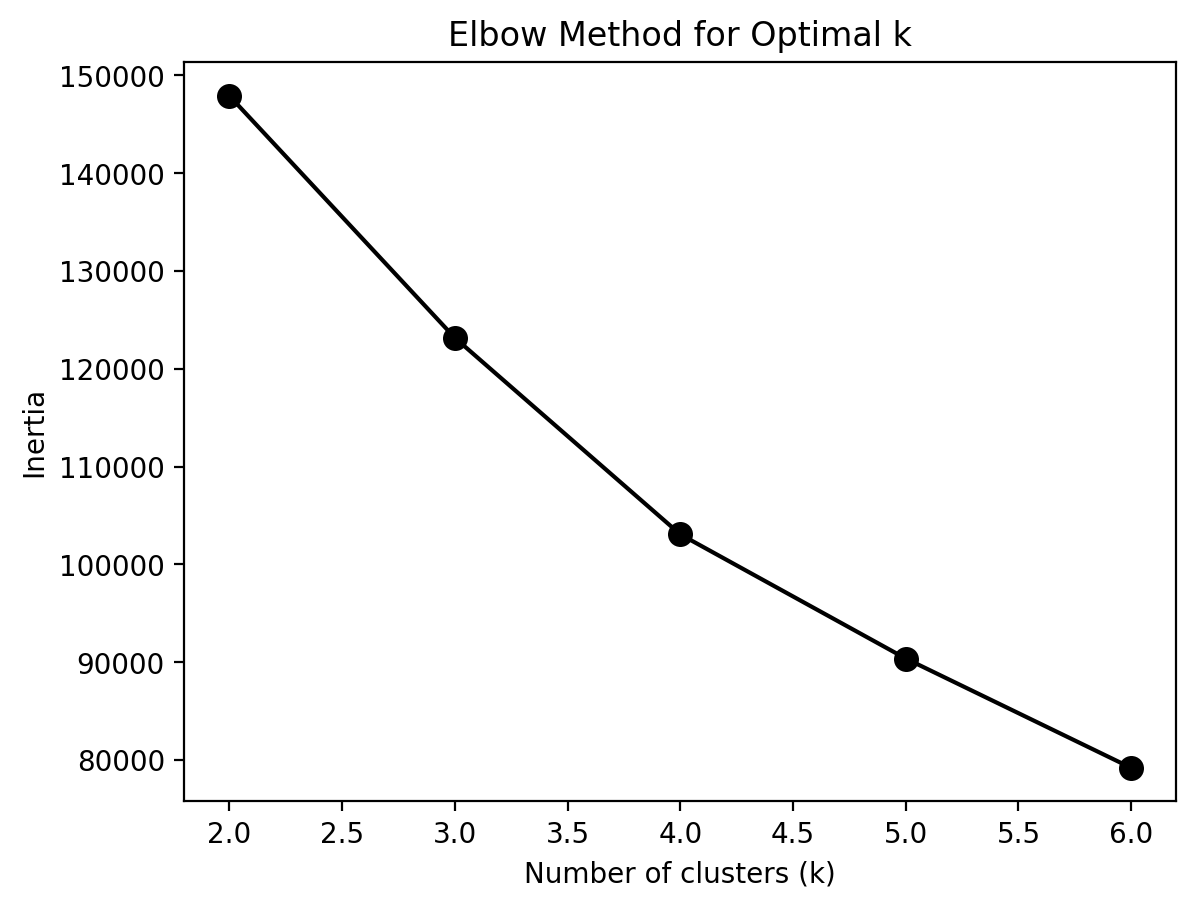

In [94]:
# Elbow Method for the number of clusters used:

inertias = []
K = range(2,7)

for k in K:
  kmeans = KMeans(n_clusters=k, n_init='auto')
  kmeans.fit(df_cluster3)
  inertias.append(kmeans.inertia_)

plt.plot(K, inertias, 'ko-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k') # 4 clusters


In [95]:
kmeans = KMeans(n_clusters=4, n_init='auto', random_state=42)
df_cluster3['cluster'] = kmeans.fit_predict(df_cluster3)

df_cluster3.groupby('cluster').mean().T

cluster                          0         1         2         3
treatment_days            0.806363 -0.779823 -0.813328  0.791942
billing_amount            0.917255 -0.308345  0.322501 -0.909655
room_number              -0.316427 -0.923229  0.894792  0.325545
admission_type_Emergency  0.326460  0.331872  0.324760  0.334172
admission_type_Urgent     0.333407  0.331652  0.340004  0.333237

In [96]:
# Cluster 4: Insurance and Payment:

# Columns to use:
df_cluster4 = df[['insurance_provider', 'billing_amount', 'treatment_days']]

# One hot encode categorical columns:
df_cluster4 = pd.get_dummies(df_cluster4, columns=['insurance_provider'], drop_first=True)

# Standardize numeric columns so they do not skew the data
scaler = StandardScaler()
df_cluster4[['billing_amount', 'treatment_days']] = scaler.fit_transform(
    df_cluster4[['billing_amount', 'treatment_days']]
)

Text(0.5, 1.0, 'Elbow Method for Optimal k')

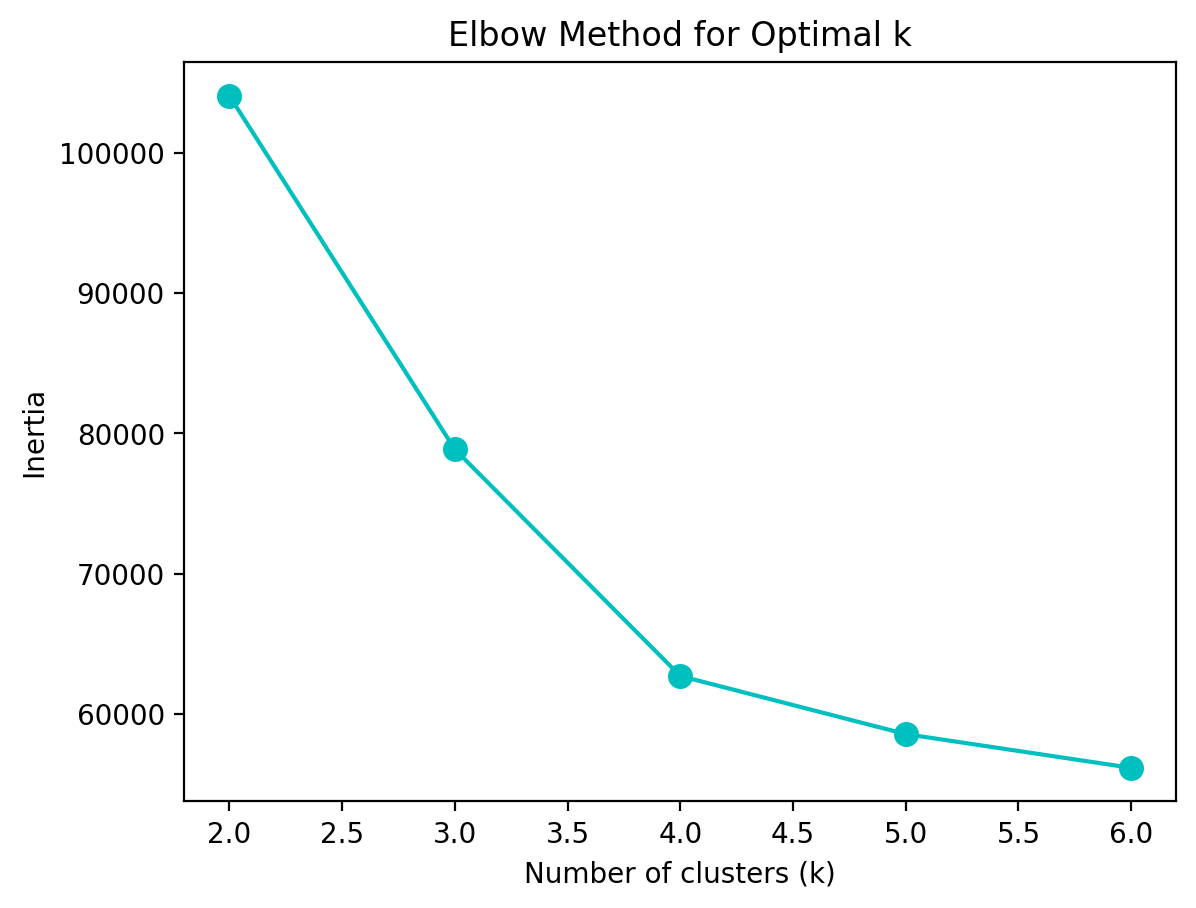

In [97]:
# Elbow Method for the number of clusters used:

inertias = []
K = range(2,7)

for k in K:
  kmeans = KMeans(n_clusters=k, n_init='auto')
  kmeans.fit(df_cluster4)
  inertias.append(kmeans.inertia_)

plt.plot(K, inertias, 'co-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k') # 4 clusters
     

In [98]:
kmeans = KMeans(n_clusters=4, n_init='auto', random_state=42)
df_cluster4['cluster'] = kmeans.fit_predict(df_cluster4)

df_cluster4.groupby('cluster').mean().T

cluster                                     0         1         2         3
billing_amount                       0.864508 -0.858793 -0.870161  0.867710
treatment_days                       0.870233 -0.862975  0.867932 -0.868485
insurance_provider_Blue Cross        0.197996  0.197367  0.200392  0.201233
insurance_provider_Cigna             0.202677  0.204131  0.201992  0.201814
insurance_provider_Medicare          0.209114  0.206094  0.193851  0.194342
insurance_provider_UnitedHealthcare  0.195728  0.200713  0.205044  0.200000